In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import torch
from IPython.display import Image
import shutil
import os
from random import choice

In [35]:
!git clone https://github.com/ultralytics/yolov5 #https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16003, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 16003 (delta 21), reused 20 (delta 13), pack-reused 15967
Receiving objects: 100% (16003/16003), 14.66 MiB | 36.43 MiB/s, done.
Resolving deltas: 100% (10983/10983), done.


In [36]:
%cd /content/yolov5/

/content/yolov5


In [37]:
!pip install -r requirements.txt

In [38]:
# arrays to store file names
imgs = []
xmls = []

# setup directory names
train_path = "/content/drive/MyDrive/16/yolo/train/images"
val_path = "/content/drive/MyDrive/16/yolo/valid/images"
crs_path = "/content/drive/MyDrive/16/yolo/images"

train_ratio = 0.8
val_ratio = 0.2

# total count of imgs
total_img_count = len(os.listdir(crs_path))/2

# sorting count of imgs
for (dirname,dirs, files) in os.walk(crs_path):
#     print(files)
    for filename in files:
#         print("hello")
        if filename.endswith(".txt"):
            xmls.append(filename)
        else:
            imgs.append(filename)

# counting range for cycles
count_for_train = int(len(imgs)*train_ratio)
count_for_val = int(len(imgs)*val_ratio)
print("training images are : ",count_for_train)
print("validation images are : ",count_for_val)

training images are :  212
validation images are :  53


In [39]:
len(imgs)

265

In [40]:
train_image_path = "/content/drive/MyDrive/16/yolo/train/images"
train_label_path = "/content/drive/MyDrive/16/yolo/train/labels"
val_image_path = "/content/drive/MyDrive/16/yolo/valid/images"
val_label_path = "/content/drive/MyDrive/16/yolo/valid/labels"

if not os.path.isdir(train_image_path):
    os.makedirs(train_image_path)
if not os.path.isdir(train_label_path):
    os.makedirs(train_label_path)
if not os.path.isdir(val_image_path):
    os.makedirs(val_image_path)
if not os.path.isdir(val_label_path):
    os.makedirs(val_label_path)

# cycle for train dir
for x in range(count_for_train):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(train_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(train_label_path,file_xml))

    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# cycle for test dir
for x in range(count_for_val):
    file_jpg = choice(imgs)
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))

    imgs.remove(file_jpg)
    xmls.remove(file_xml)

# rest of files
print("images length - ",len(imgs))
print(imgs,xmls)
for x in imgs:
    file_jpg = x
    file_xml = file_jpg[:-4] + ".txt"

    shutil.copy(os.path.join(crs_path,file_jpg),os.path.join(val_image_path,file_jpg))
    shutil.copy(os.path.join(crs_path,file_xml),os.path.join(val_label_path,file_xml))
# shutil.copytree(crs_path,val_path)

images length -  0
[] []


In [41]:
with open(r'/content/drive/MyDrive/16/yolo/data.yaml', 'r') as file:
    lines = file.readlines()
    print(lines)

['train: /content/drive/MyDrive/16/yolo/train\n', 'val: /content/drive/MyDrive/16/yolo/valid\n', '\n', '# number of classes\n', 'nc: 8\n', '\n', '# class names\n', "names: ['car', 'pickup', 'camping','truck', 'other', 'tractor', 'boat', 'van']"]


In [13]:
ML_Model = []

precision = []
recall = []
mAP = []

#function to call for storing the results
def storeResults(model, a,b,c):
    ML_Model.append(model)
    precision.append(round(a, 3))
    recall.append(round(b, 3))
    mAP.append(round(c, 3))

# Yolov5s


In [11]:
!wandb disabled
!python train.py --img 416 --batch 2 --epochs 200 --data /content/drive/MyDrive/16/yolo/data.yaml --weights yolov5s.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/16/yolo/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=2, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, io

In [2]:
p_yol5s = 0.793
r_yol5s = 0.786
mAP_yolo5s = 0.854

In [14]:
storeResults('YoloV5S',p_yol5s,r_yol5s,mAP_yolo5s)

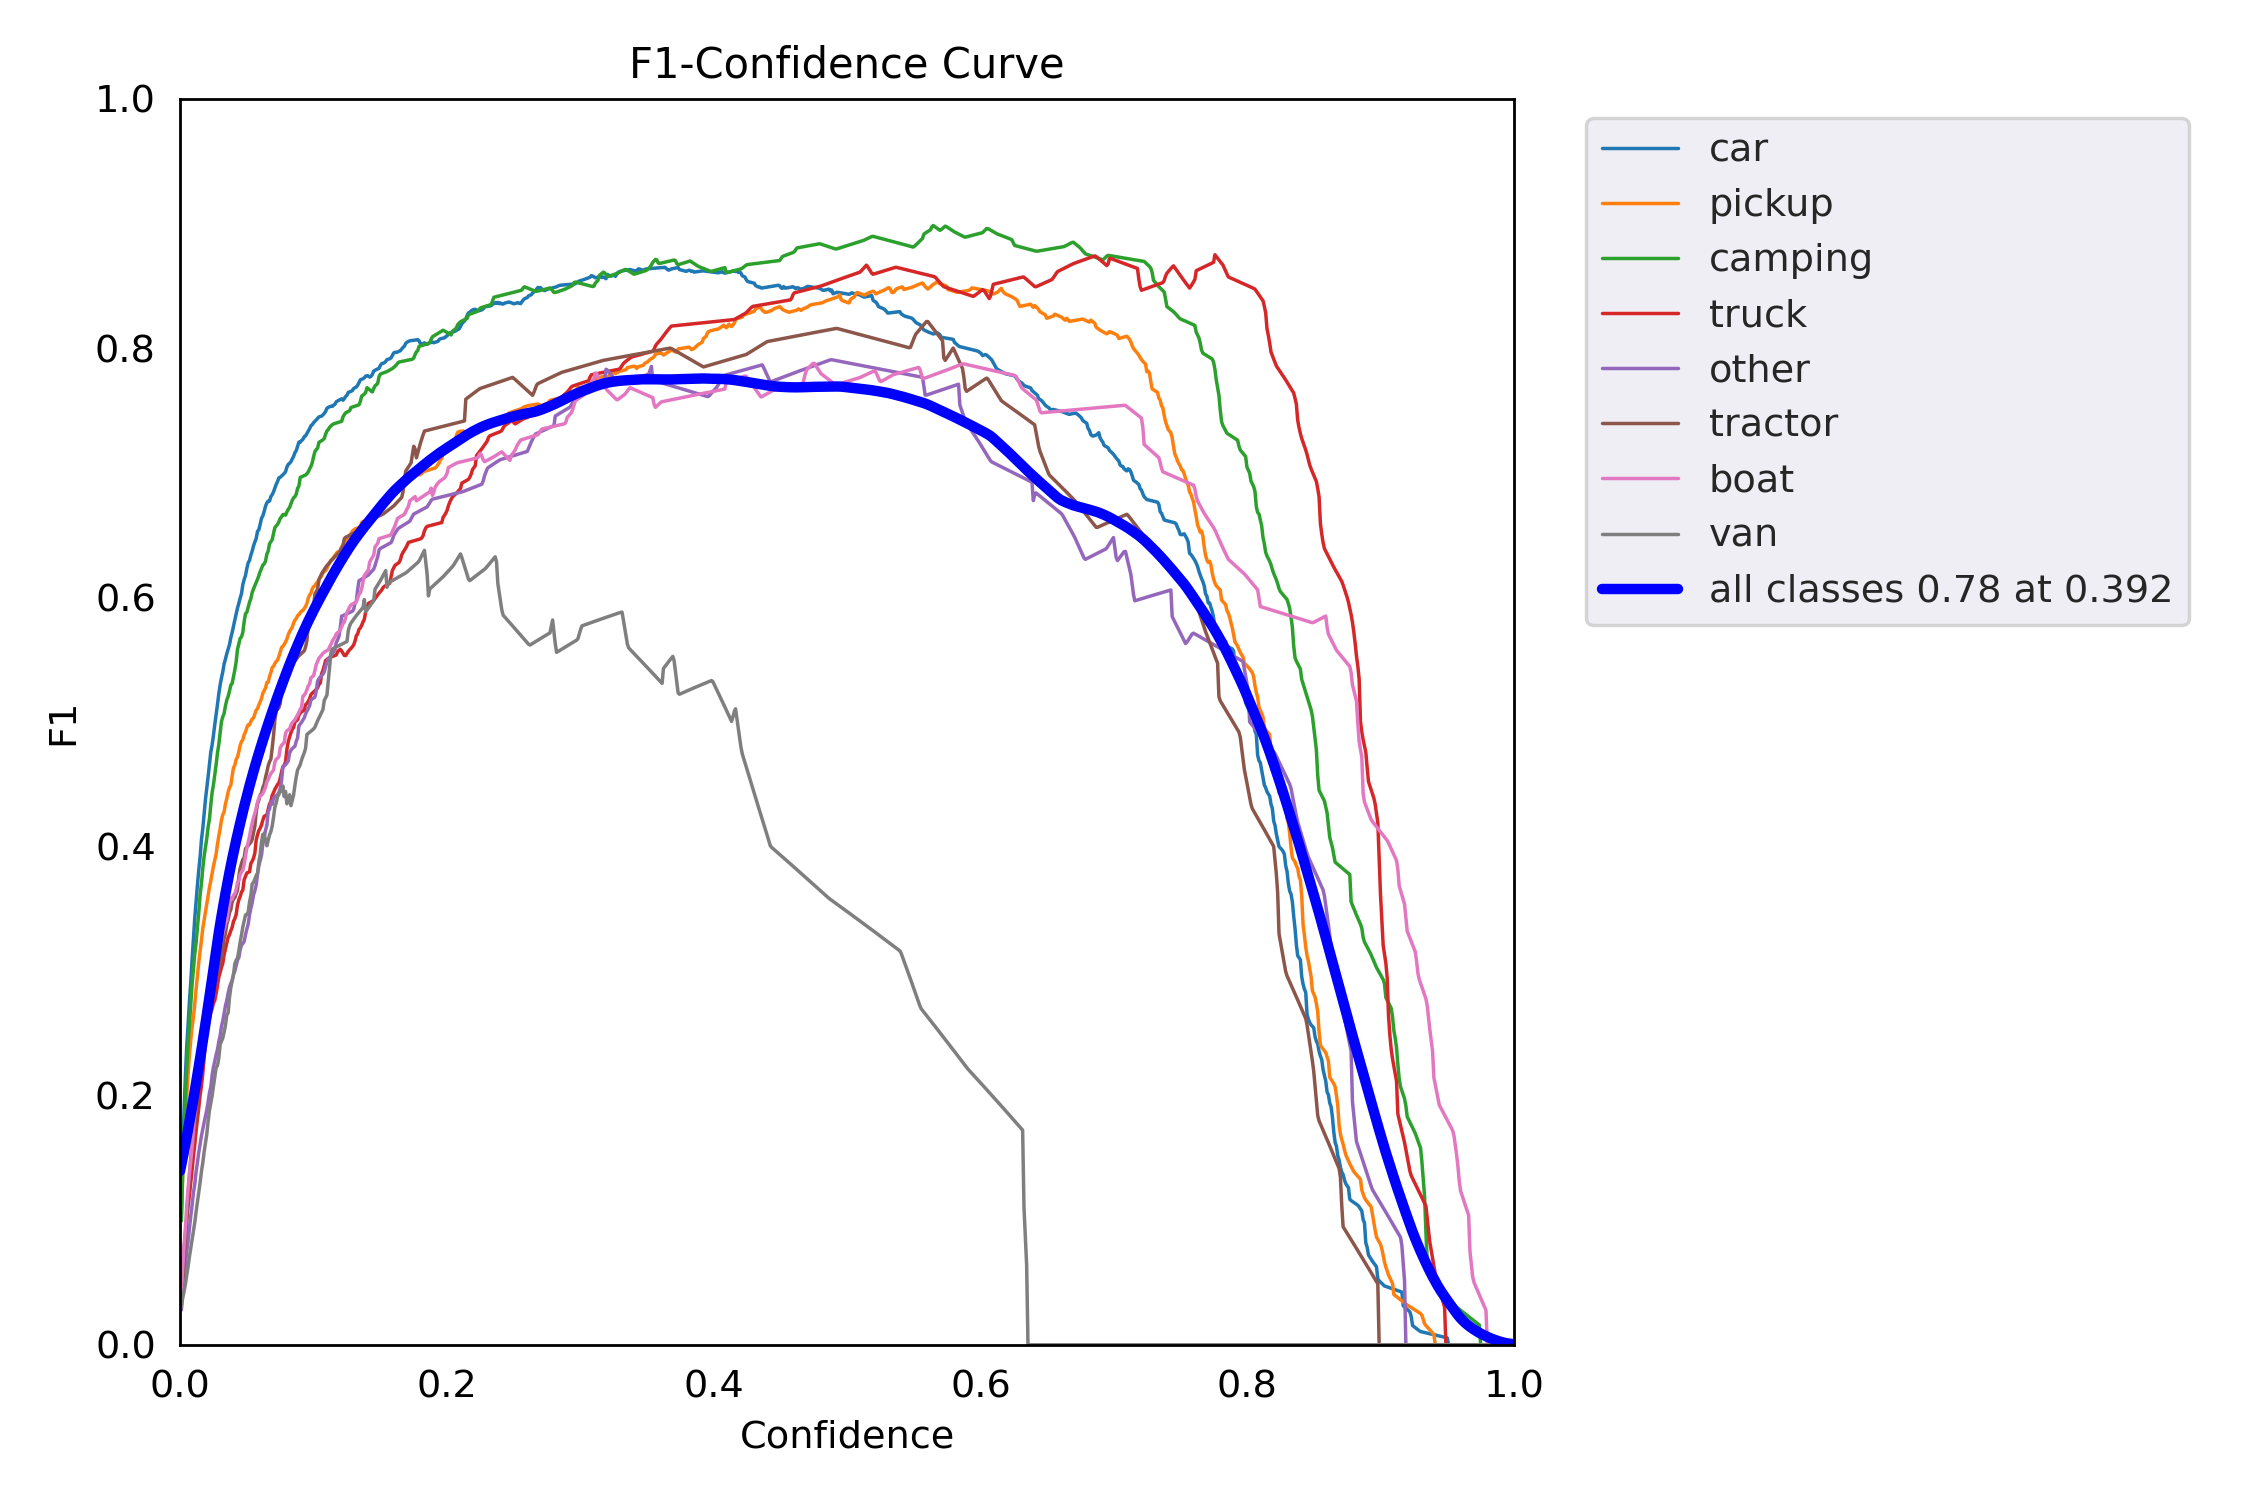

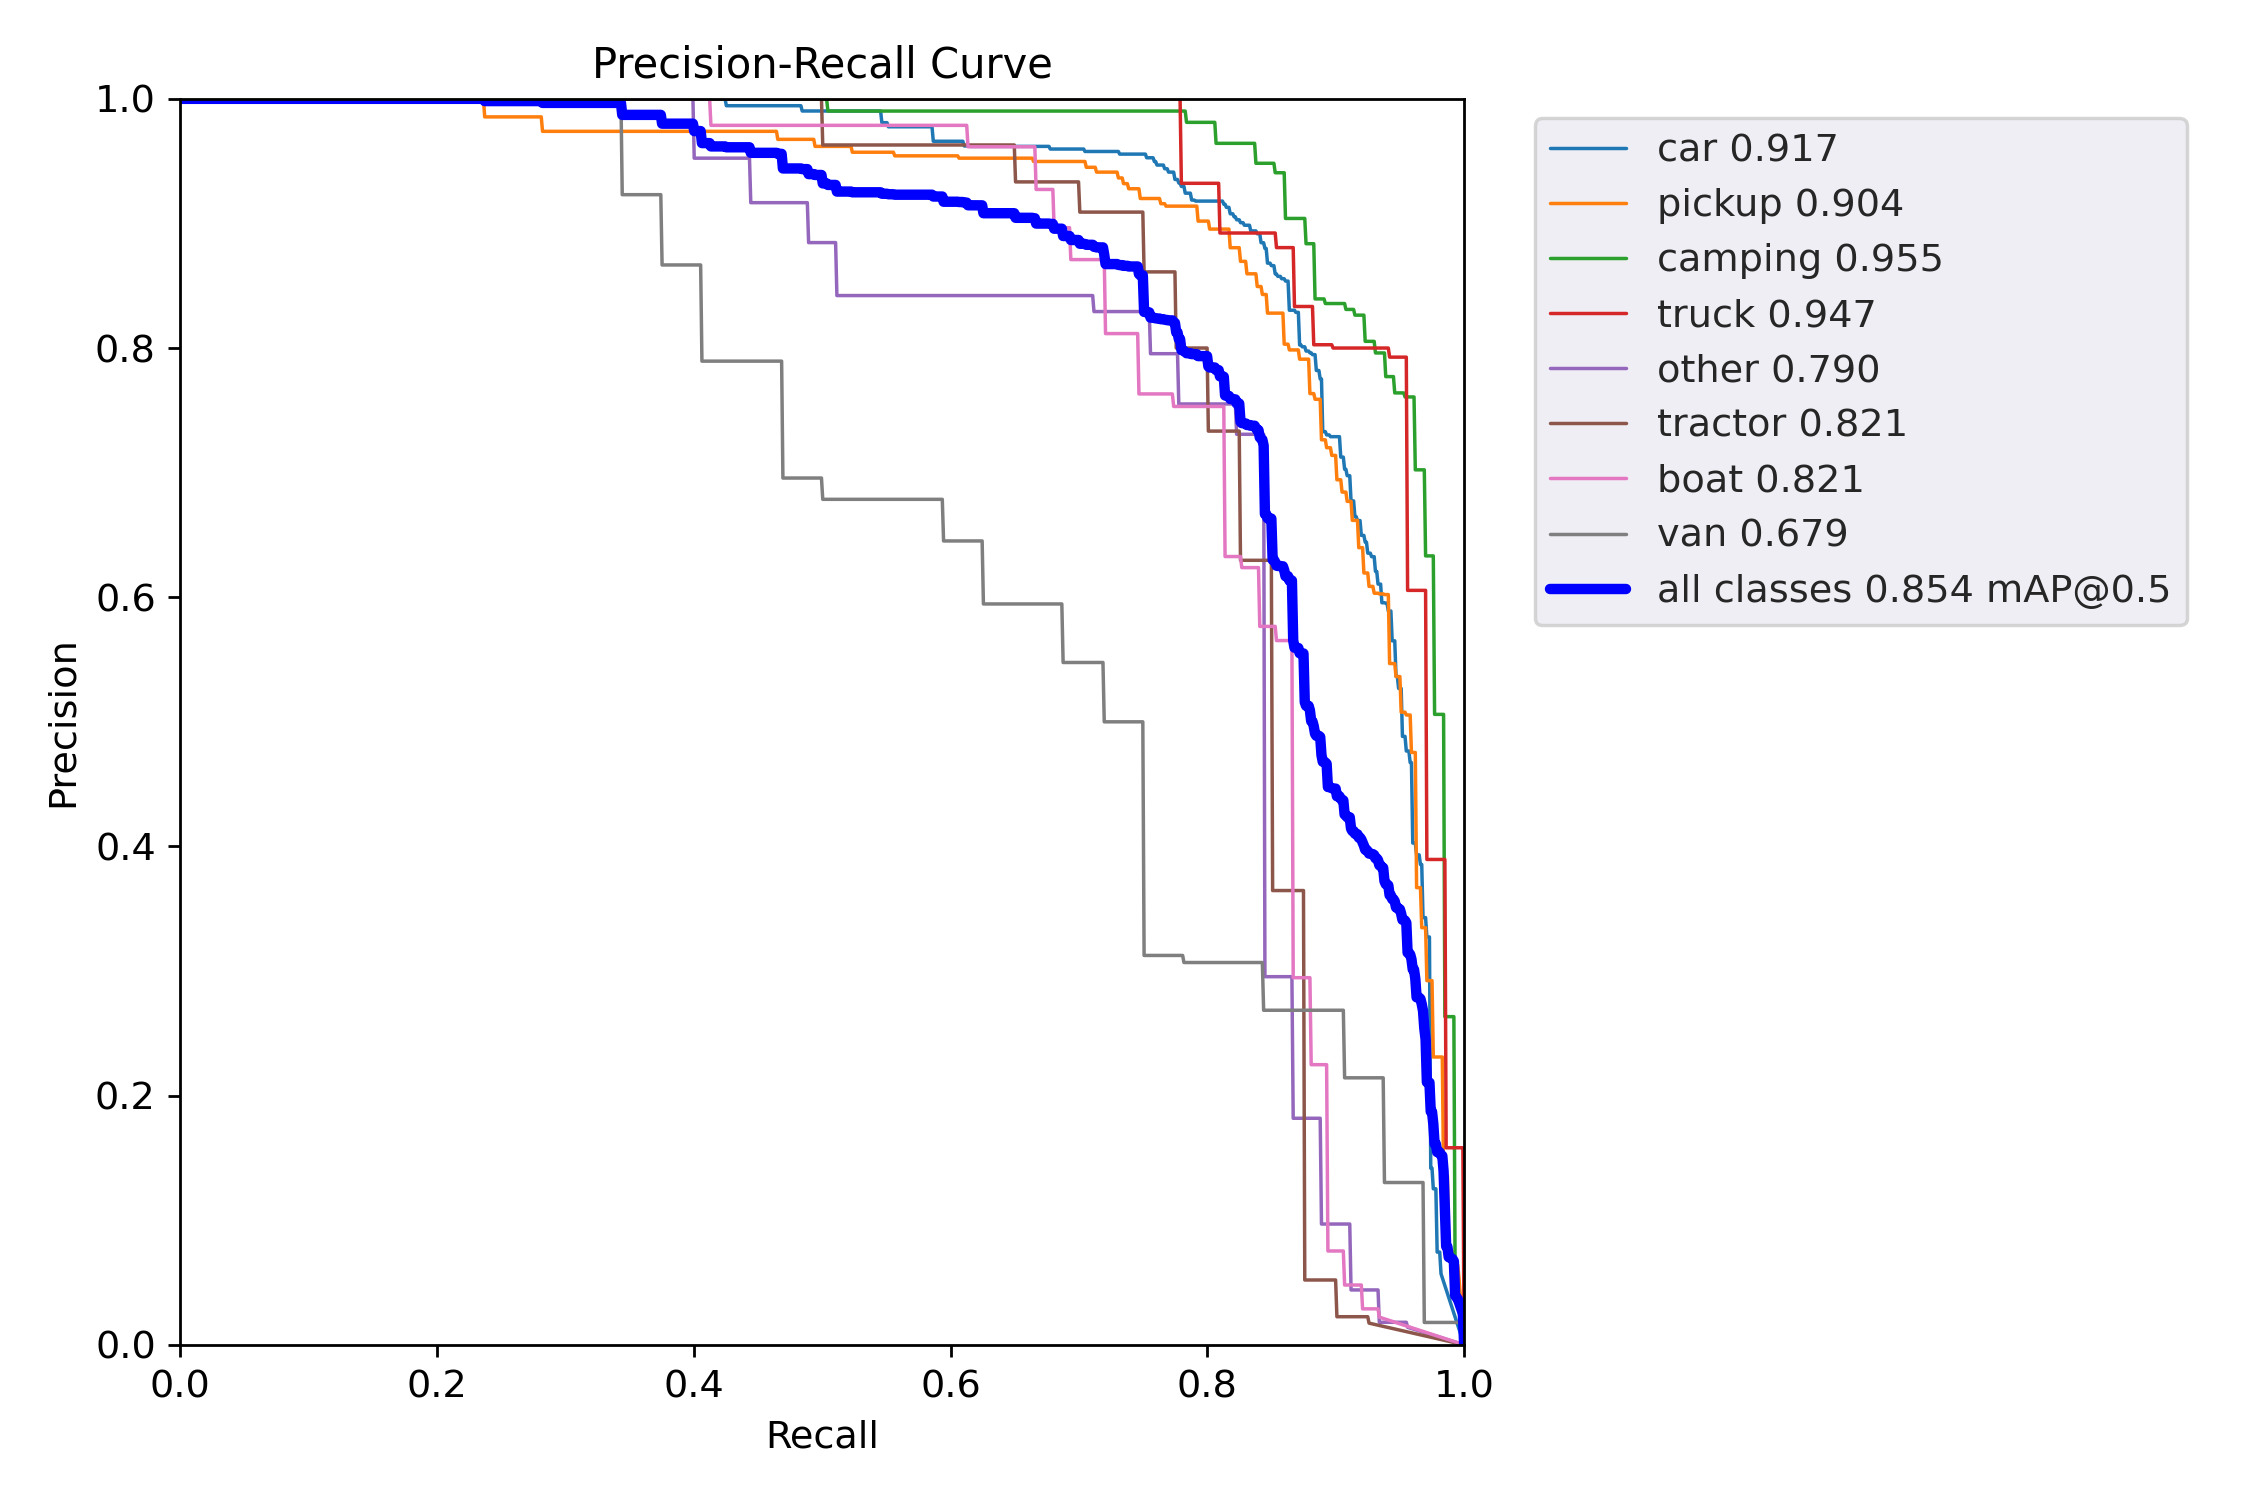

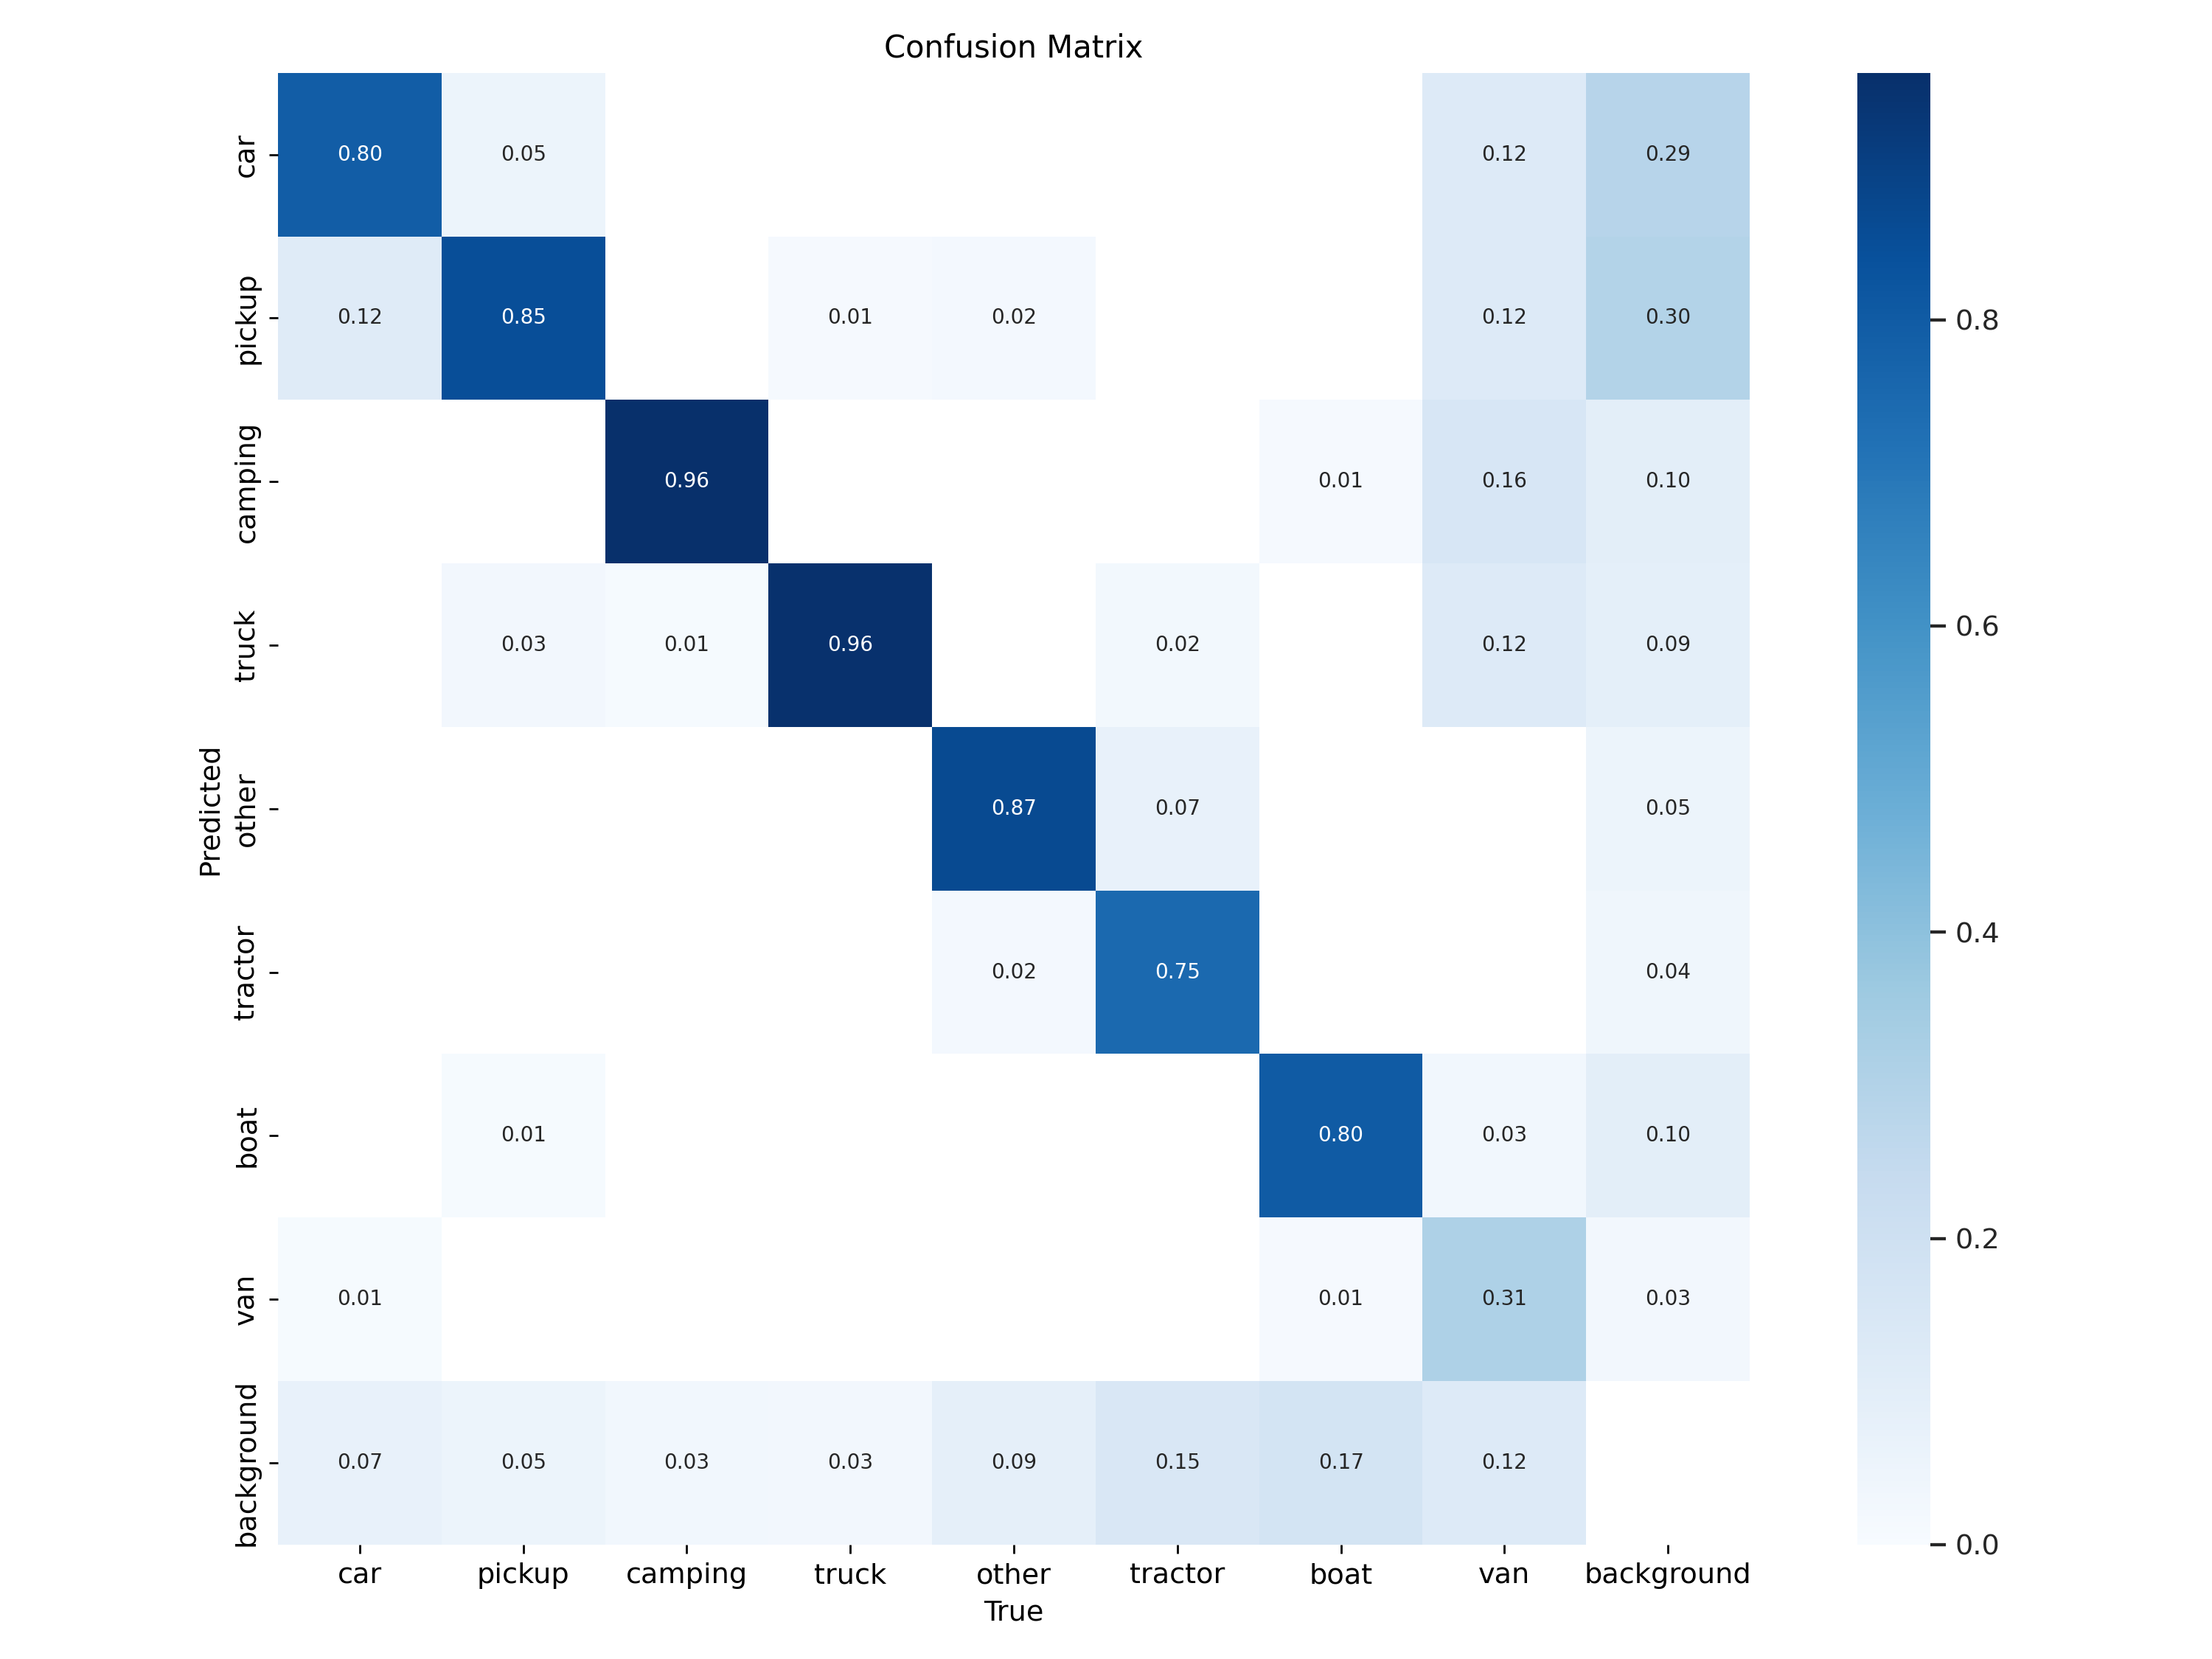

In [12]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp/F1_curve.png')
y = Image(filename='runs/train/exp/PR_curve.png')
z = Image(filename='runs/train/exp/confusion_matrix.png')
display(x, y,z)

# Yolov5m

In [13]:
!wandb disabled
!python train.py --img 416 --batch 2 --epochs 200 --data /content/drive/MyDrive/16/yolo/data.yaml --weights yolov5m.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
train: weights=yolov5m.pt, cfg=, data=/content/drive/MyDrive/16/yolo/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=2, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, io

In [3]:
p_yol5m = 0.964
r_yol5m = 0.87
mAP_yolo5m = 0.947

In [15]:
storeResults('YoloV5M',p_yol5m,r_yol5m,mAP_yolo5m)

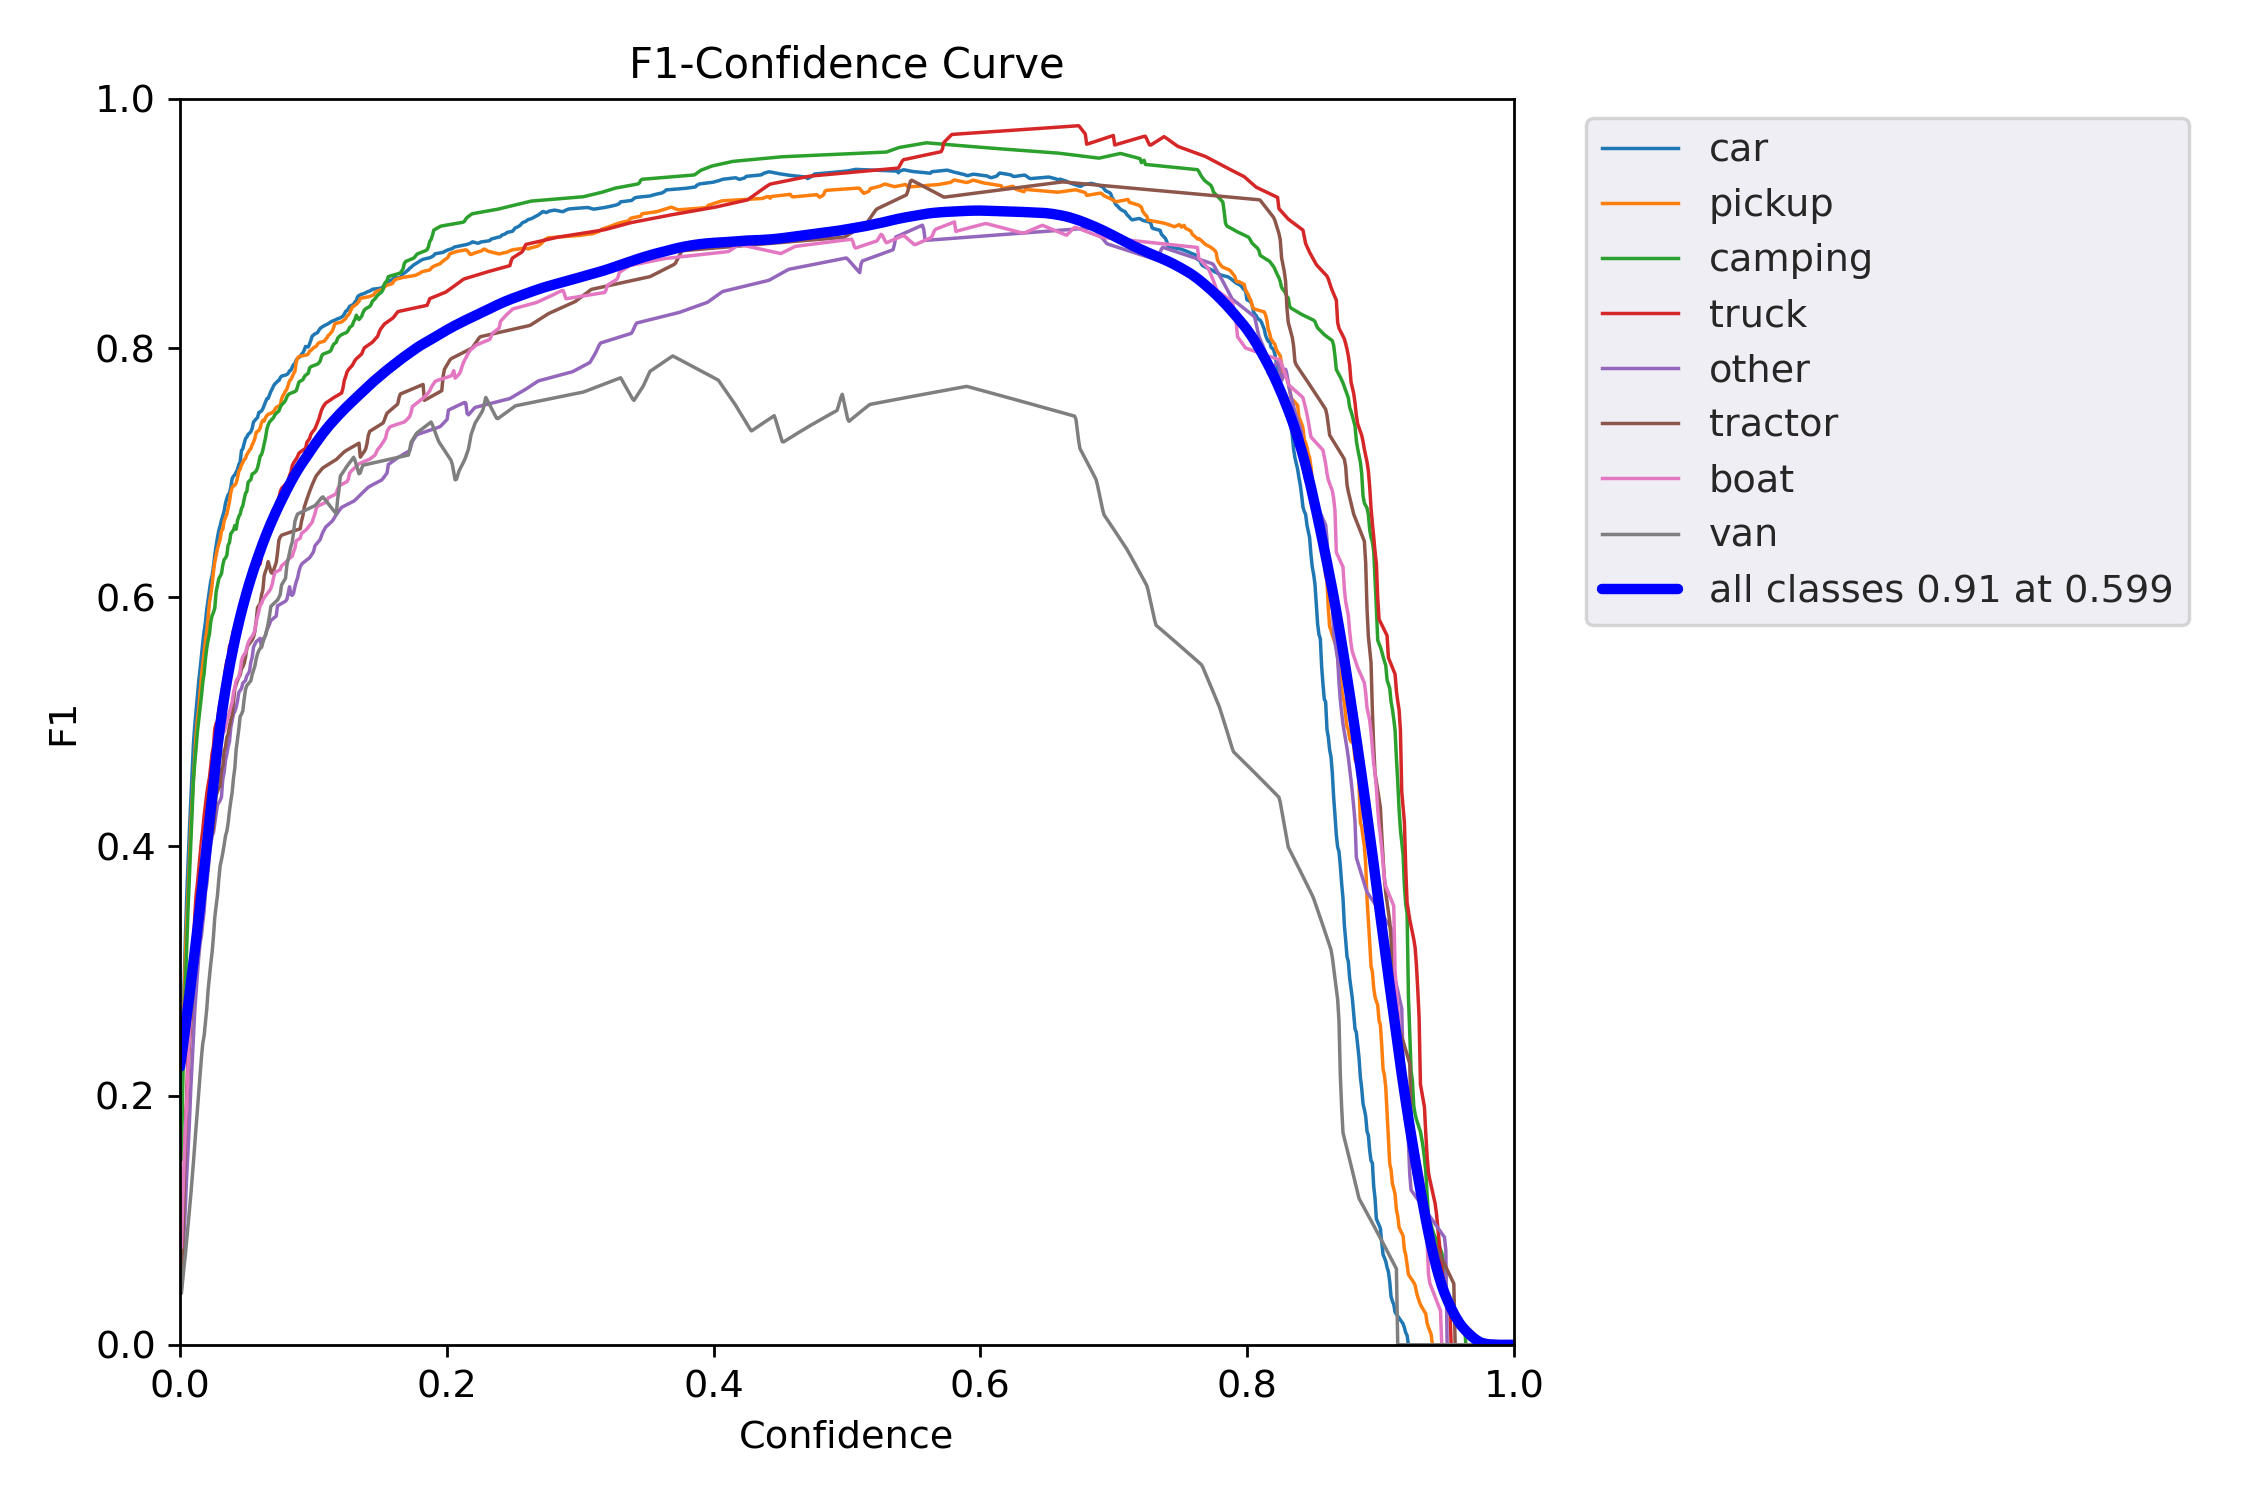

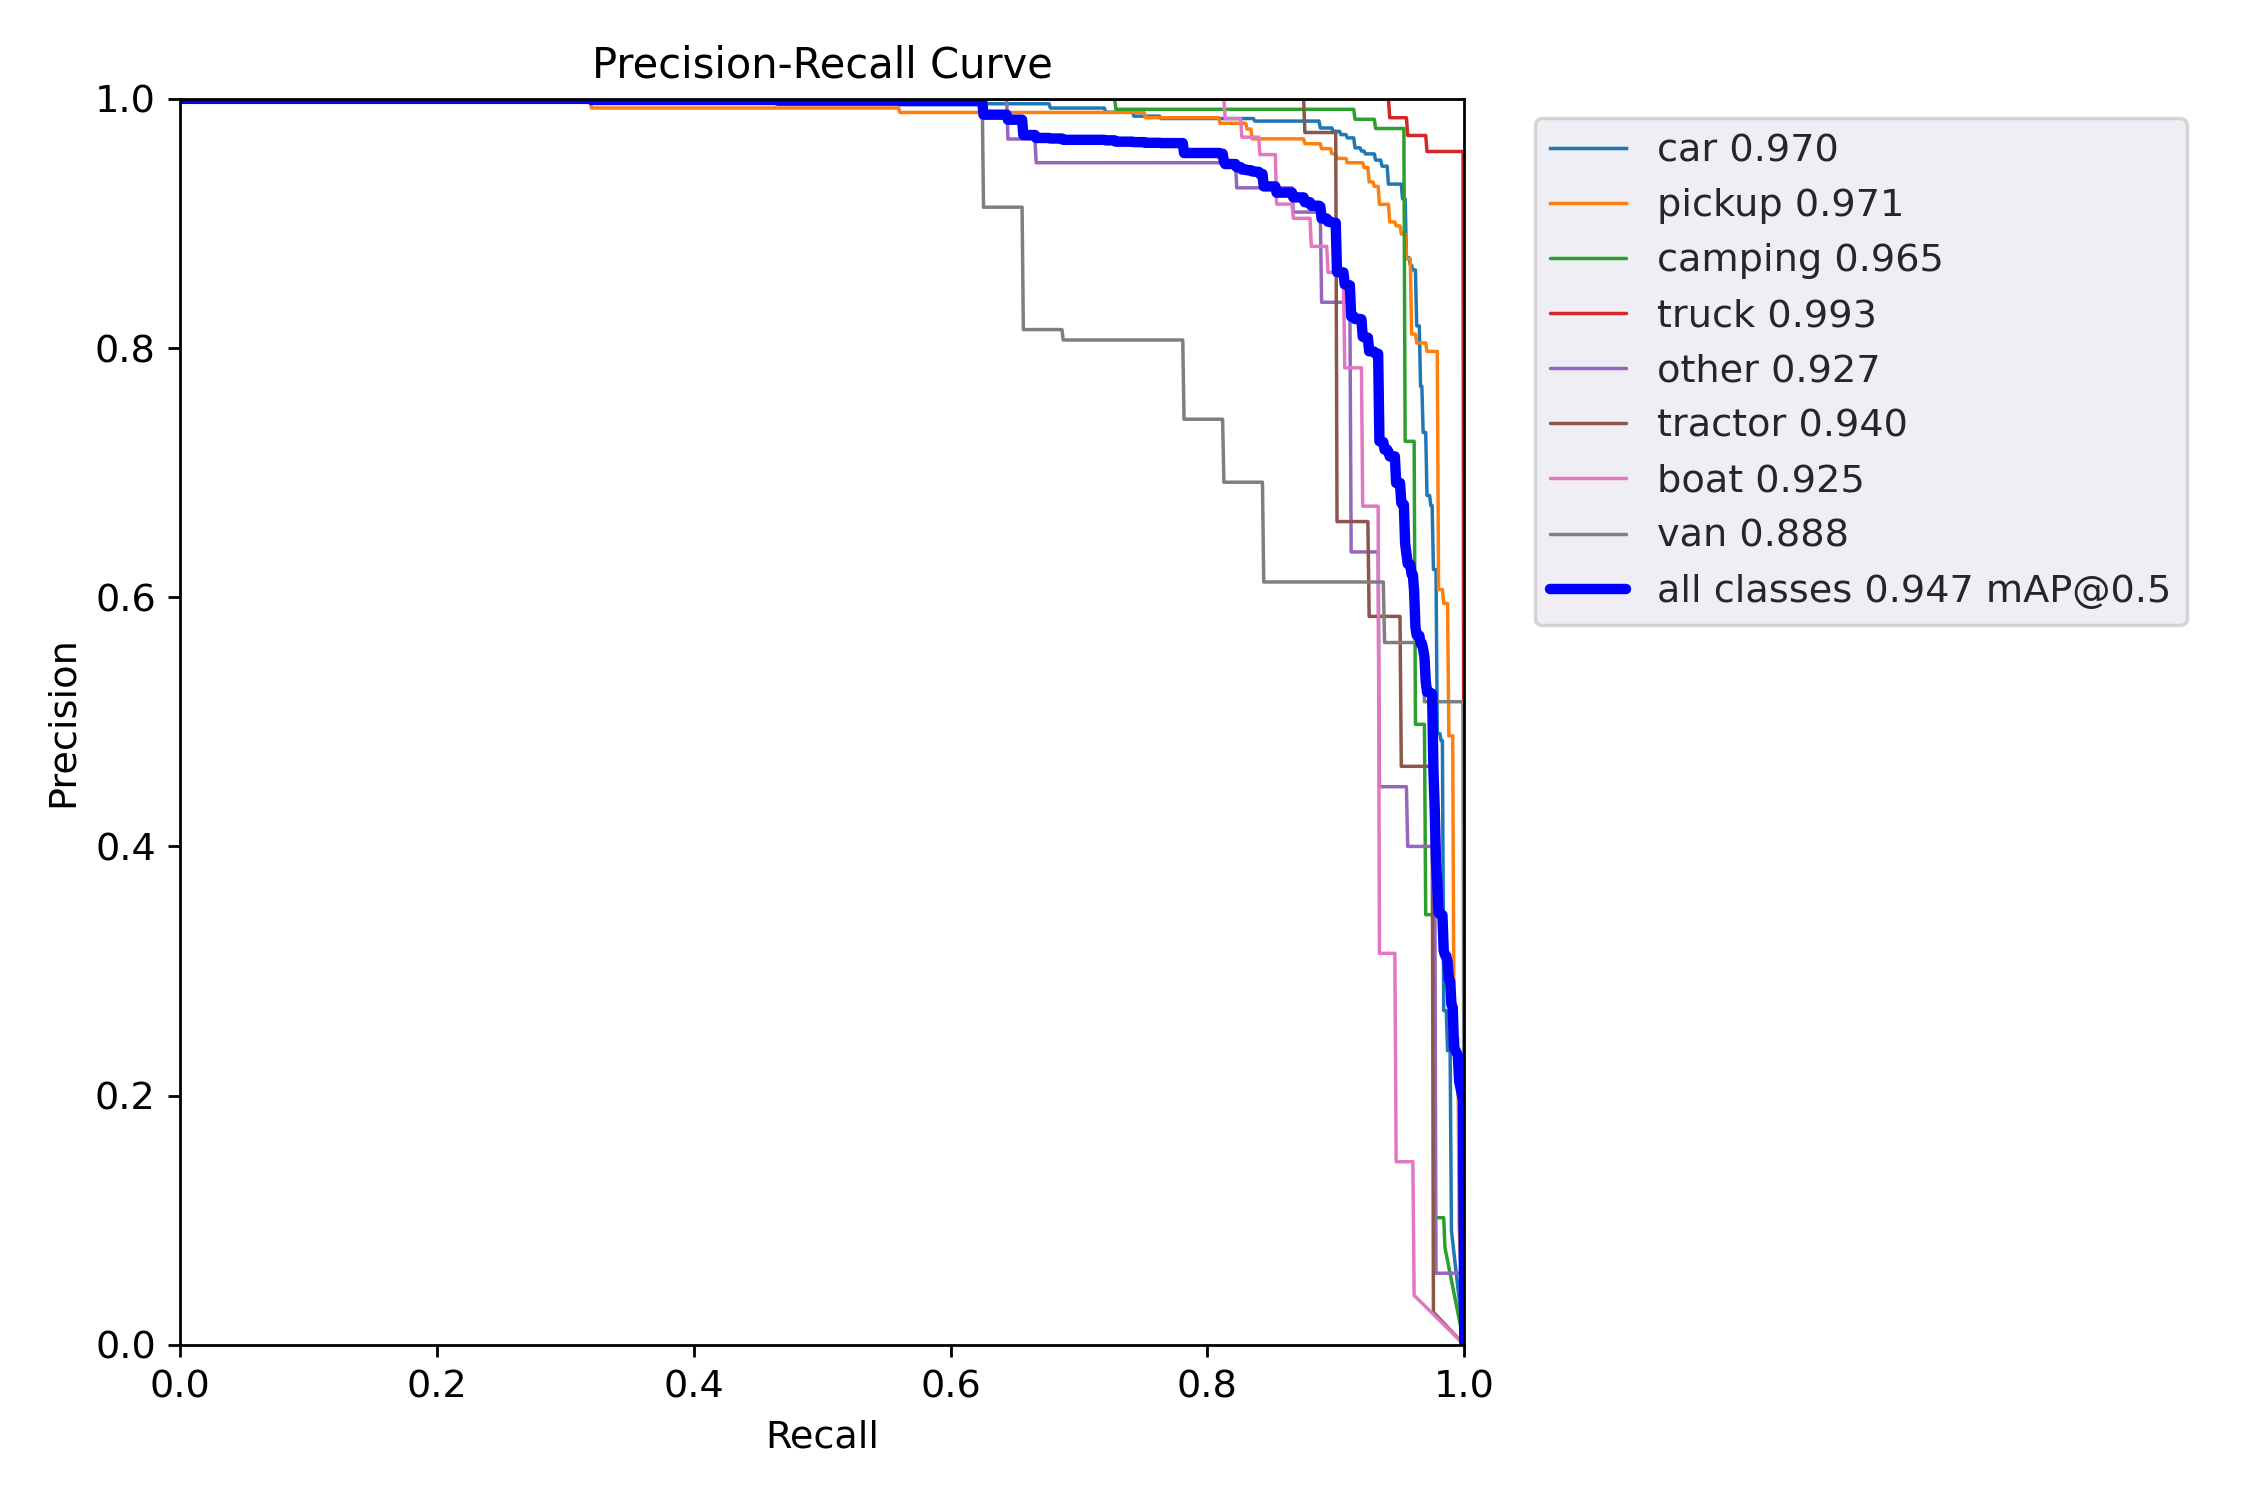

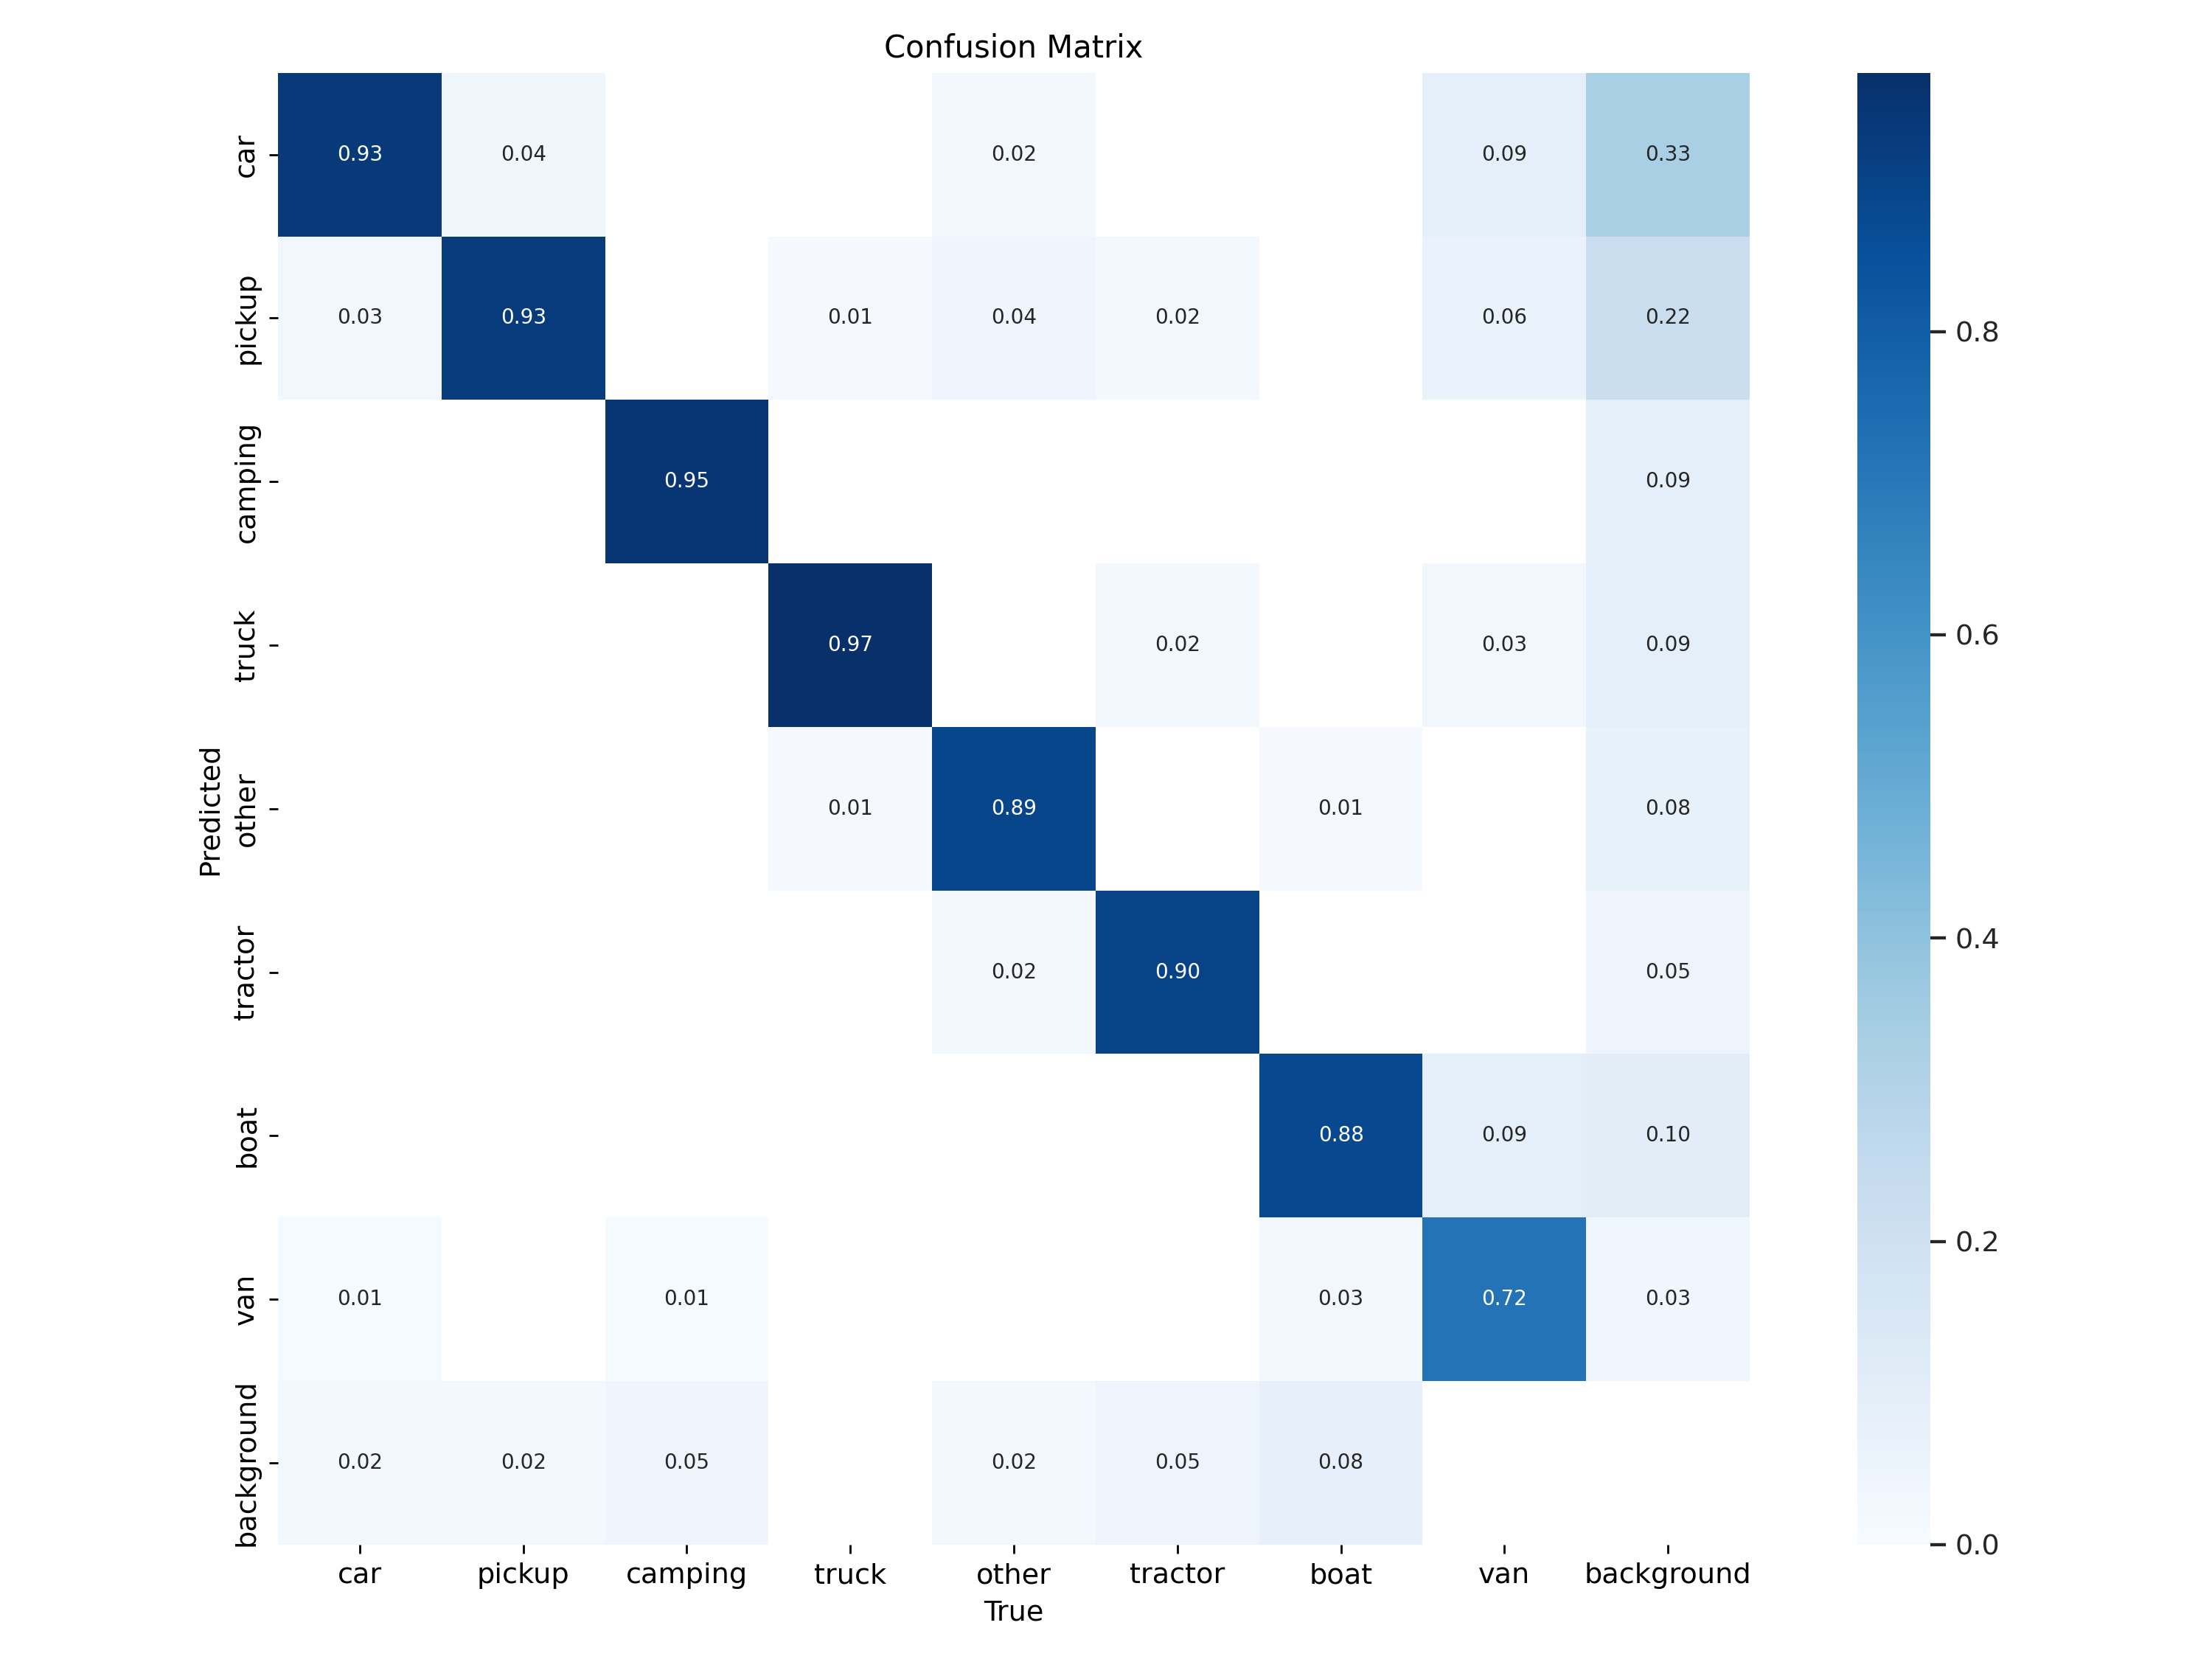

In [15]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp2/F1_curve.png')
y = Image(filename='runs/train/exp2/PR_curve.png')
z = Image(filename='runs/train/exp2/confusion_matrix.png')
display(x, y,z)

# YoloV5-l

In [16]:
!wandb disabled
!python train.py --img 416 --batch 2 --epochs 200 --data /content/drive/MyDrive/16/yolo/data.yaml --weights yolov5l.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
train: weights=yolov5l.pt, cfg=, data=/content/drive/MyDrive/16/yolo/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=2, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, io

In [4]:
p_yol5l = 0.956
r_yol5l = 0.943
mAP_yolo5l = 0.965

In [16]:
storeResults('YoloV5l',p_yol5l,r_yol5l,mAP_yolo5l)

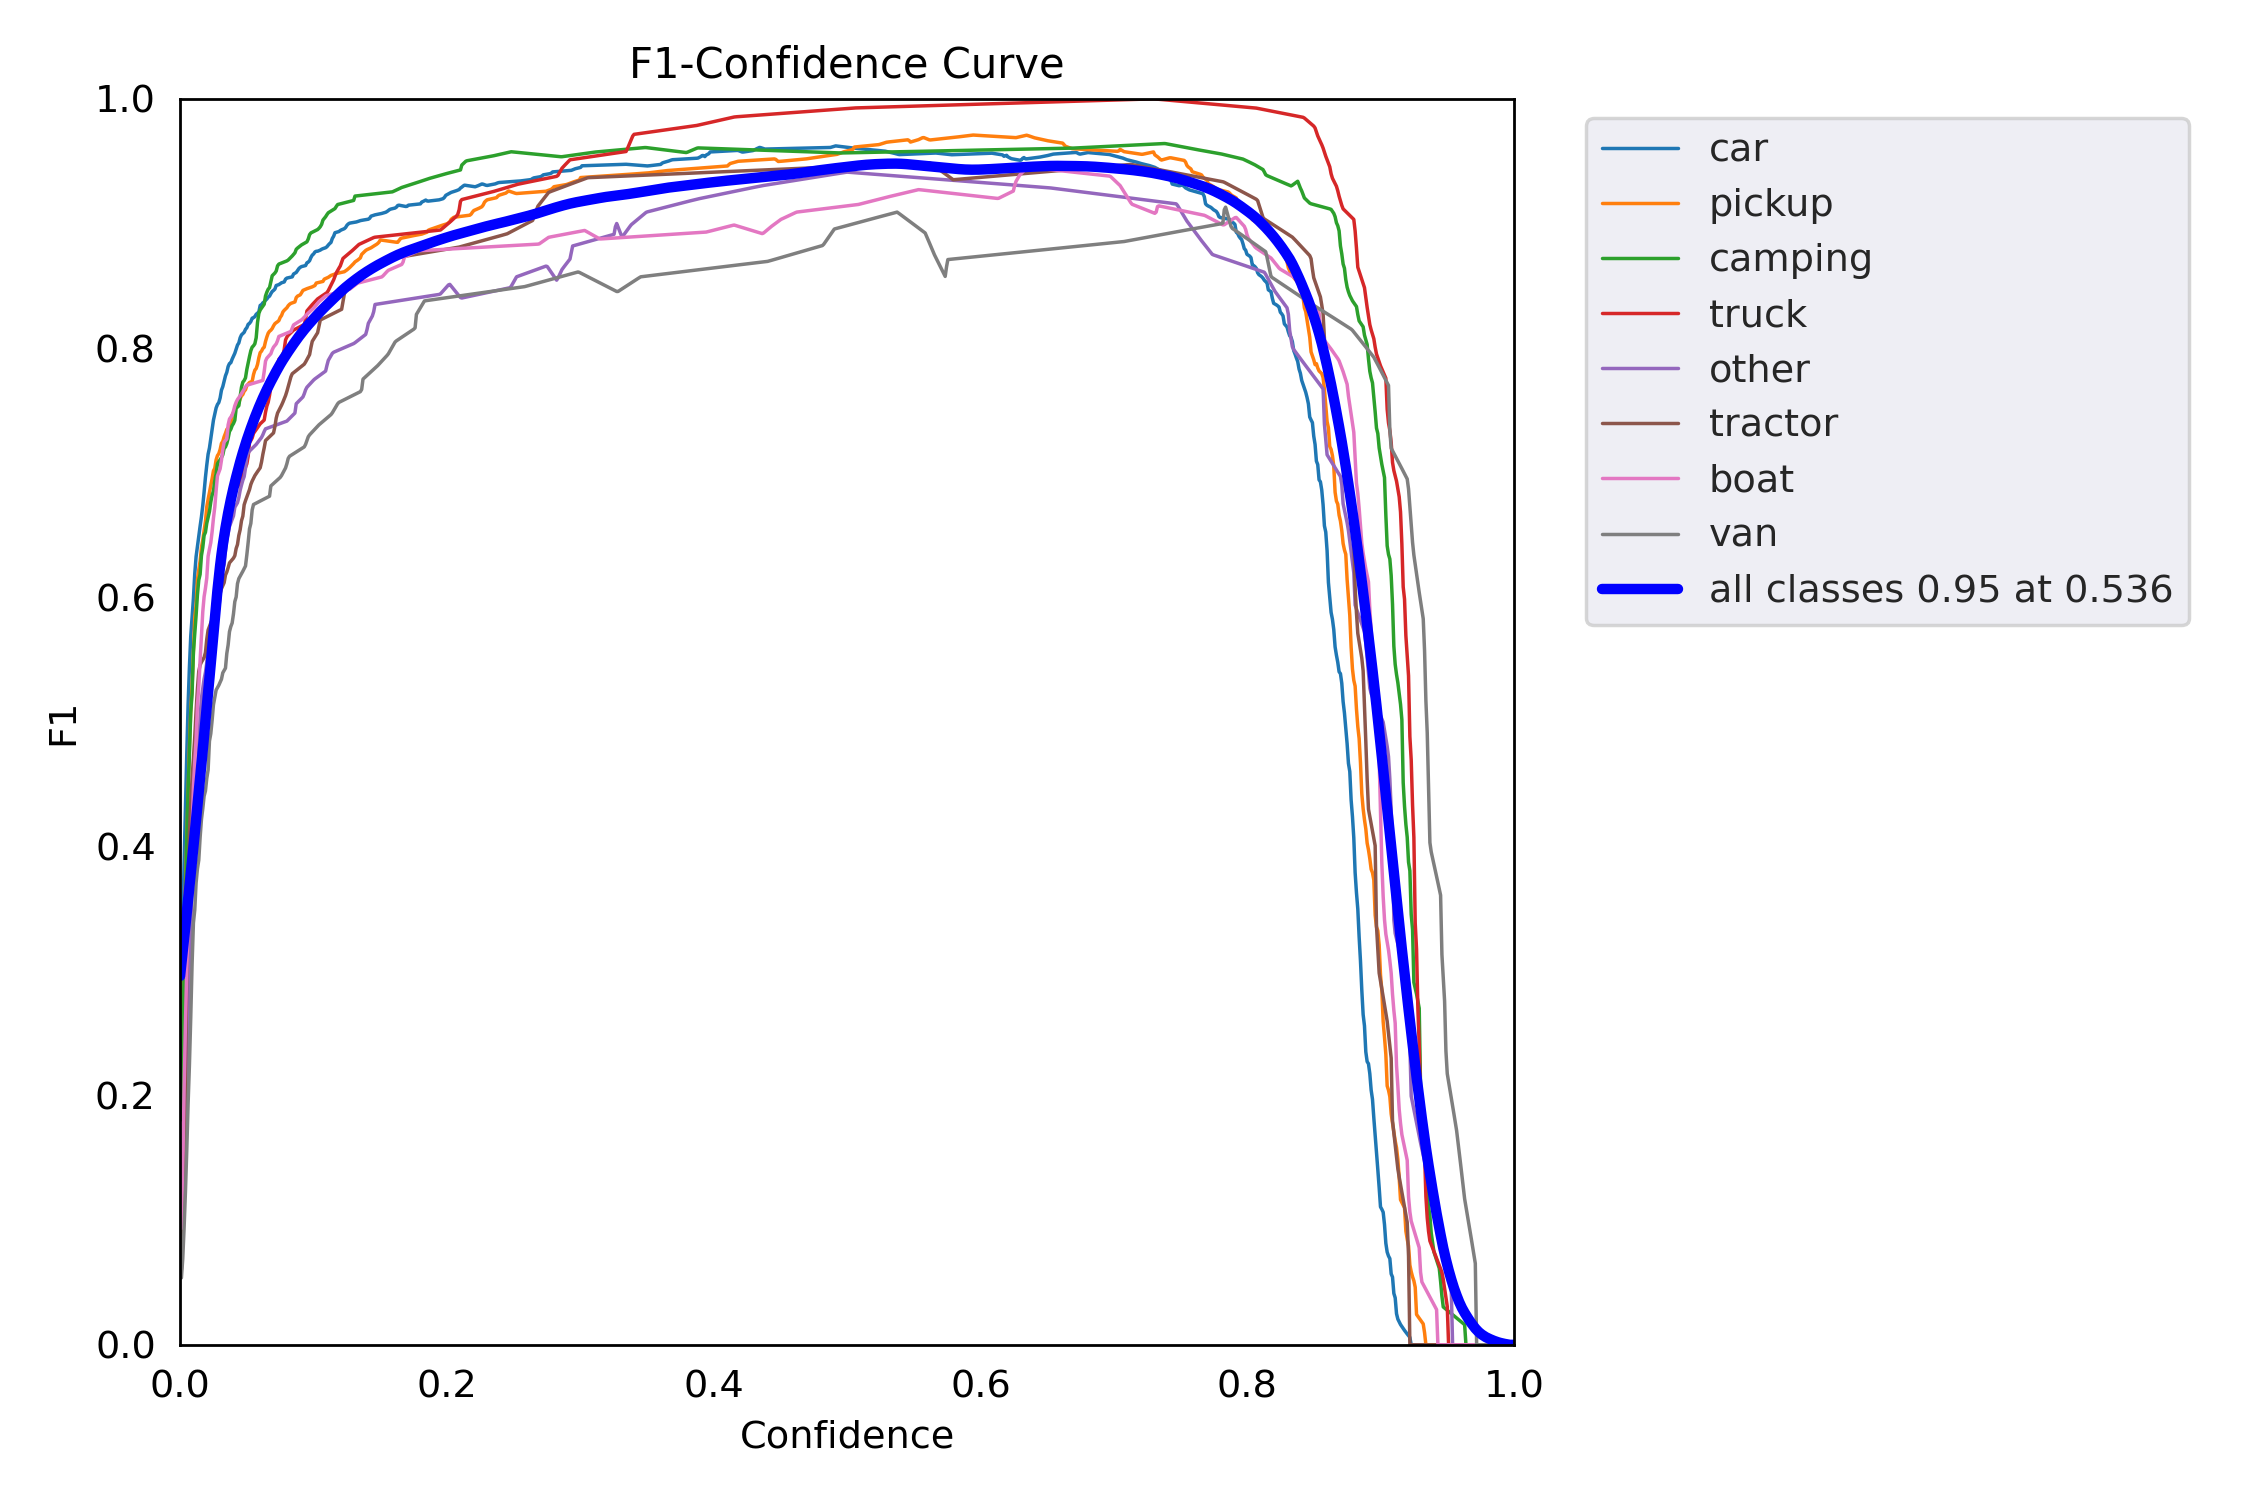

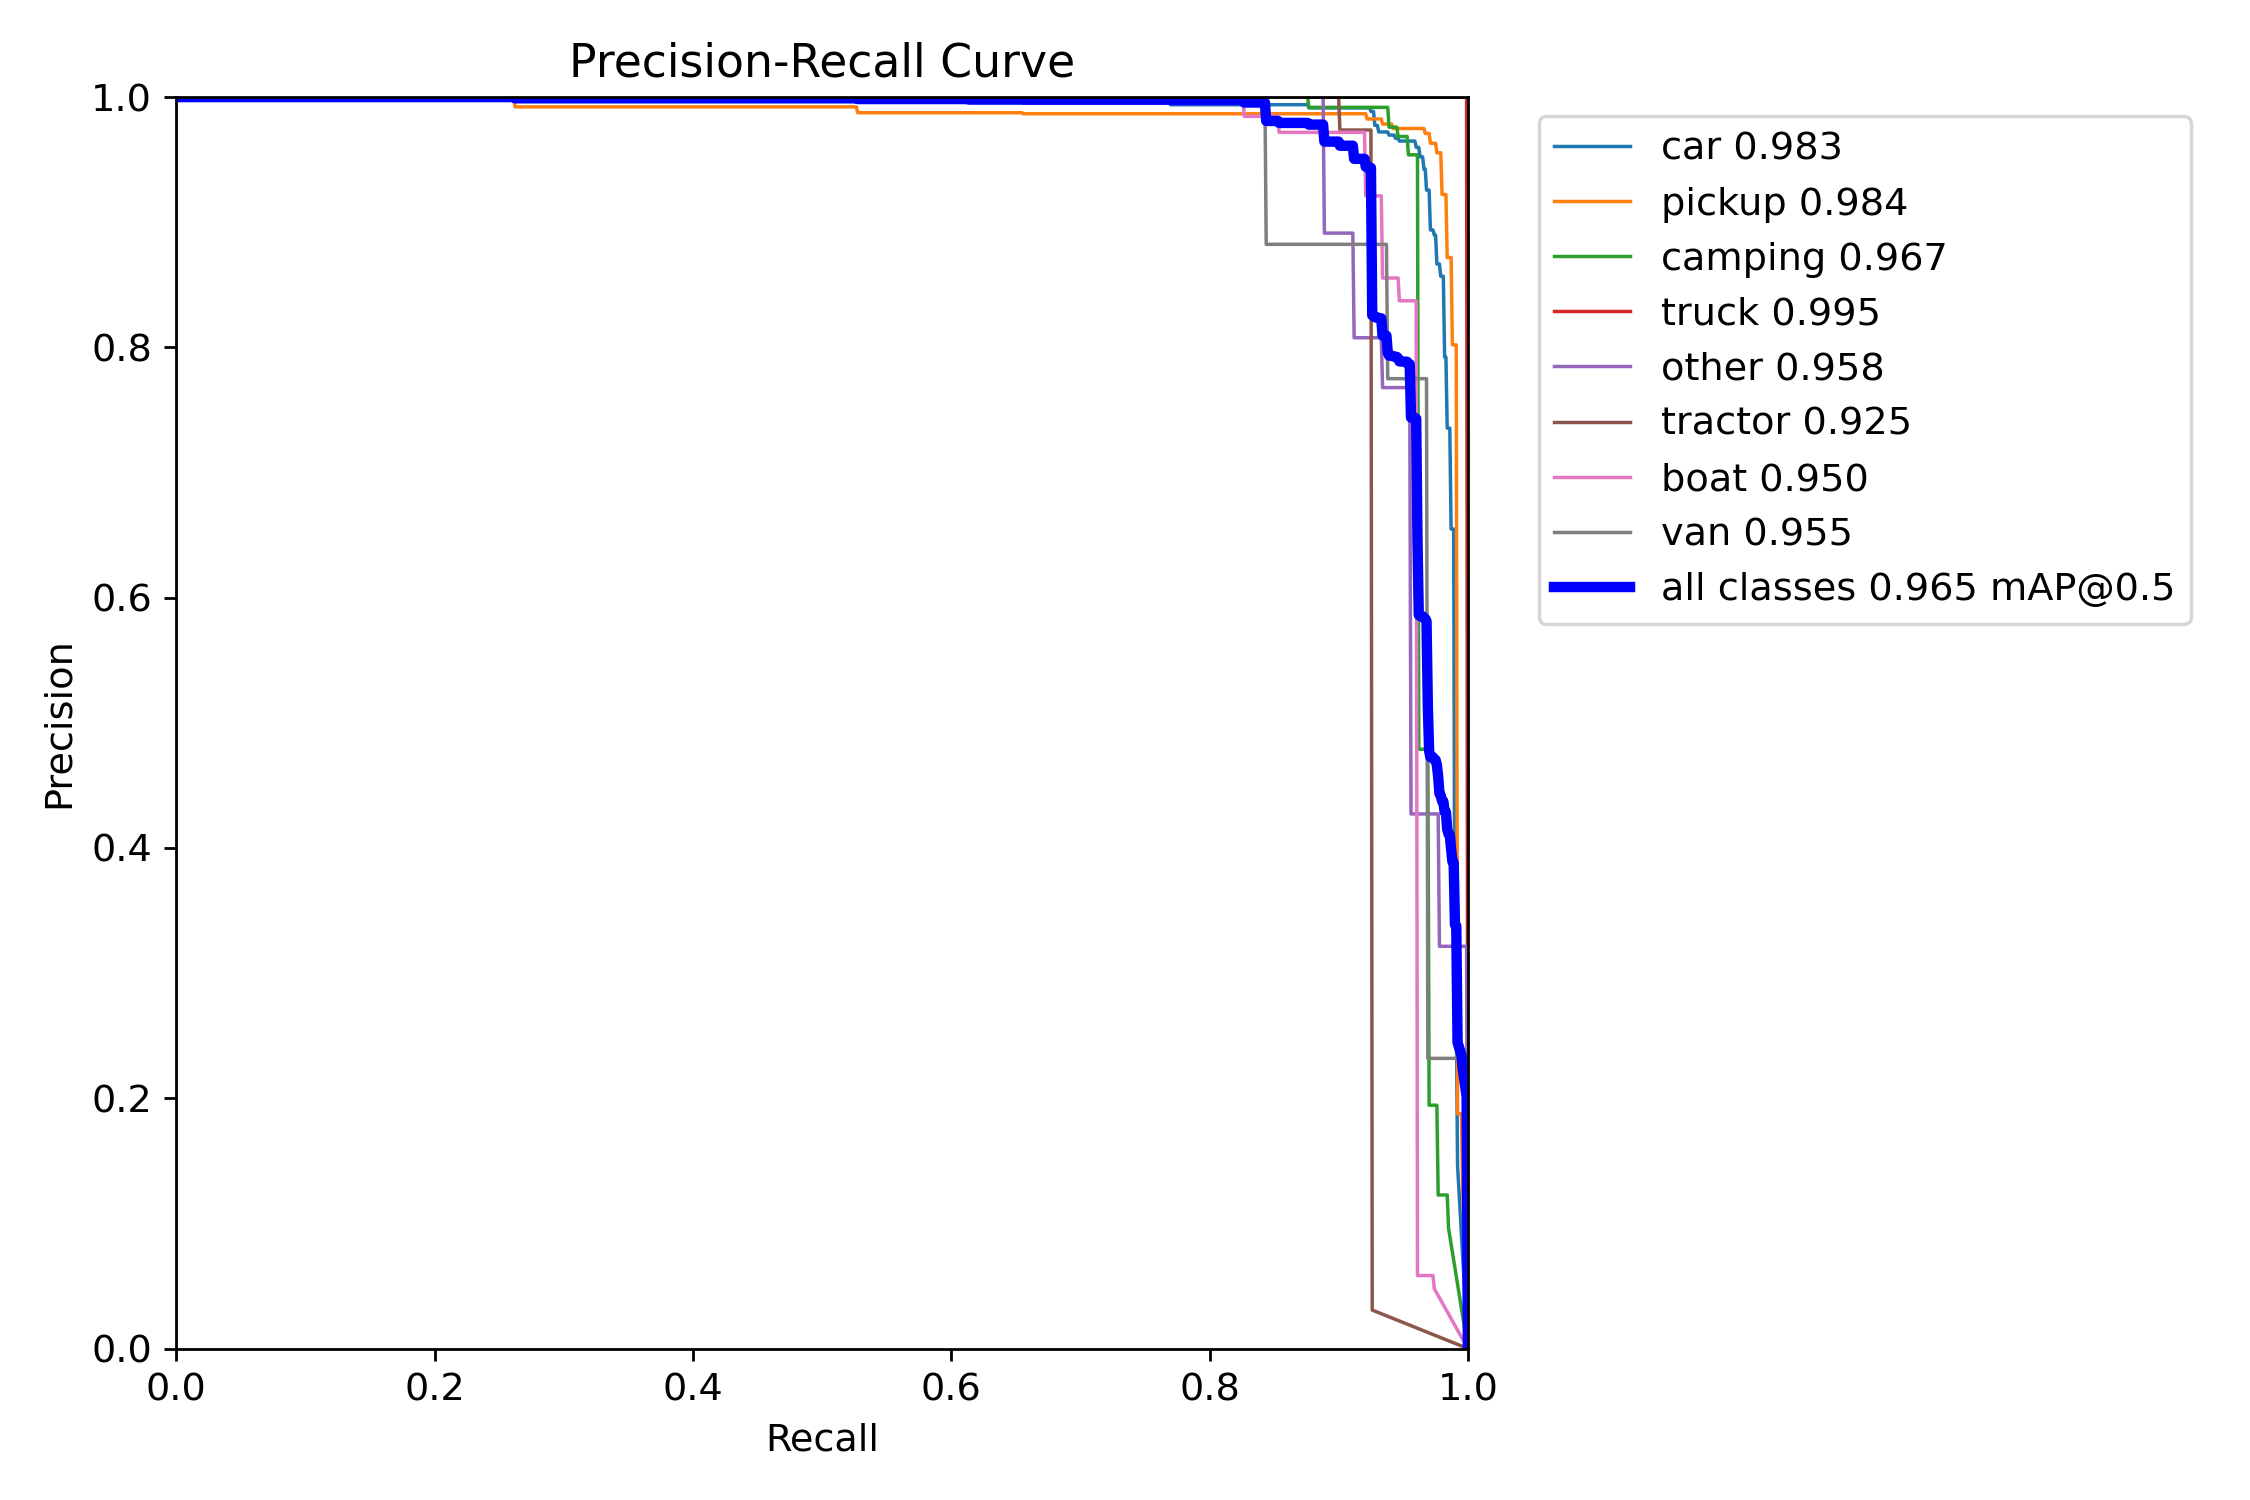

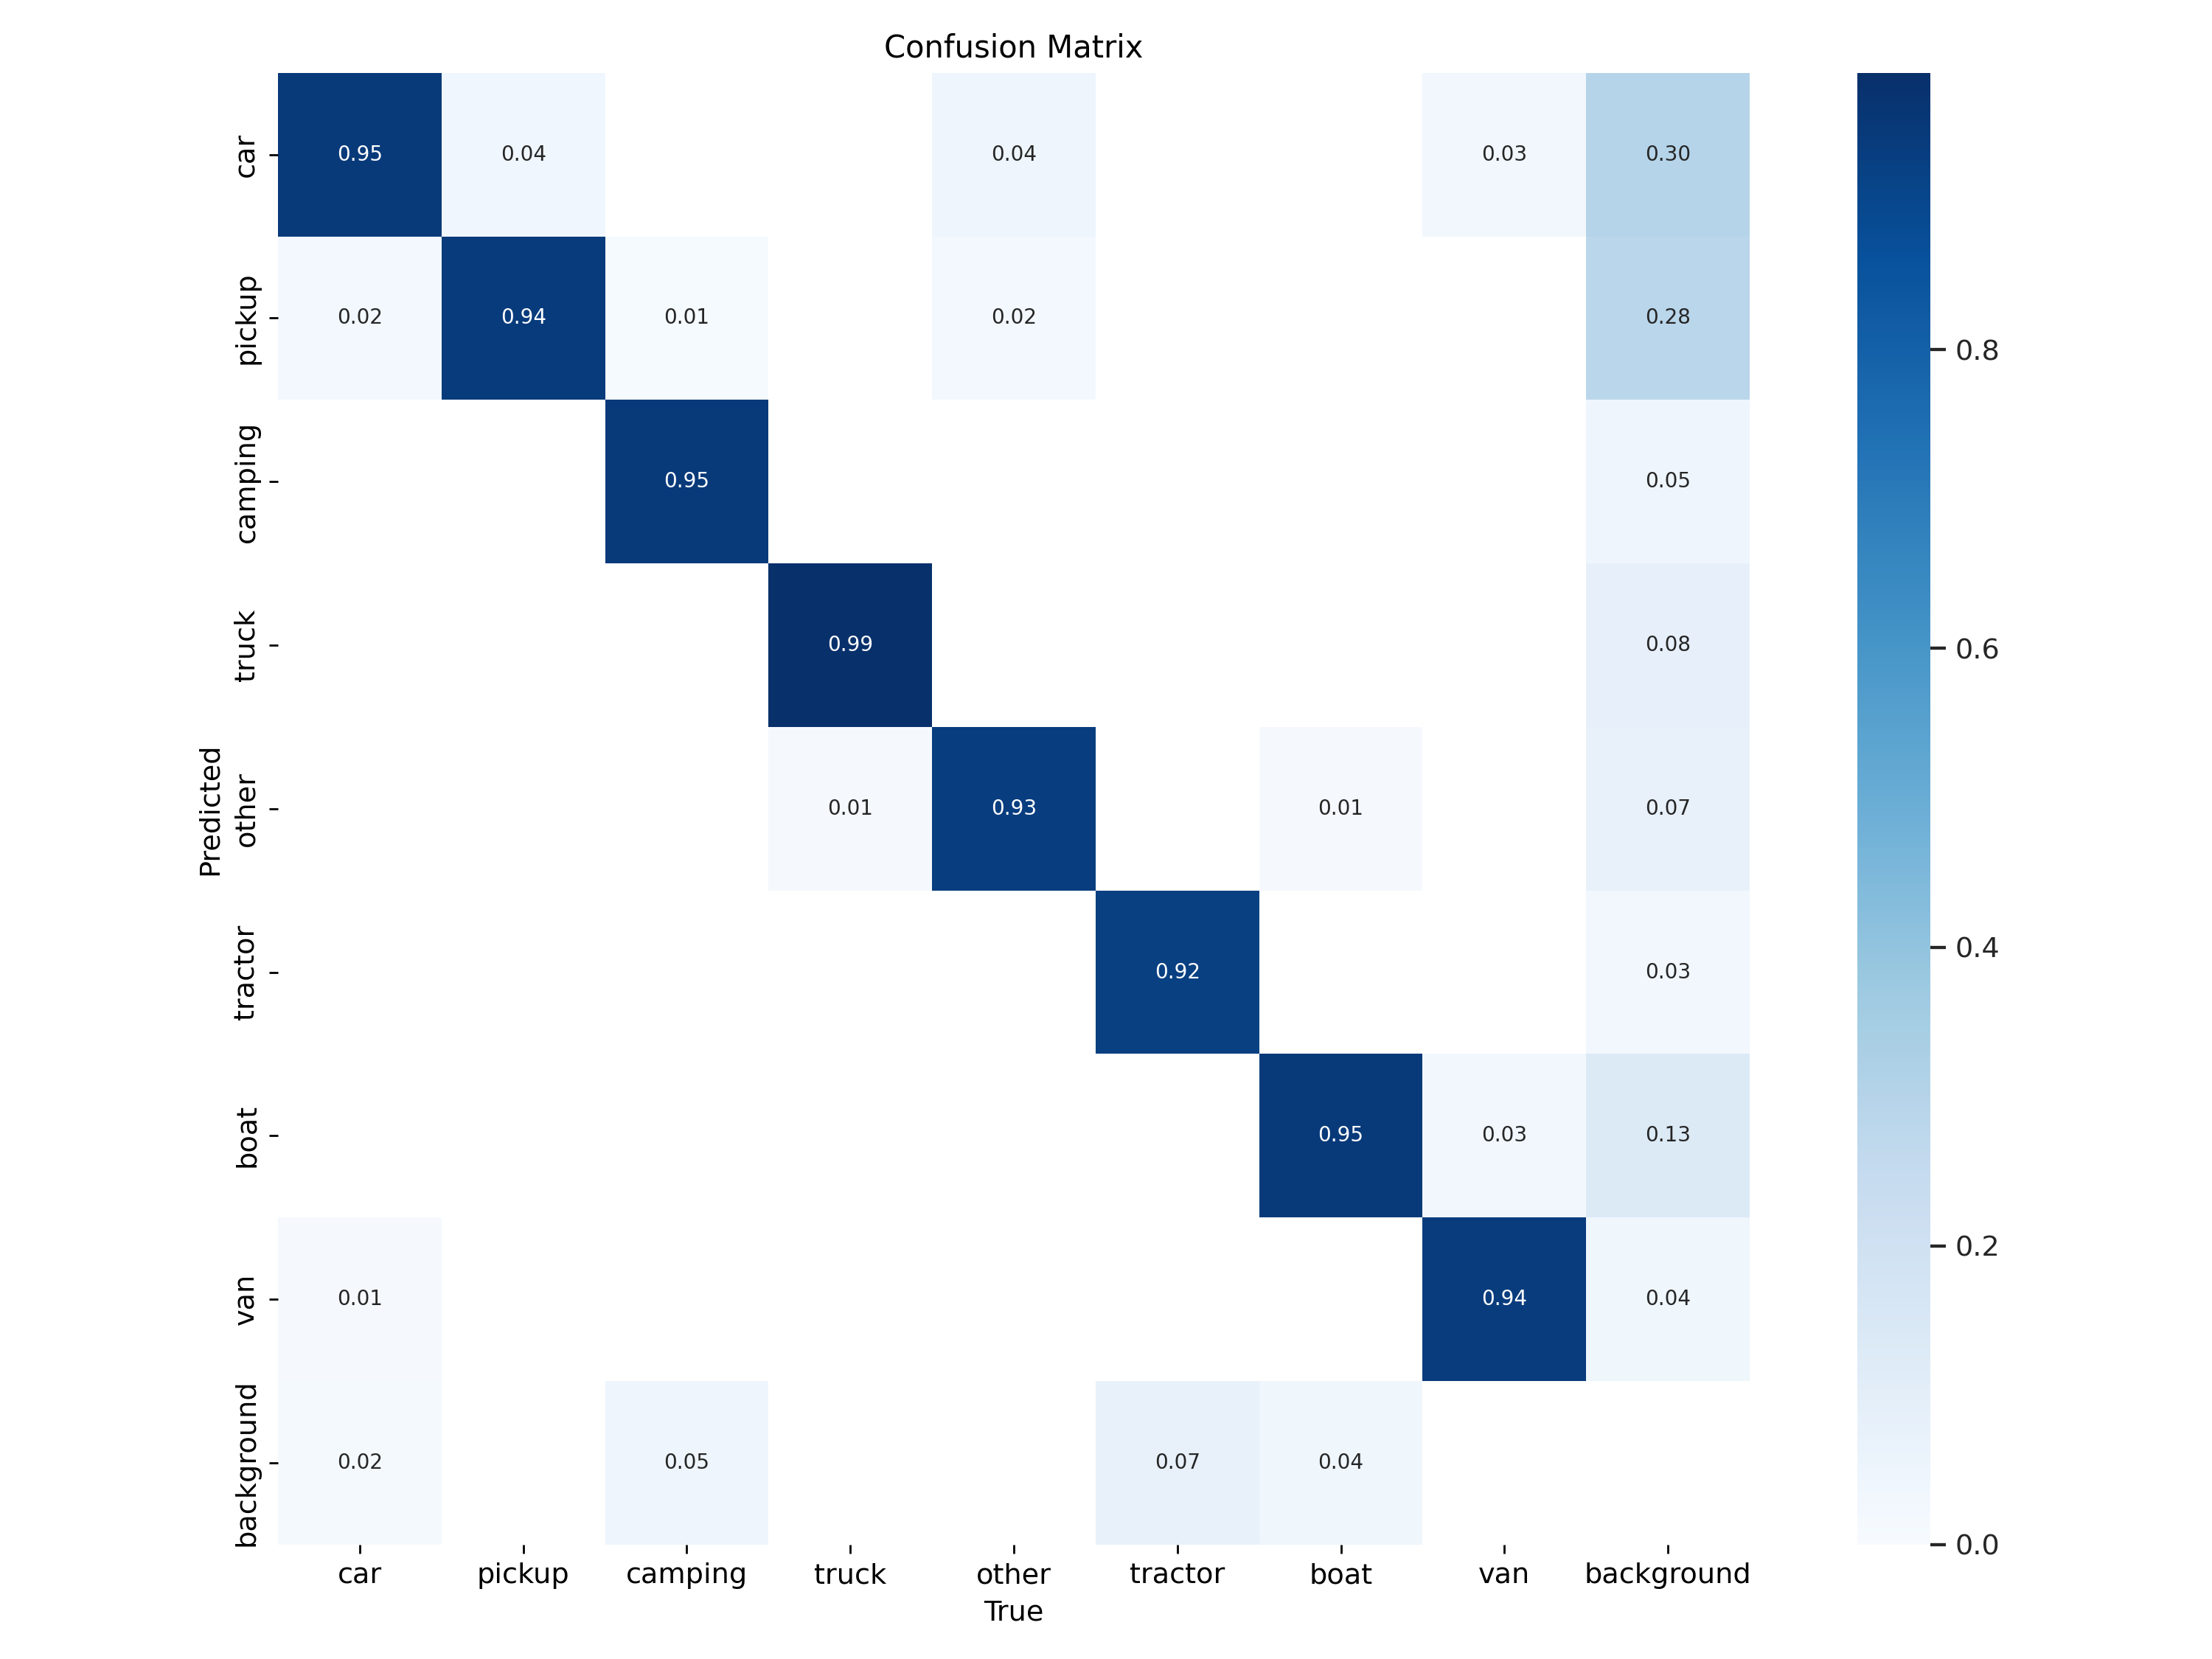

In [17]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp3/F1_curve.png')
y = Image(filename='runs/train/exp3/PR_curve.png')
z = Image(filename='runs/train/exp3/confusion_matrix.png')
display(x, y,z)

# YoloV5x

In [18]:
!wandb disabled
!python train.py --img 416 --batch 2 --epochs 200 --data /content/drive/MyDrive/16/yolo/data.yaml --weights yolov5x.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
train: weights=yolov5x.pt, cfg=, data=/content/drive/MyDrive/16/yolo/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=2, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, io

In [5]:
p_yol5x = 0.968
r_yol5x = 0.953
mAP_yolo5x = 0.975

In [17]:
storeResults('YoloV5X',p_yol5x,r_yol5x,mAP_yolo5x)

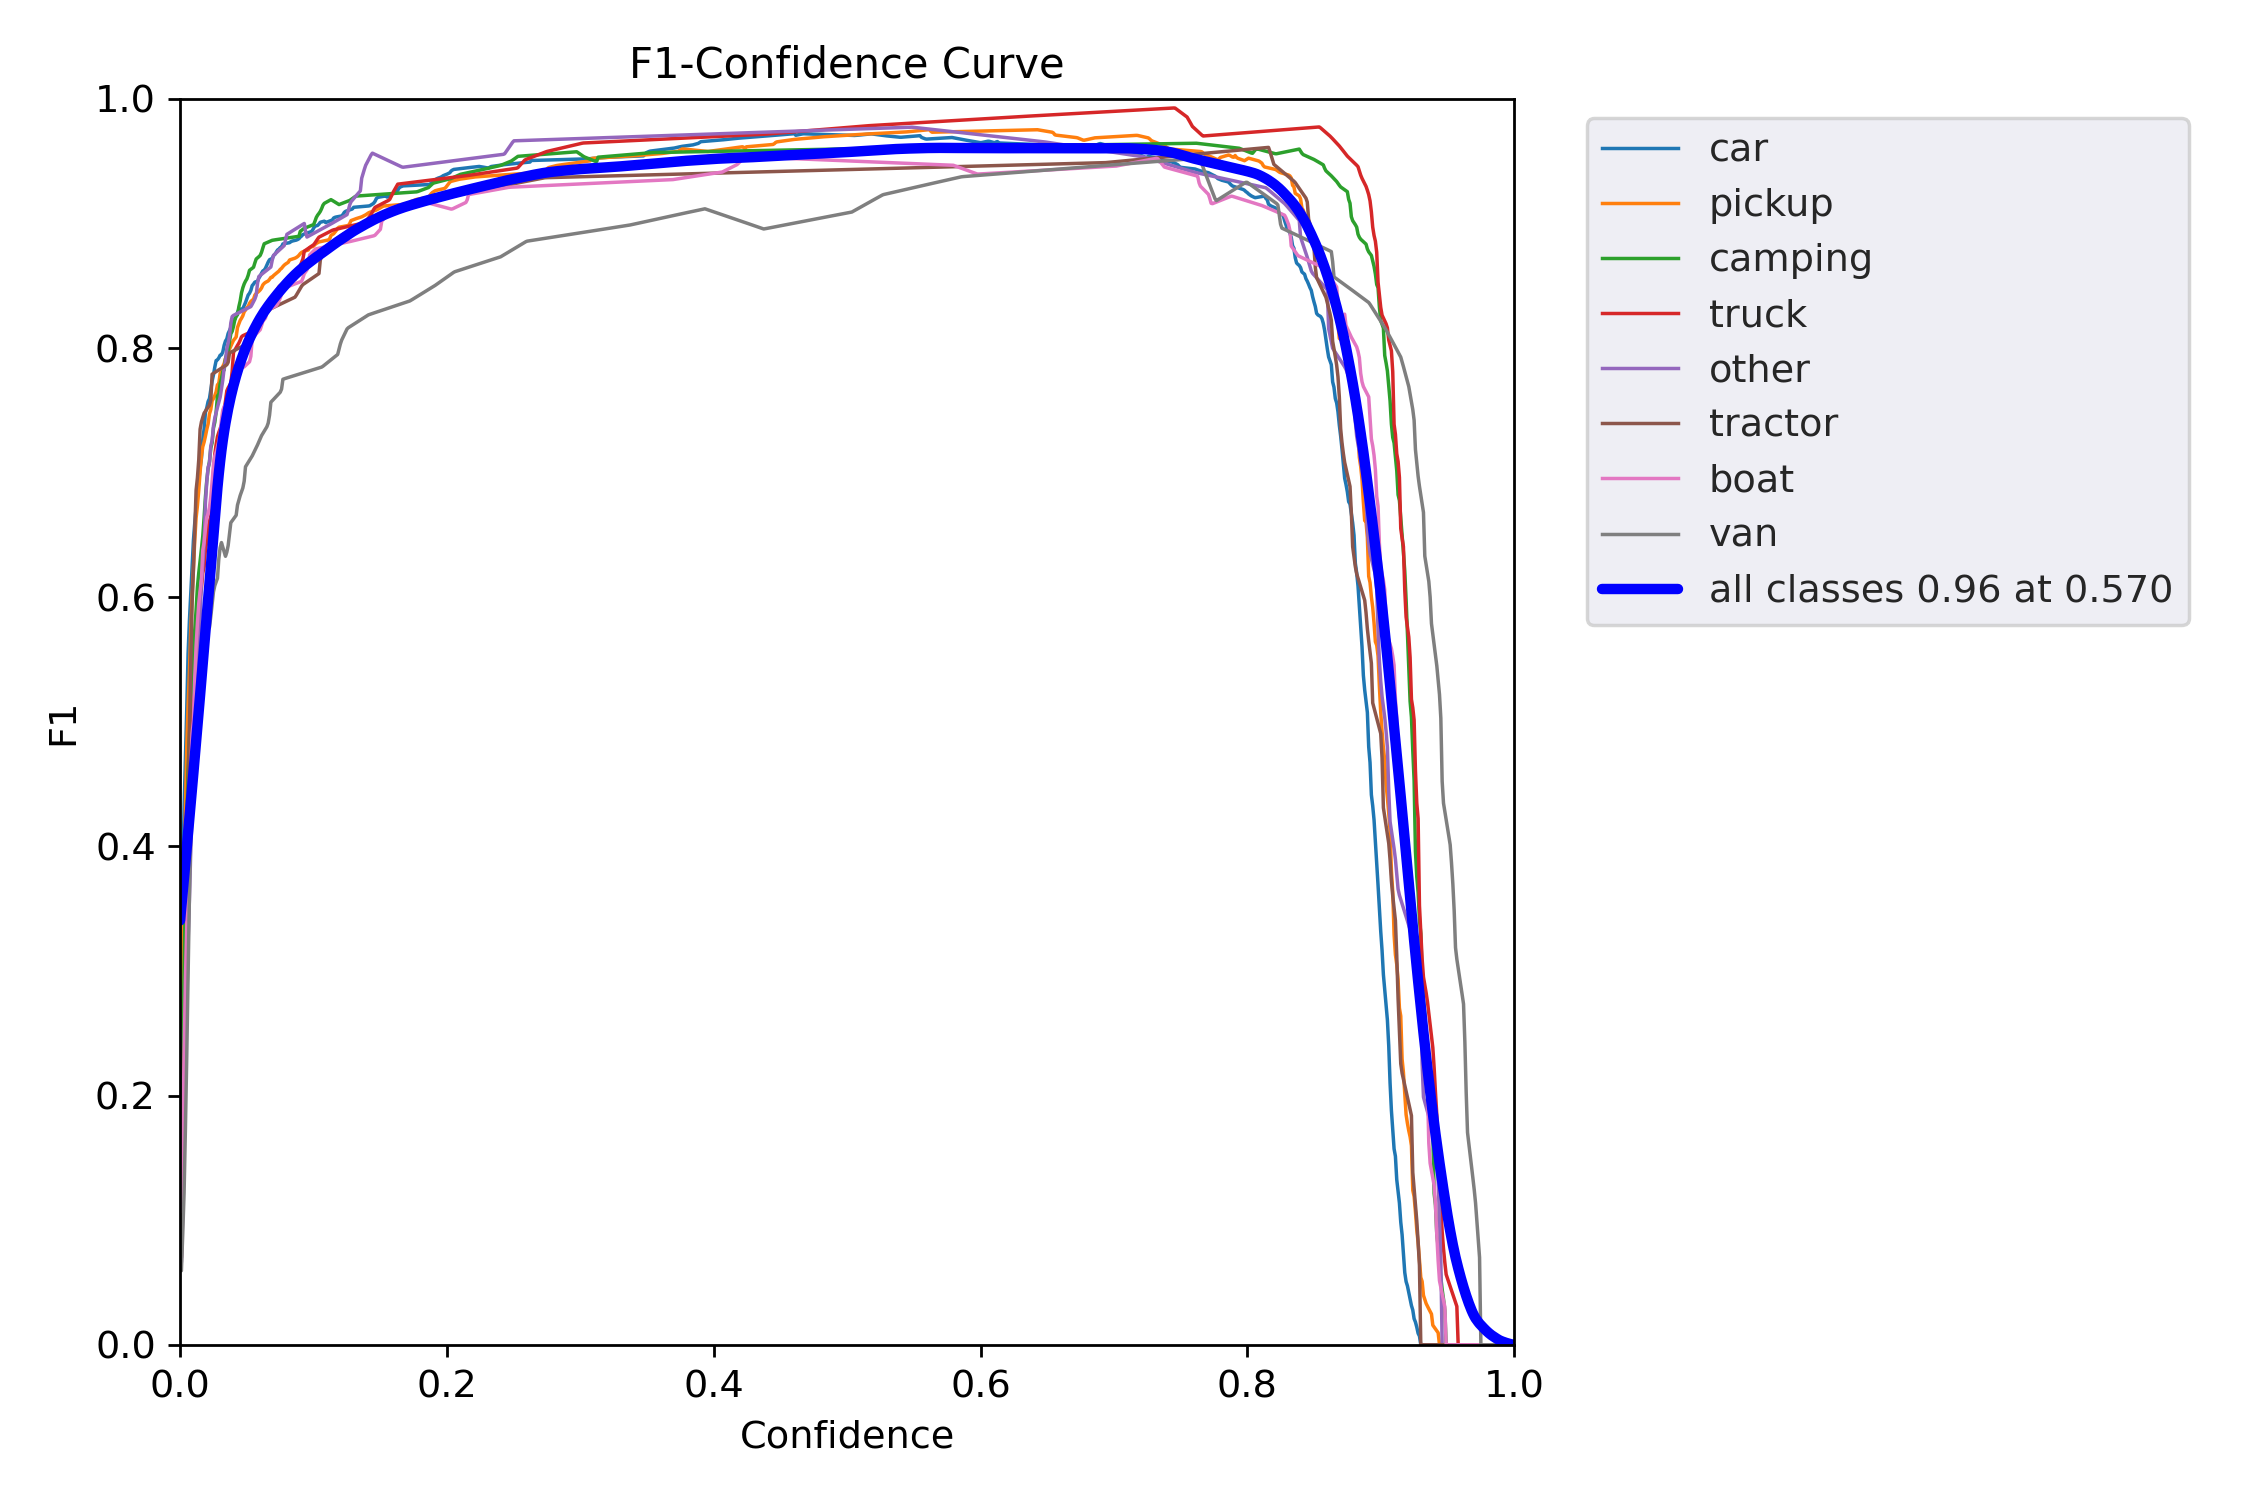

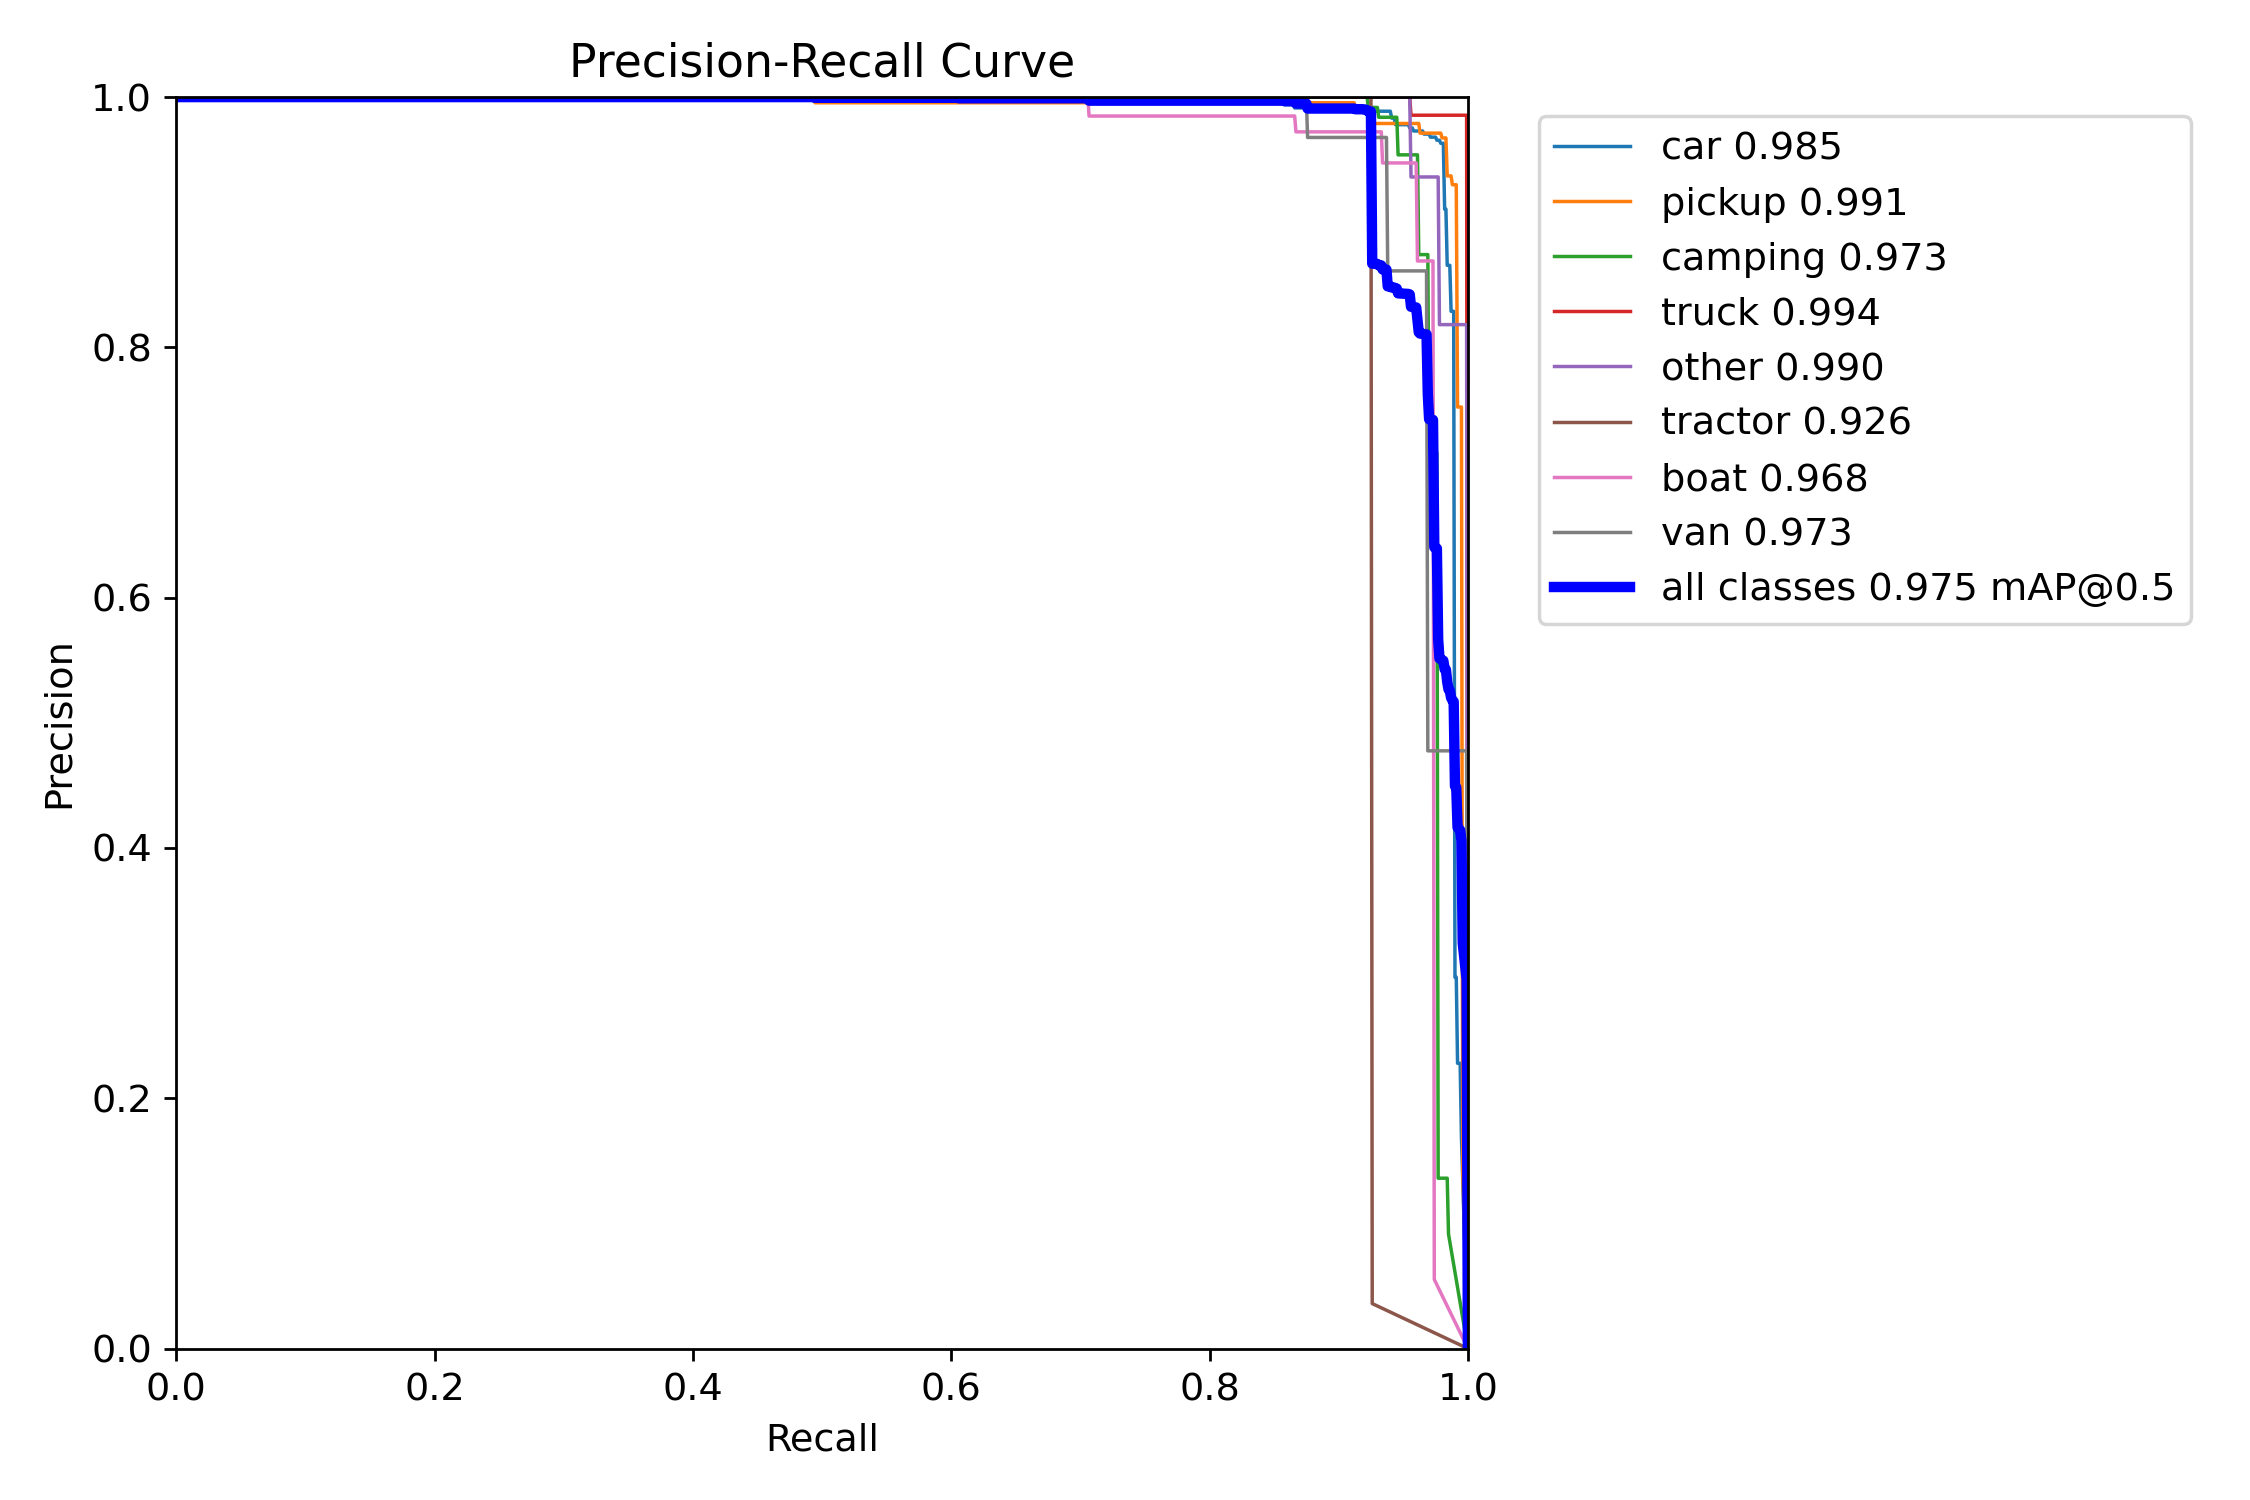

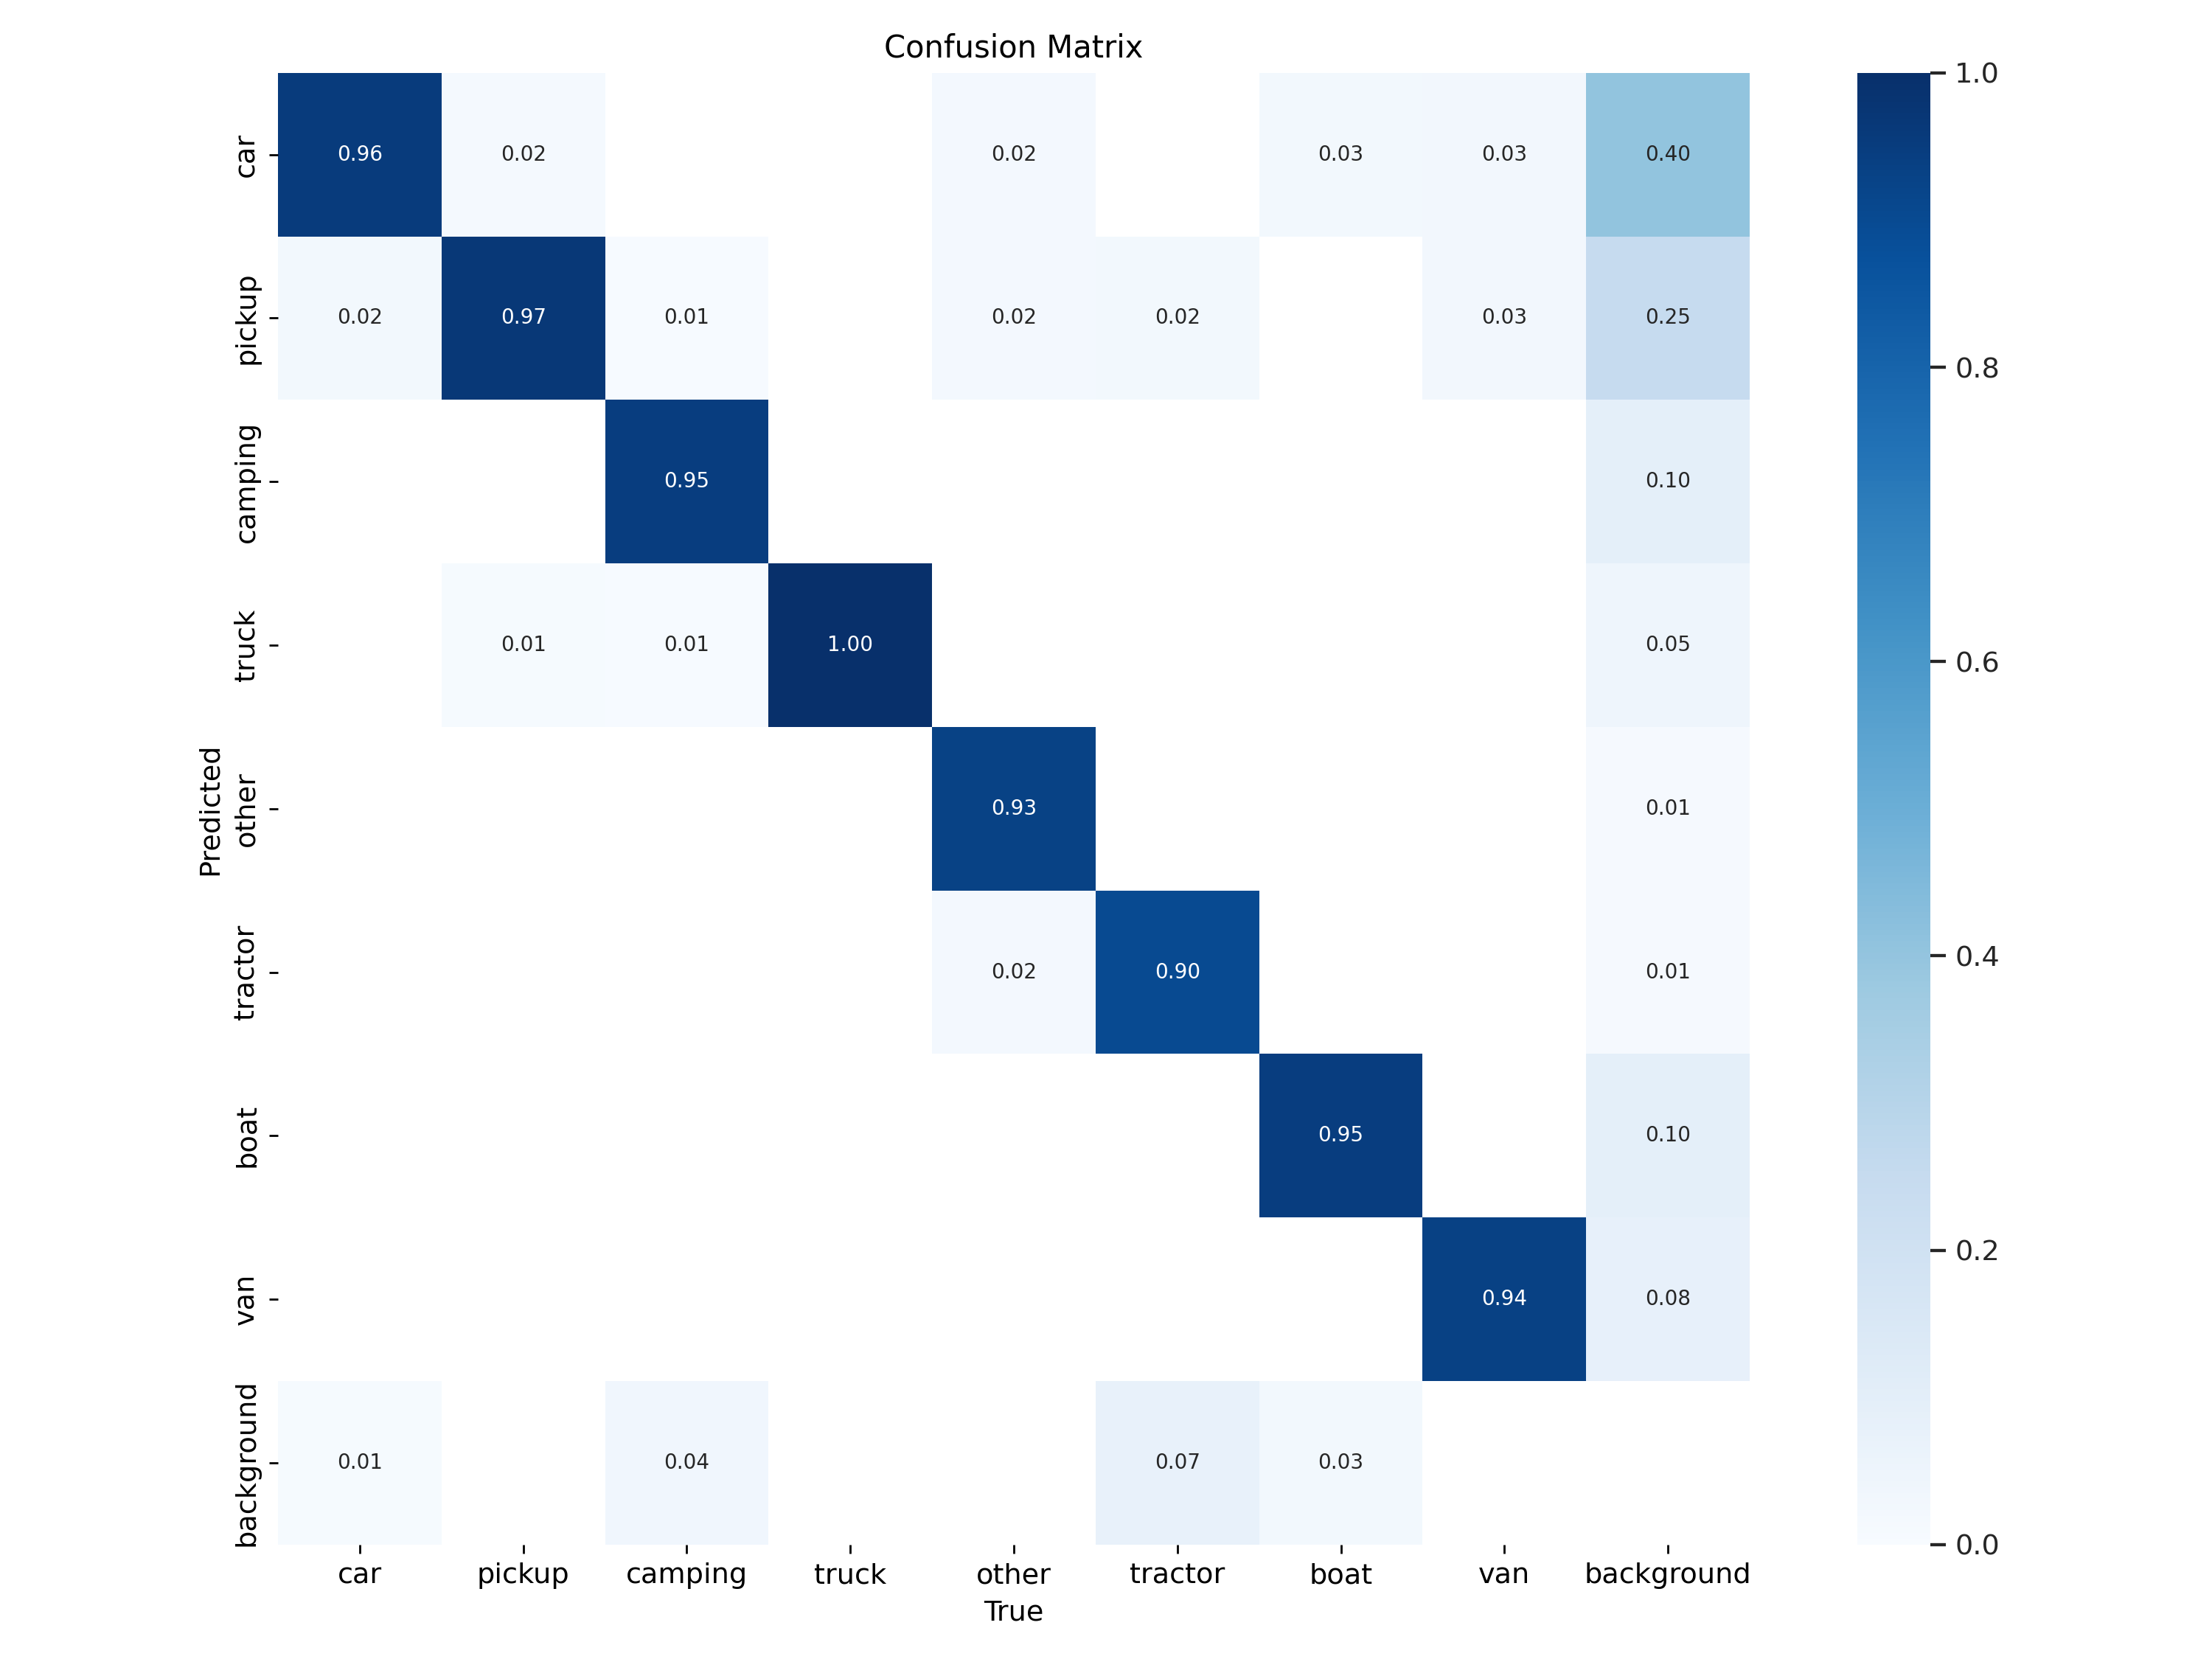

In [19]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp4/F1_curve.png')
y = Image(filename='runs/train/exp4/PR_curve.png')
z = Image(filename='runs/train/exp4/confusion_matrix.png')
display(x, y,z)

# Yolov 5x6

In [20]:
!wandb disabled
!python train.py --img 416 --batch 2 --epochs 200 --data /content/drive/MyDrive/16/yolo/data.yaml --weights yolov5x6.pt --cache --workers 2

/bin/bash: line 1: wandb: command not found
train: weights=yolov5x6.pt, cfg=, data=/content/drive/MyDrive/16/yolo/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=2, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, i

In [6]:
p_yol5xs = 0.985
r_yol5xs = 0.95
mAP_yolo5xs = 0.99

In [18]:
storeResults('YoloVx6',p_yol5xs,r_yol5xs,mAP_yolo5xs)

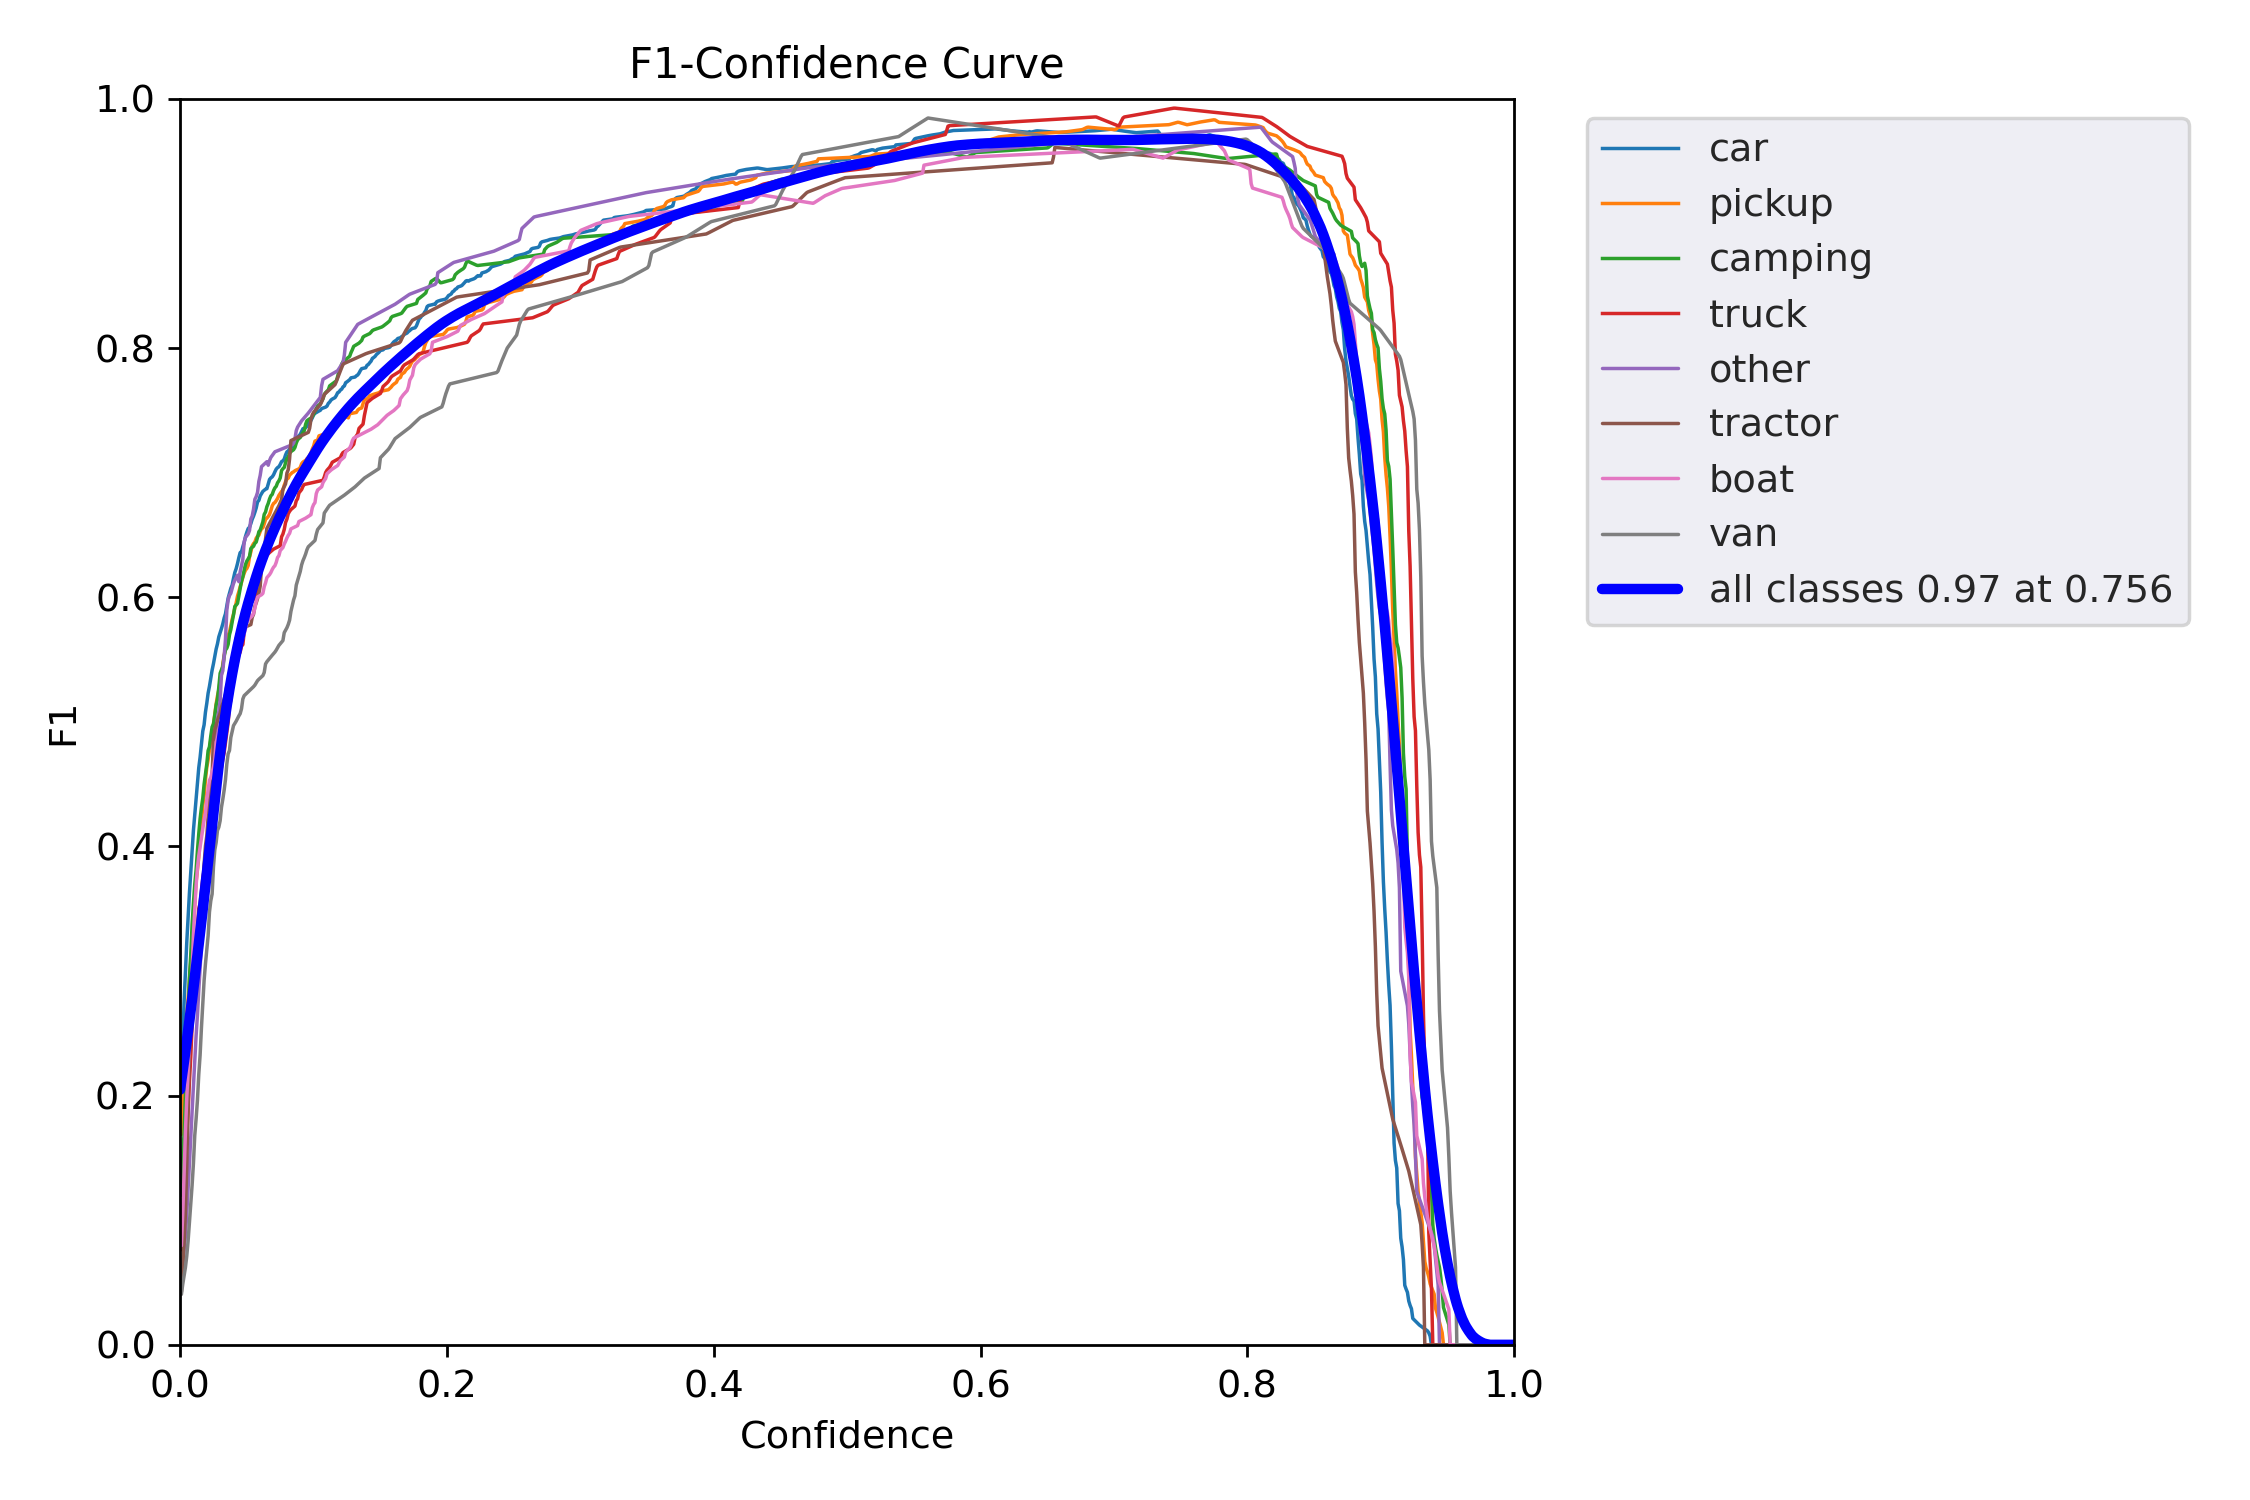

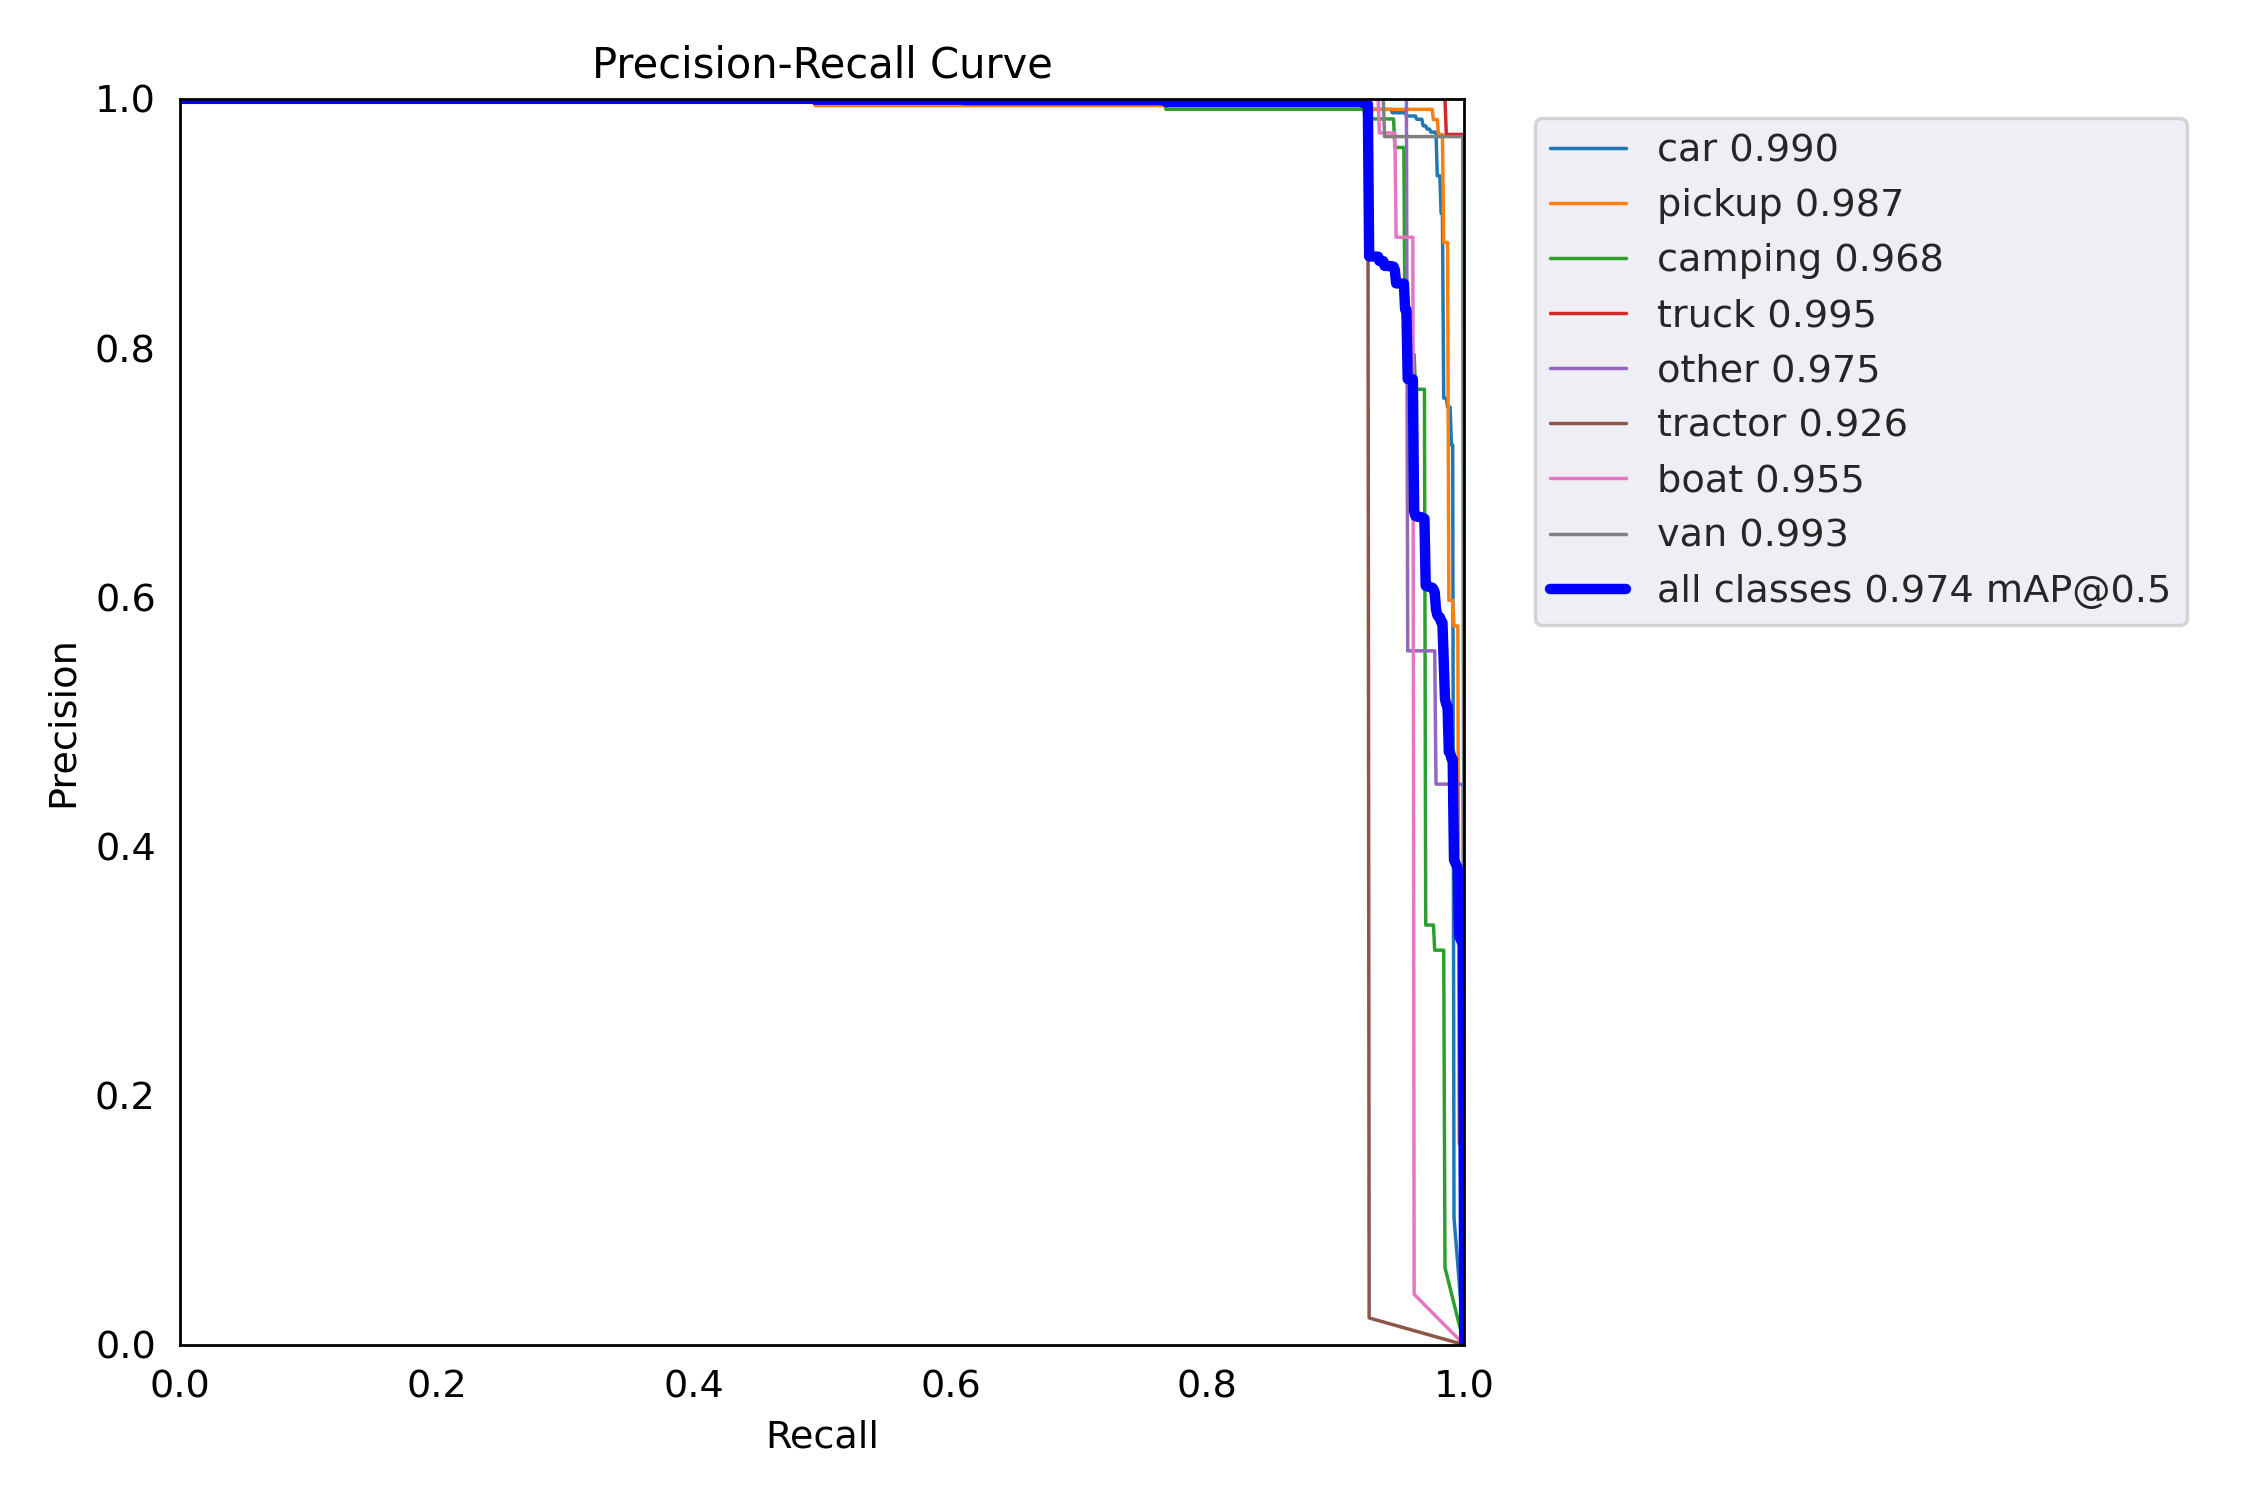

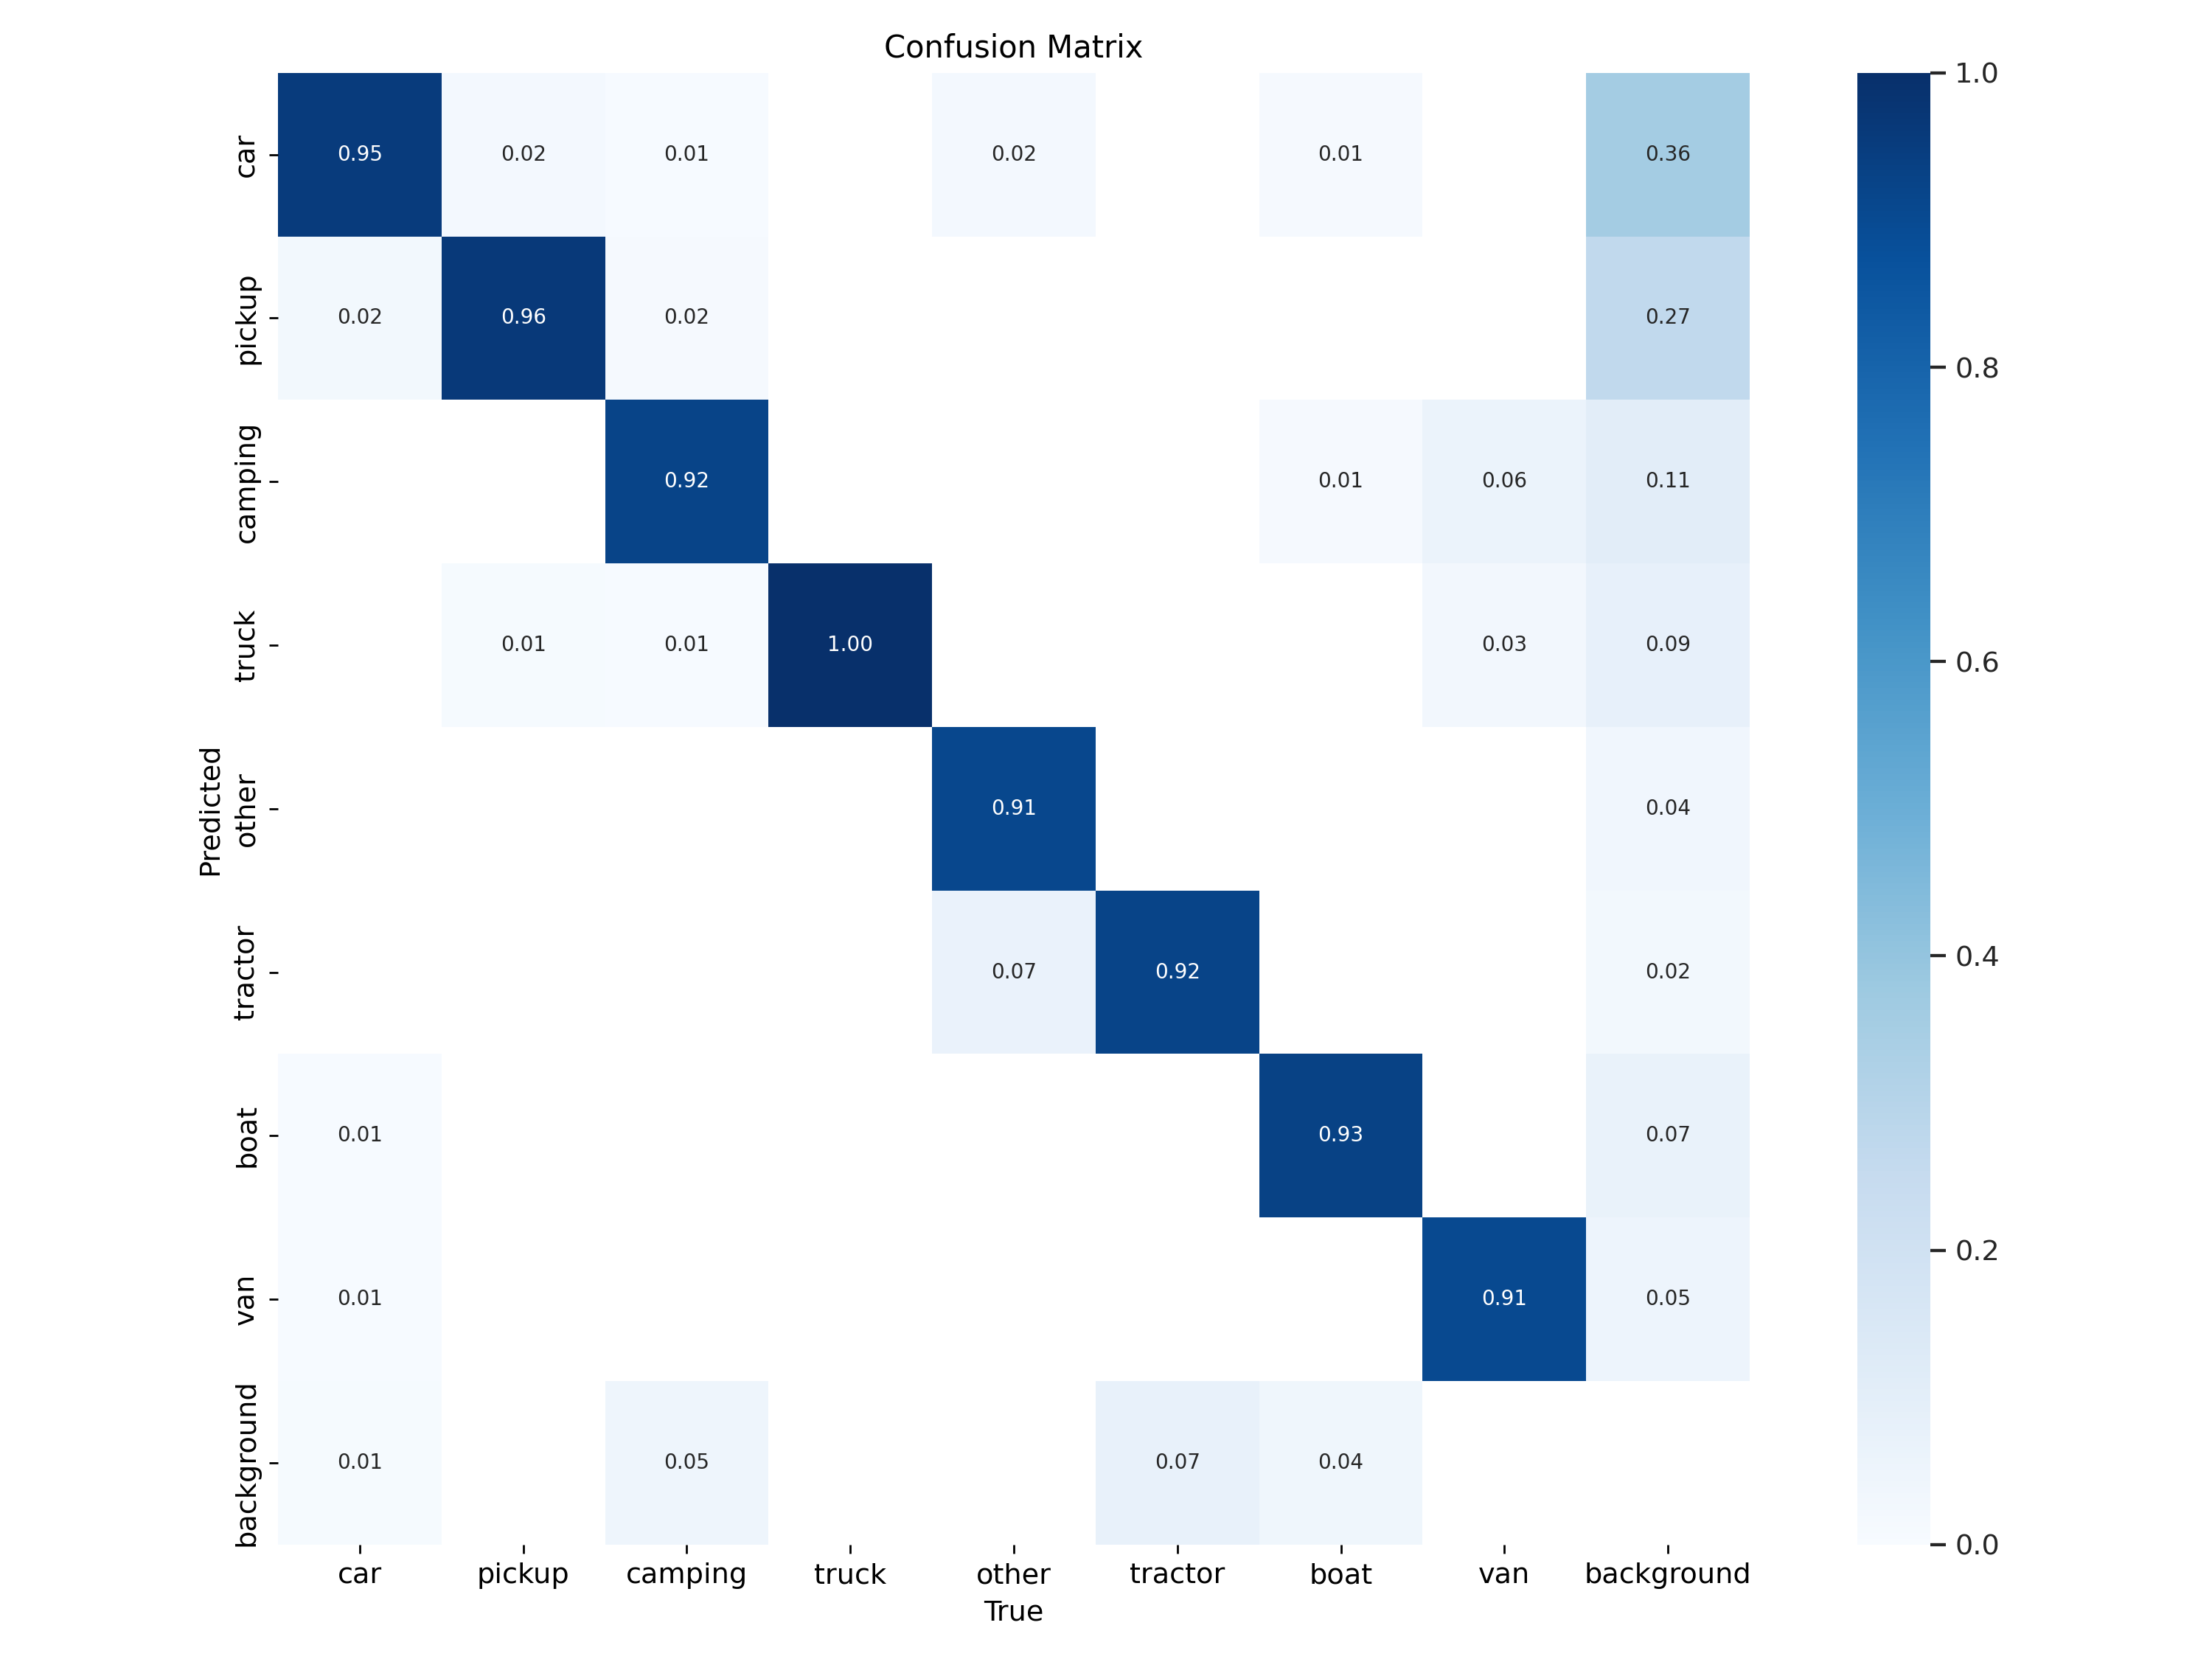

In [21]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp5/F1_curve.png')
y = Image(filename='runs/train/exp5/PR_curve.png')
z = Image(filename='runs/train/exp5/confusion_matrix.png')
display(x, y,z)

In [22]:
!zip -r /content/drive/MyDrive/16/file.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/runs/ (stored 0%)
  adding: content/yolov5/runs/train/ (stored 0%)
  adding: content/yolov5/runs/train/exp4/ (stored 0%)
  adding: content/yolov5/runs/train/exp4/val_batch2_pred.jpg (deflated 8%)
  adding: content/yolov5/runs/train/exp4/F1_curve.png (deflated 8%)
  adding: content/yolov5/runs/train/exp4/train_batch2.jpg (deflated 8%)
  adding: content/yolov5/runs/train/exp4/labels.jpg (deflated 26%)
  adding: content/yolov5/runs/train/exp4/hyp.yaml (deflated 45%)
  adding: content/yolov5/runs/train/exp4/weights/ (stored 0%)
  adding: content/yolov5/runs/train/exp4/weights/last.pt (deflated 8%)
  adding: content/yolov5/runs/train/exp4/weights/best.pt (deflated 8%)
  adding: content/yolov5/runs/train/exp4/events.out.tfevents.1697115956.10a4459761bc.66911.0 (deflated 43%)
  adding: content/yolov5/runs/train/exp4/val_batch1_labels.jpg (deflated 8%)
  adding: content/yolov5/runs/train/exp4/PR_curve.png (deflated 16%)
  adding: c

# YoloV3

In [34]:
%cd /content

/content


In [29]:
!git clone https://github.com/ultralytics/yolov3

fatal: destination path 'yolov3' already exists and is not an empty directory.


In [30]:
%cd /content/yolov3/

/content/yolov3


In [31]:
!pip install -r requirements.txt

In [32]:
train: '/content/drive/MyDrive/16/yolo/train/images'
val: '/content/drive/MyDrive/16/yolo/valid/images'

# number of classes
nc: 8

# class names
names: ['car', 'pickup', 'camping','truck', 'other', 'tractor', 'boat', 'van']

In [28]:
!python train.py --img 416 --batch 16 --epochs 200 --data /content/drive/MyDrive/16/yolo/data.yaml --weights yolov3.pt

train: weights=yolov3.pt, cfg=, data=/content/drive/MyDrive/16/yolo/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 16003, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 16003 (delta 21), reused 20 (delta 13), pack-reused 15967
Receiving objects: 100% (16003/16003), 14.60 MiB | 15.16 MiB/s, done.
Command 'git fetch ultralytics' timed out after 5 seconds
Resolving deltas: 100% (10987/10987), done.
YOL

In [19]:
p_yol3 = 0.978
r_yol3 = 0.947
mAP_yolo3 = 0.973

In [20]:
storeResults('YoloV3',p_yol3,r_yol3,mAP_yolo3)

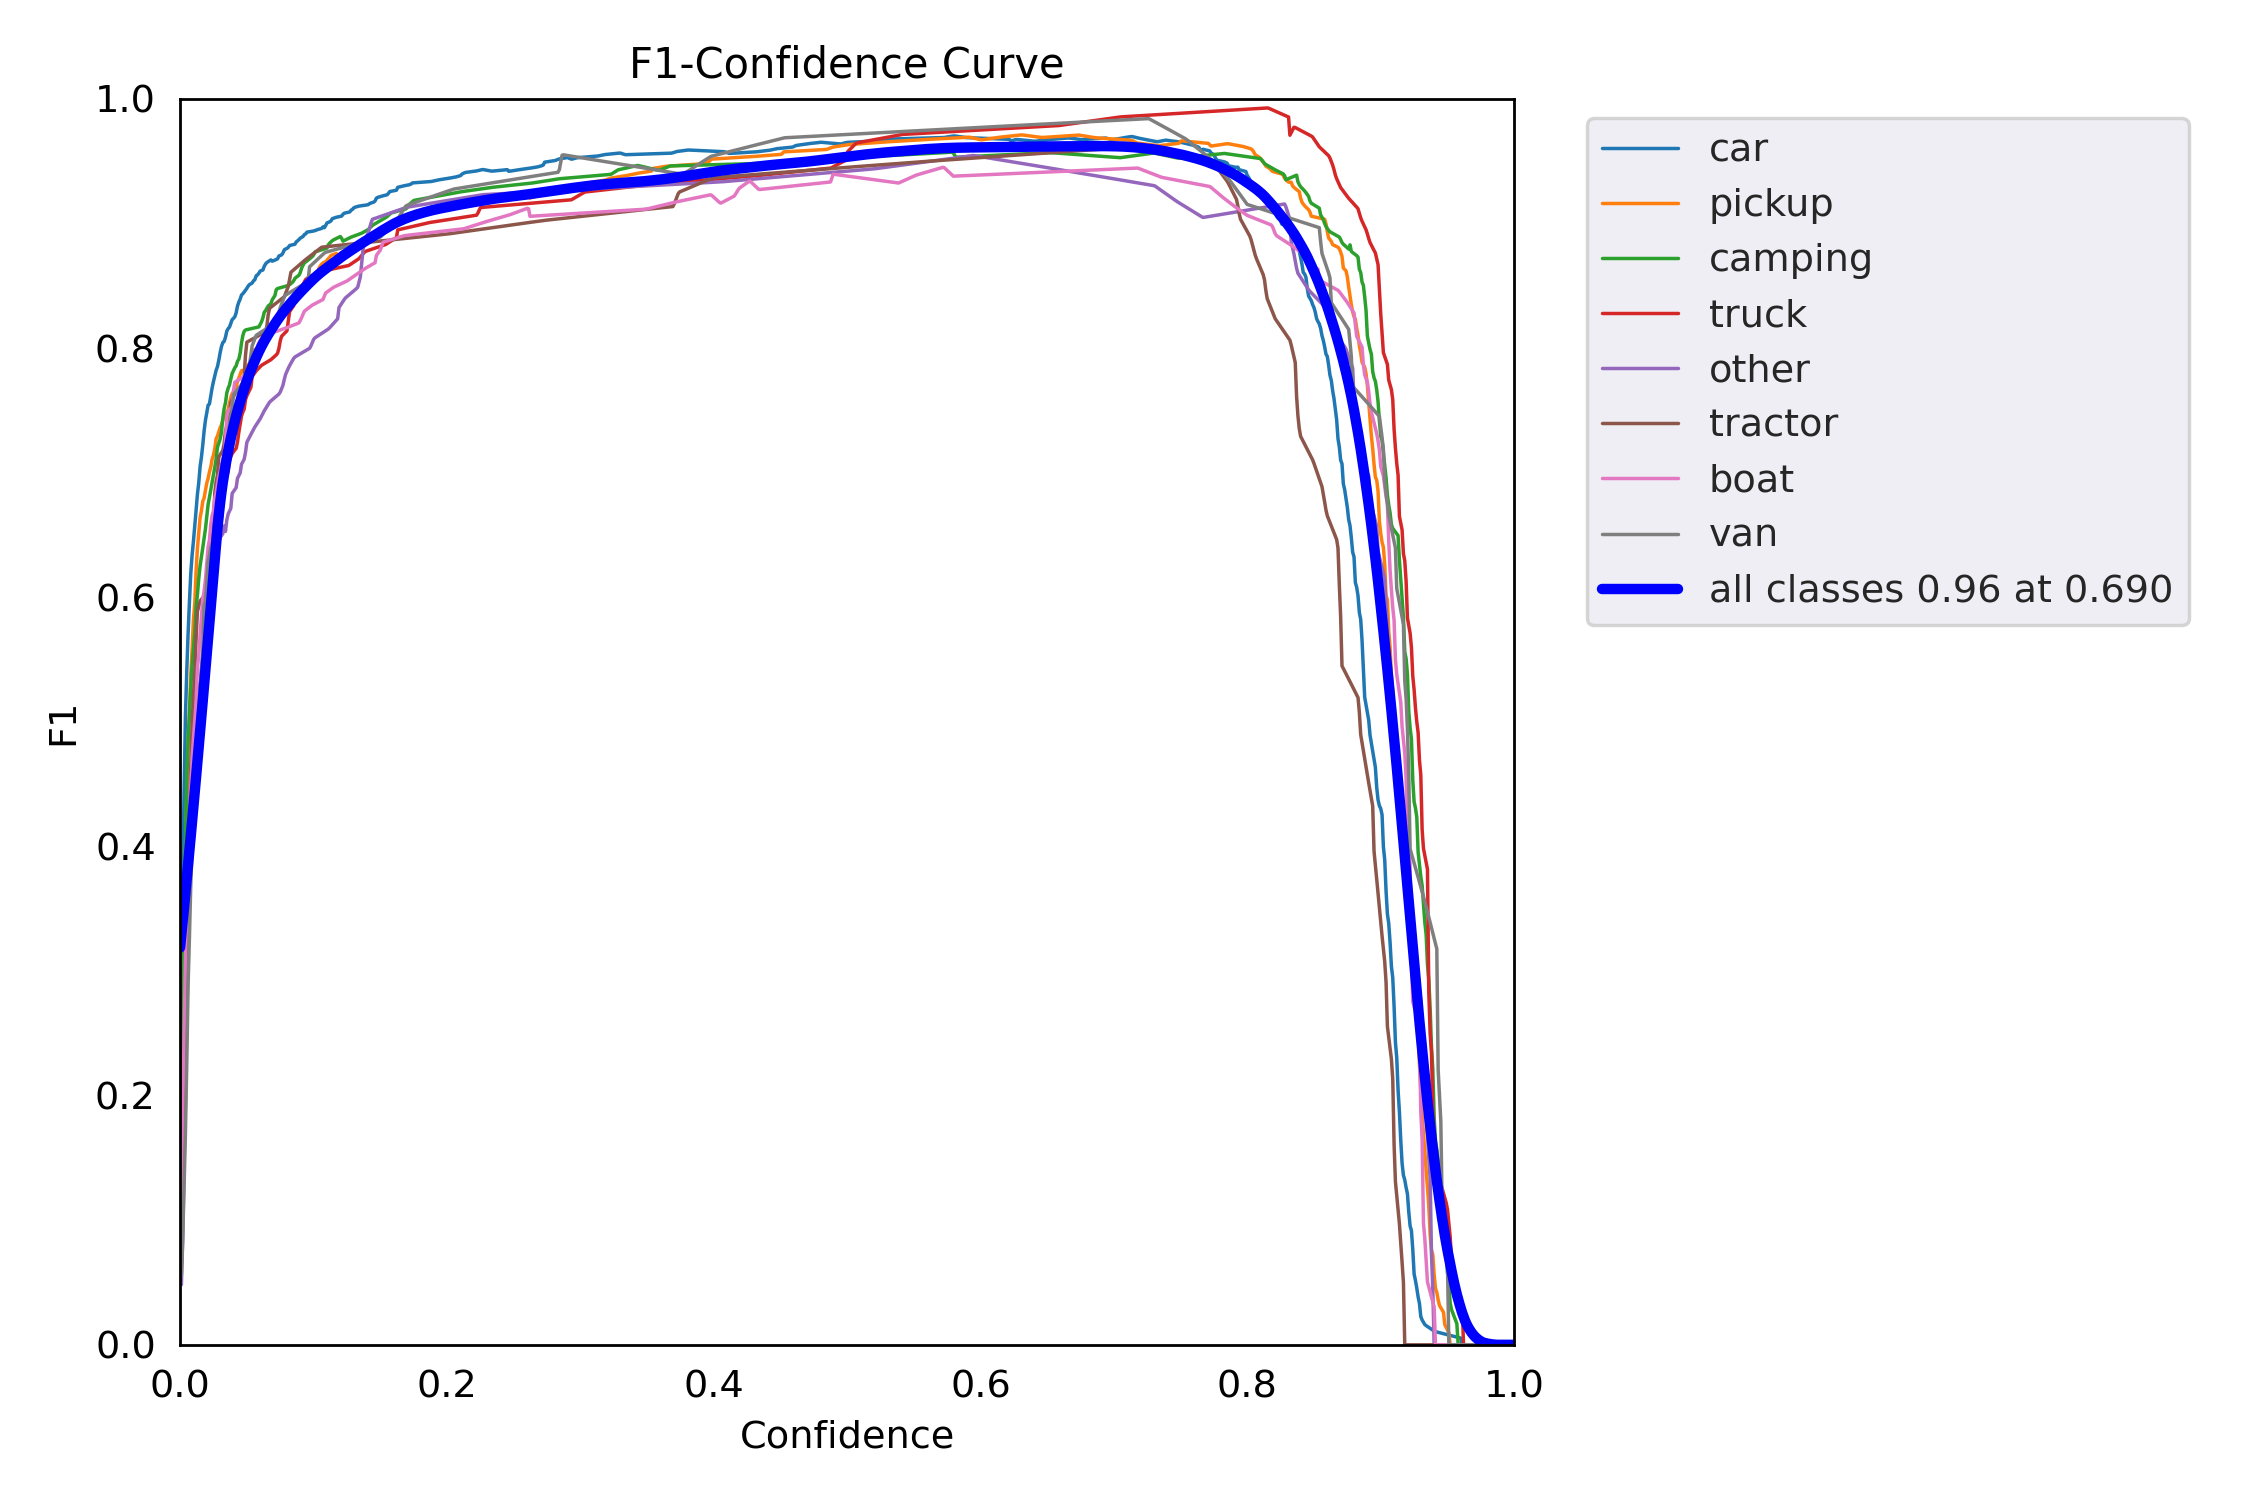

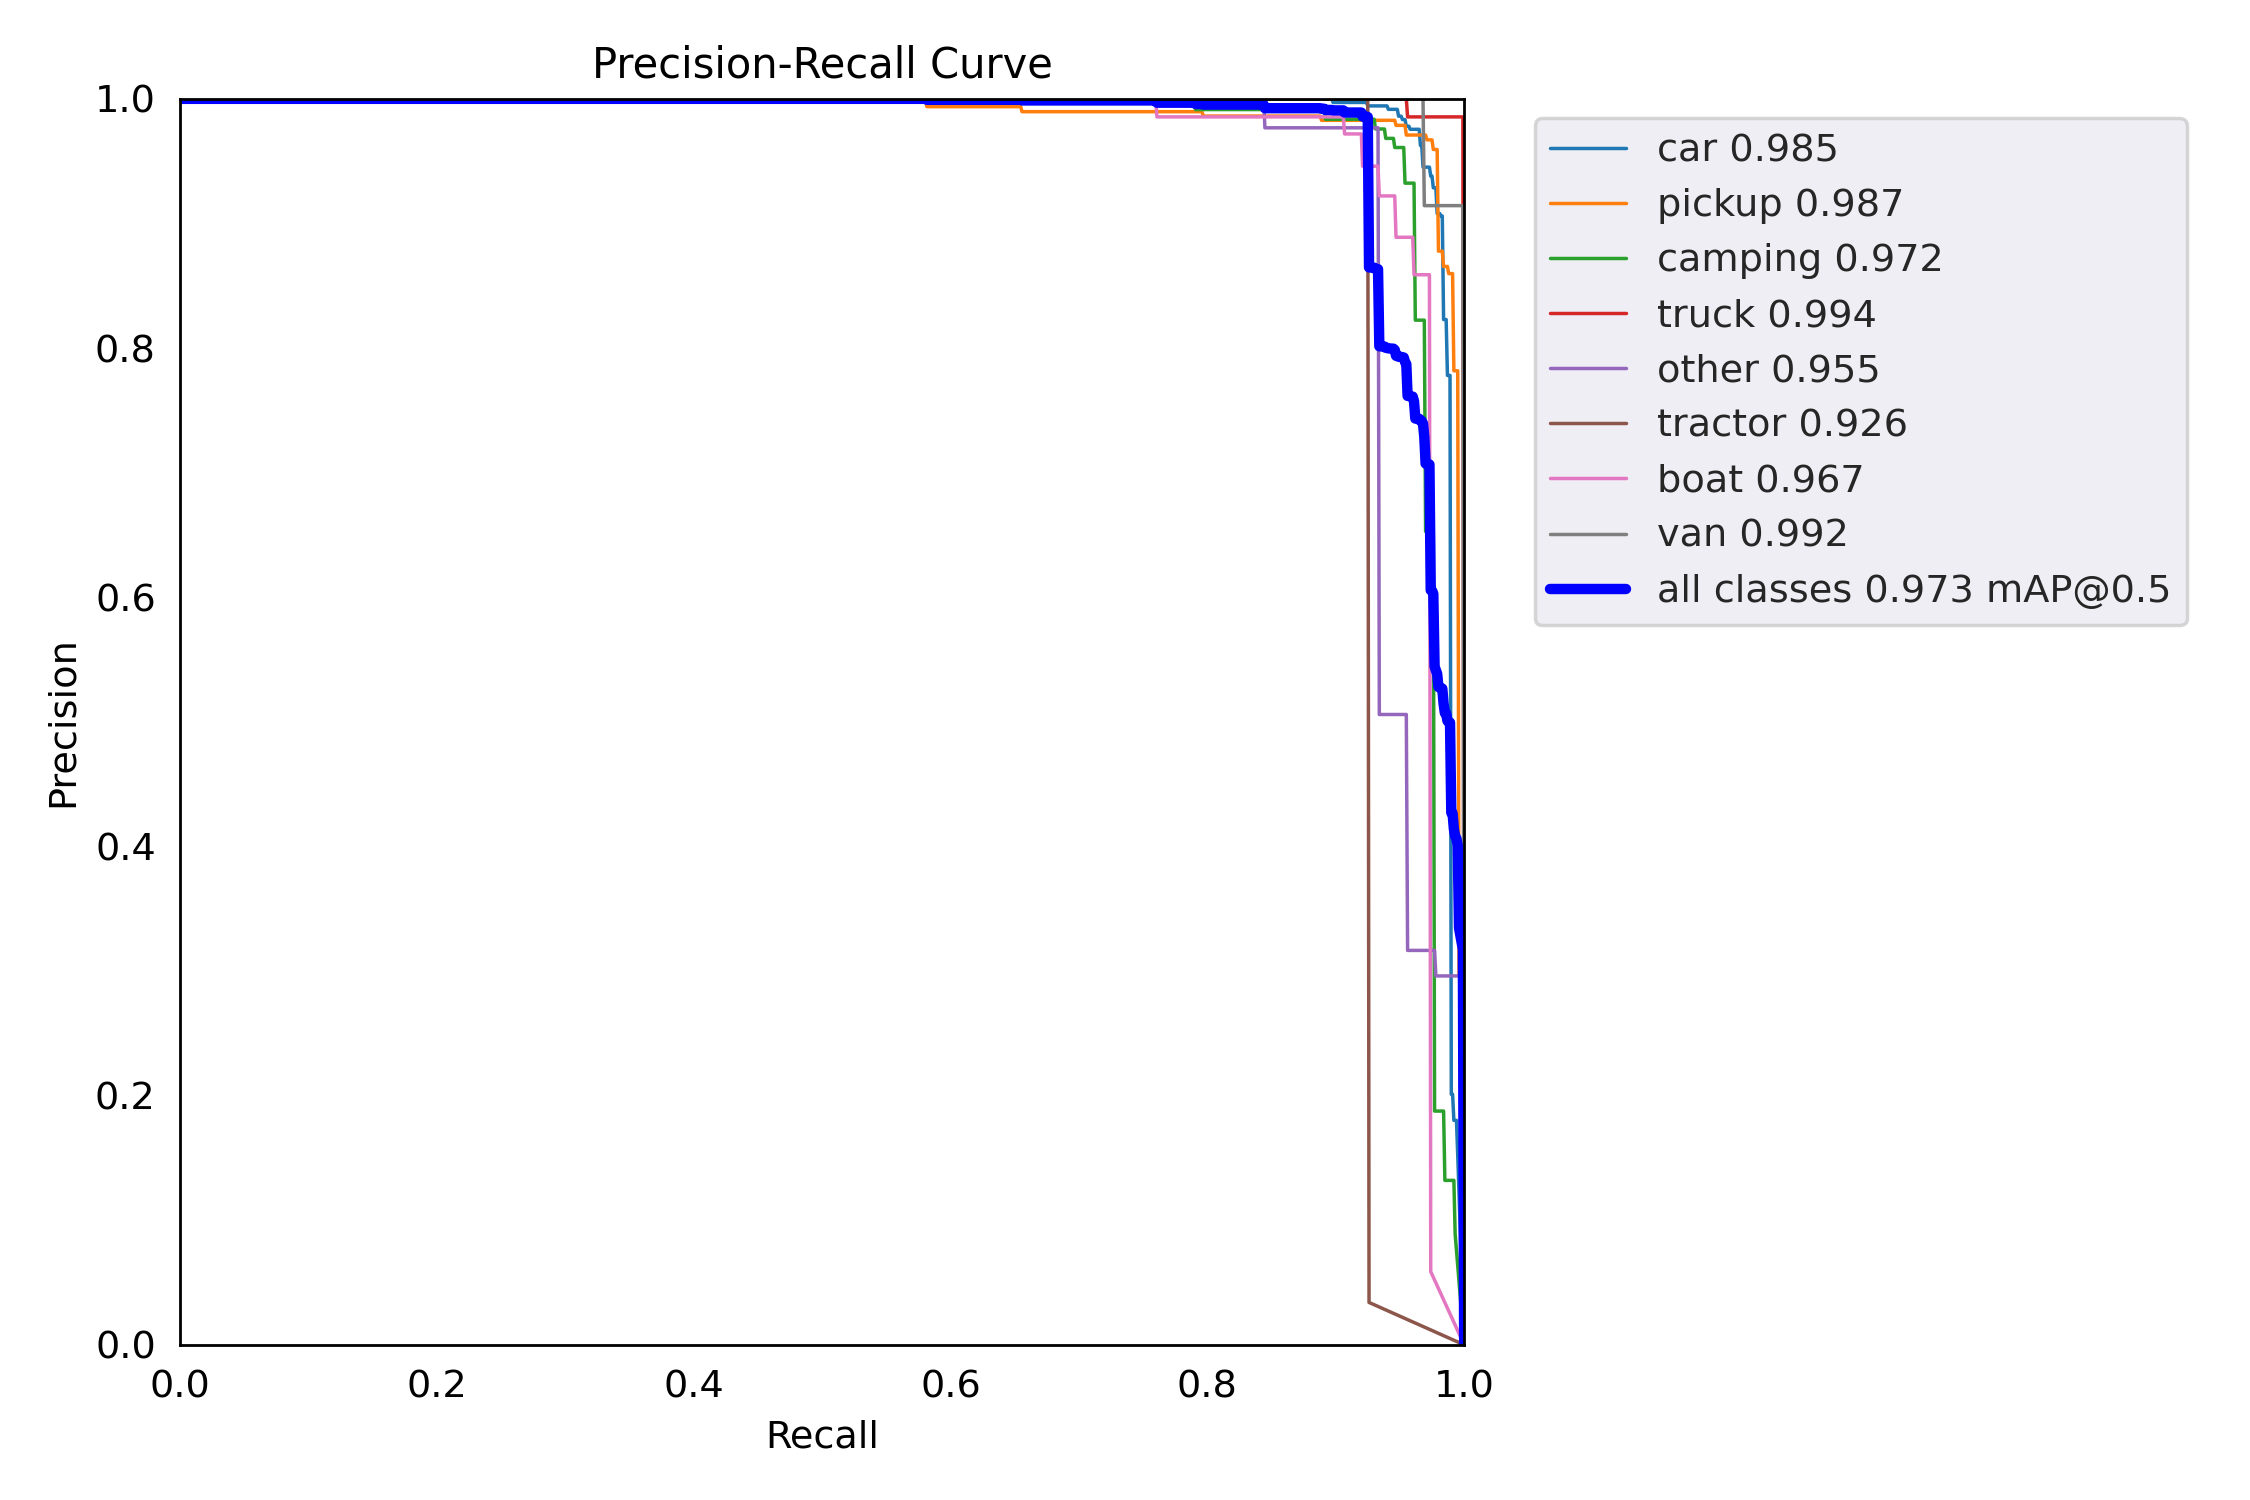

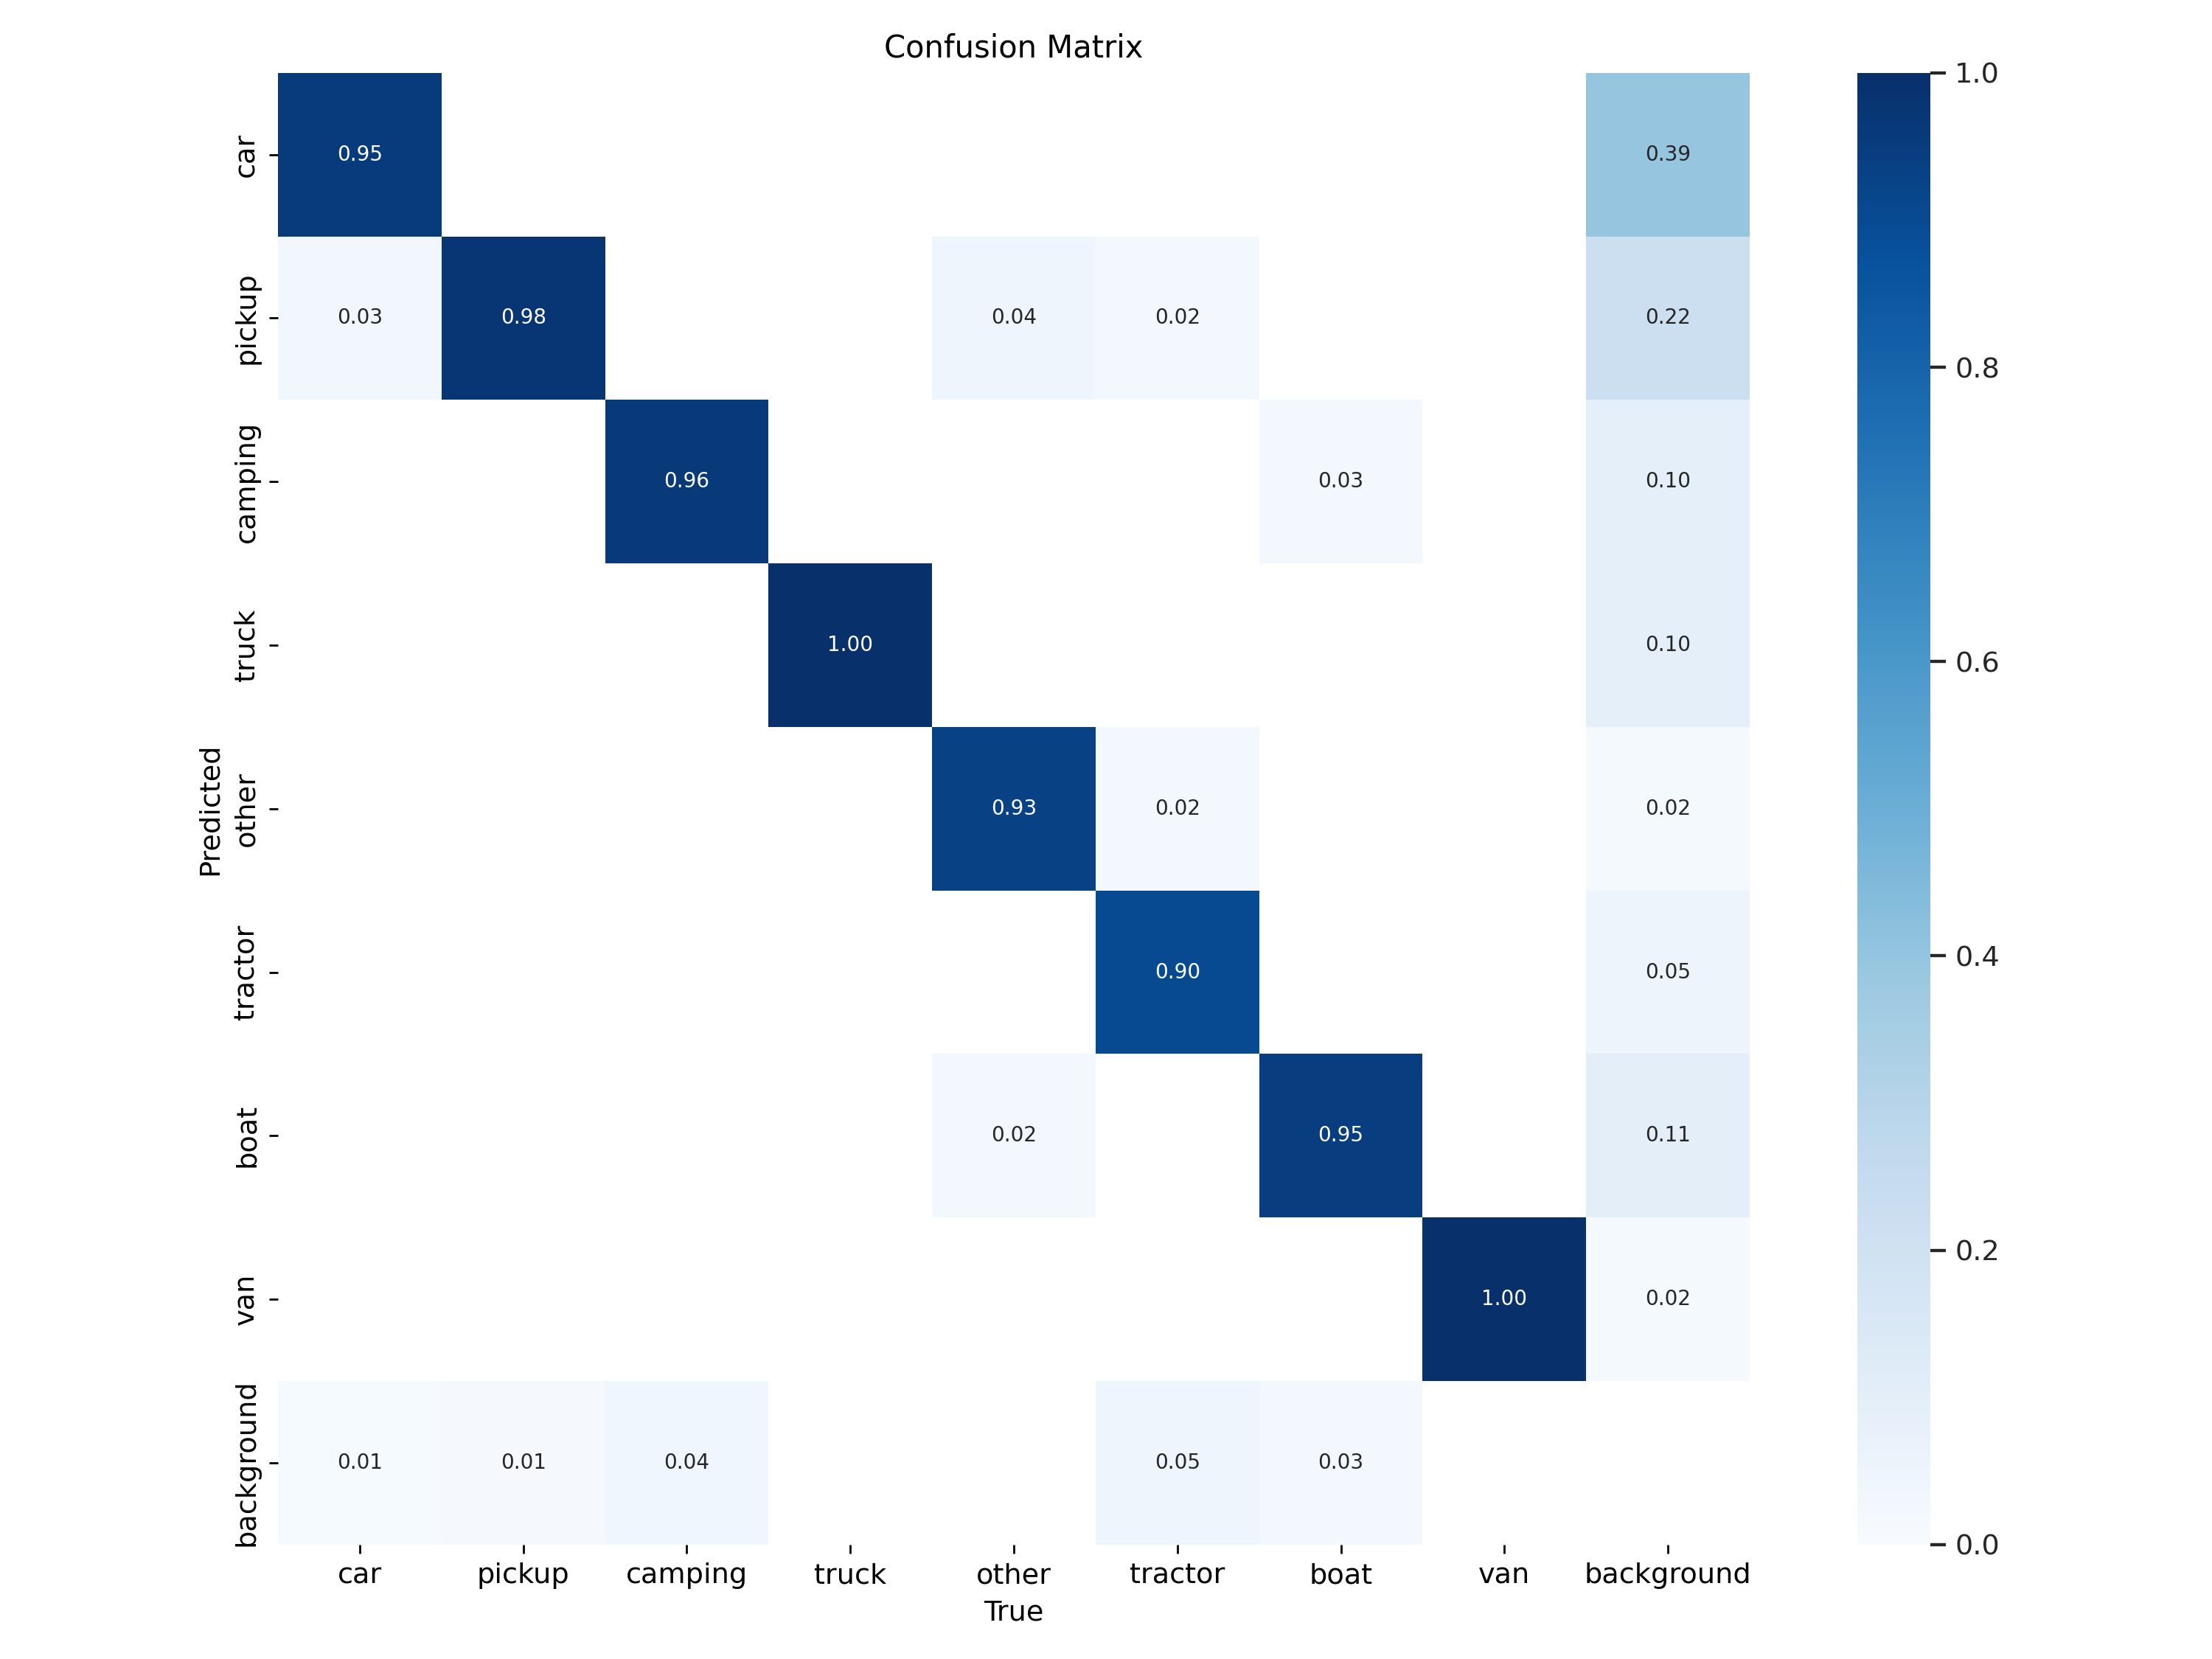

In [29]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='/content/yolov3/runs/train/exp/F1_curve.png')
y = Image(filename='/content/yolov3/runs/train/exp/PR_curve.png')
z = Image(filename='/content/yolov3/runs/train/exp/confusion_matrix.png')
display(x, y,z)

# YoloV4 

In [33]:
!python train.py --img 512 --batch 32 --epochs 200 --data /content/drive/MyDrive/16/yolo/data.yaml --weights yolov3-tiny.pt

train: weights=yolov3-tiny.pt, cfg=, data=/content/drive/MyDrive/16/yolo/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=32, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv3 is out of date by 2710 commits. Use 'git pull ultralytics master' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv3 🚀 v9.6.0-115-g814fd8d5 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0

In [8]:
p_yol4 = 0.778
r_yol4 = 0.768
mAP_yolo4 = 0.821

In [21]:
storeResults('YoloV4',p_yol4,r_yol4,mAP_yolo4)

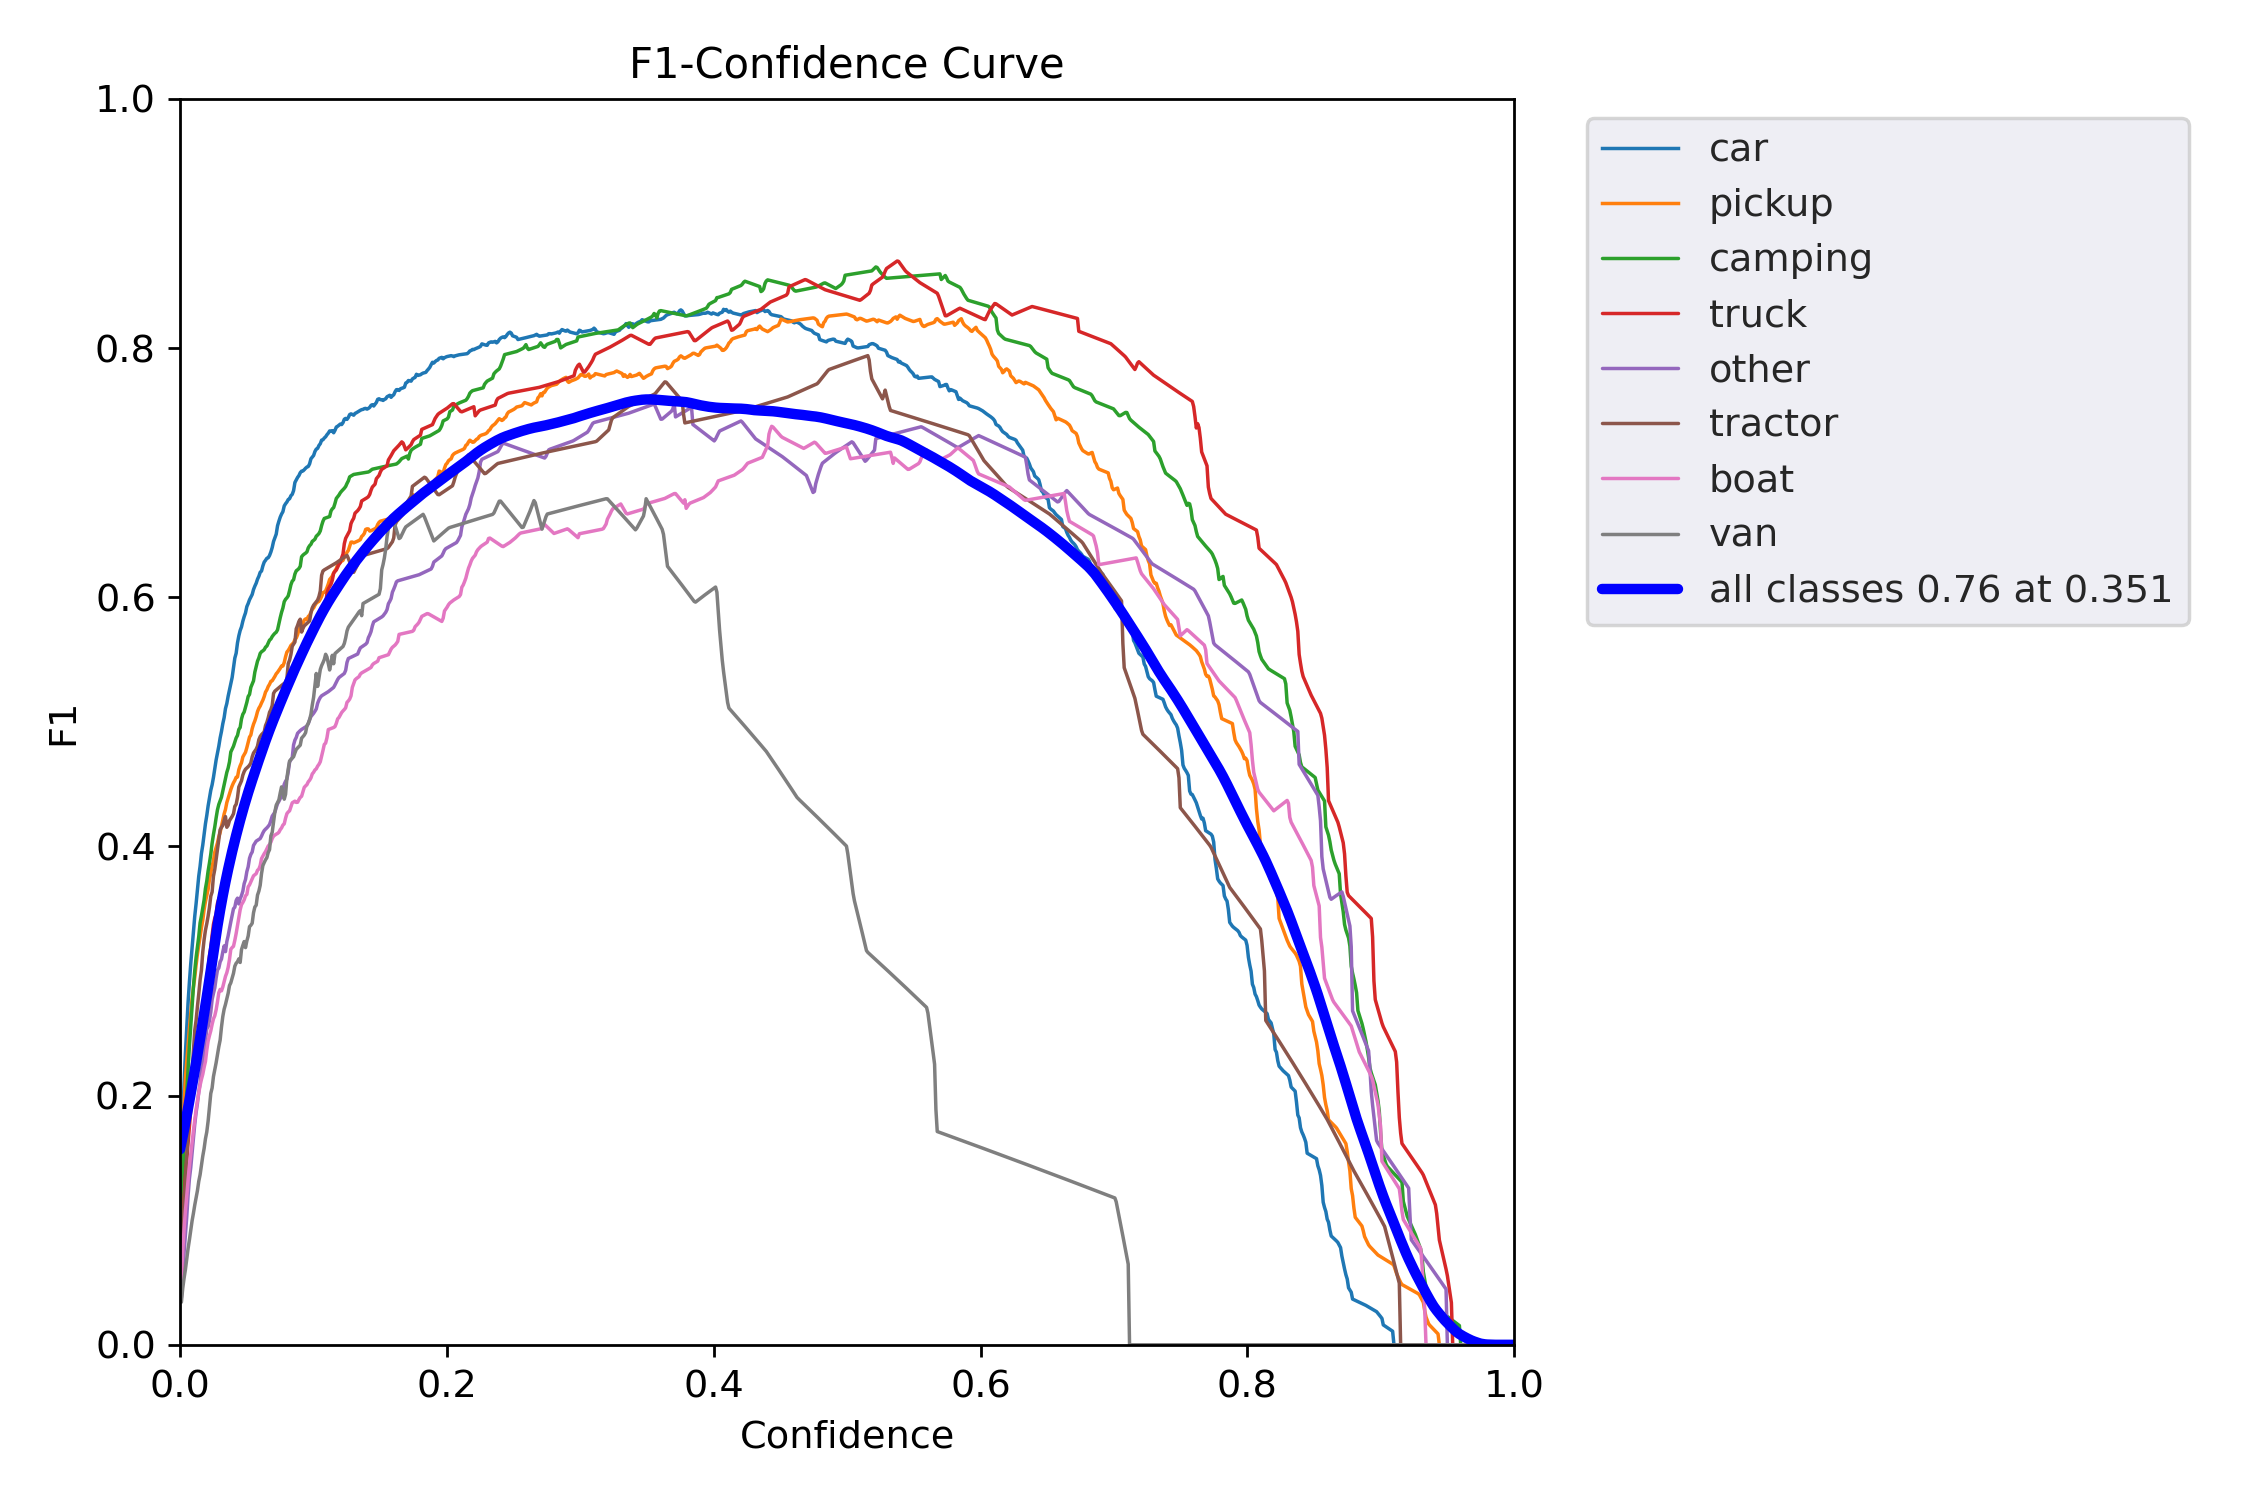

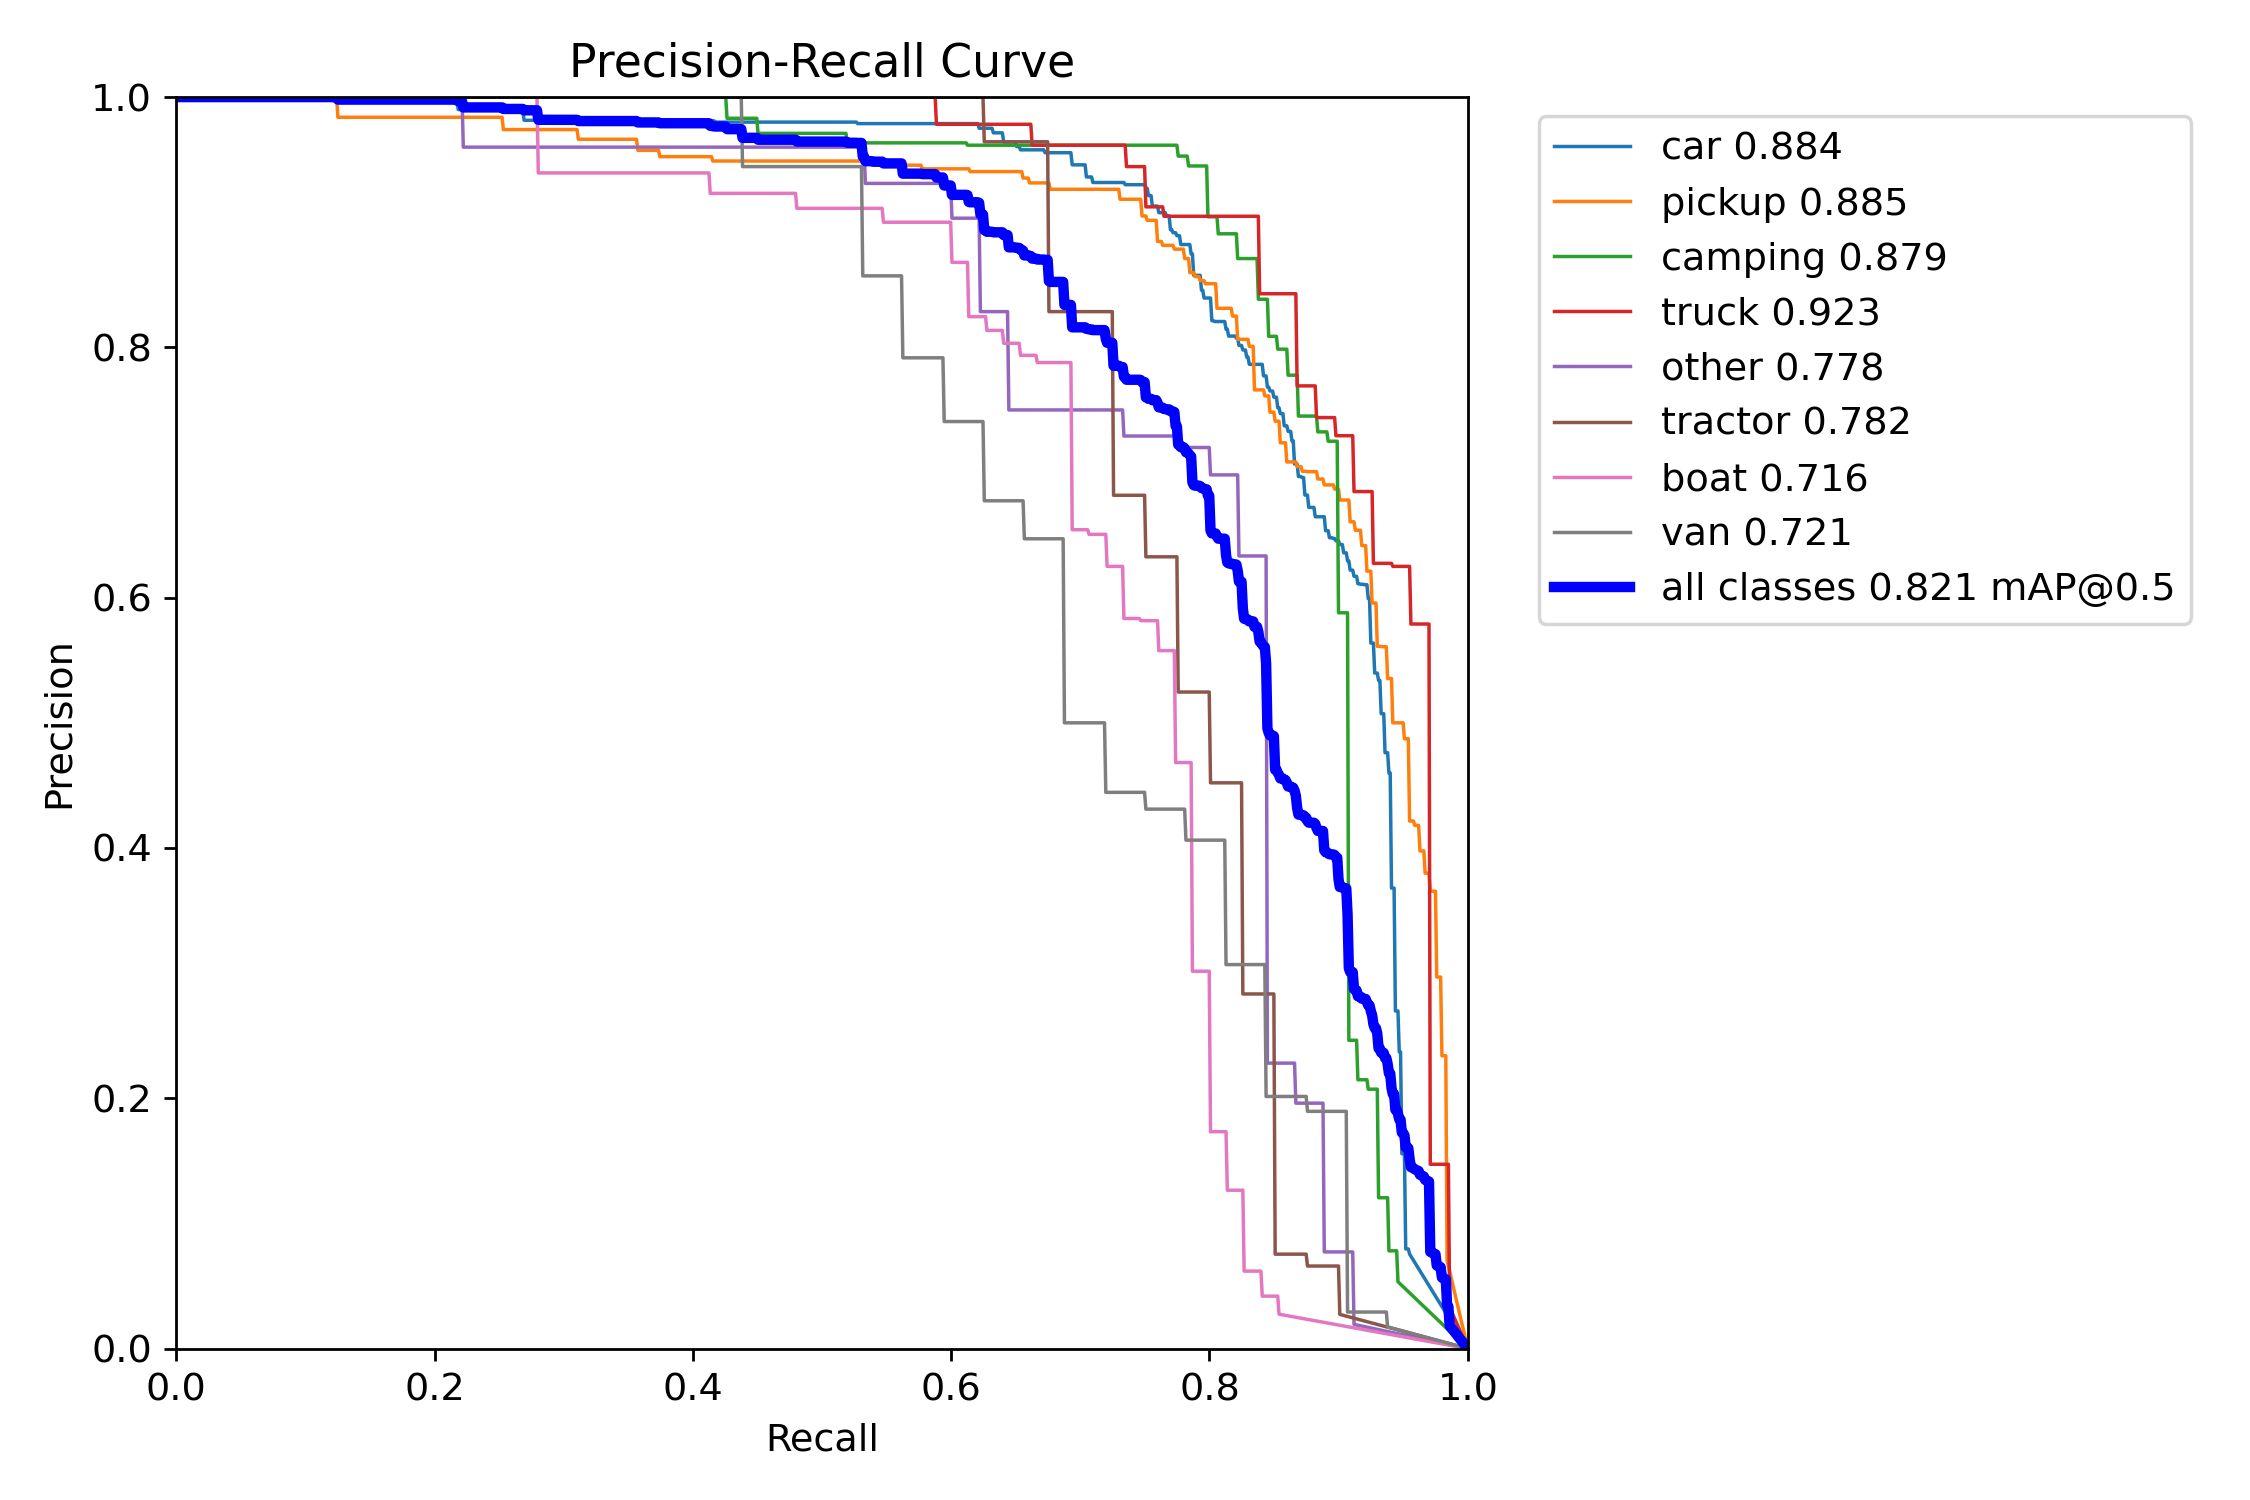

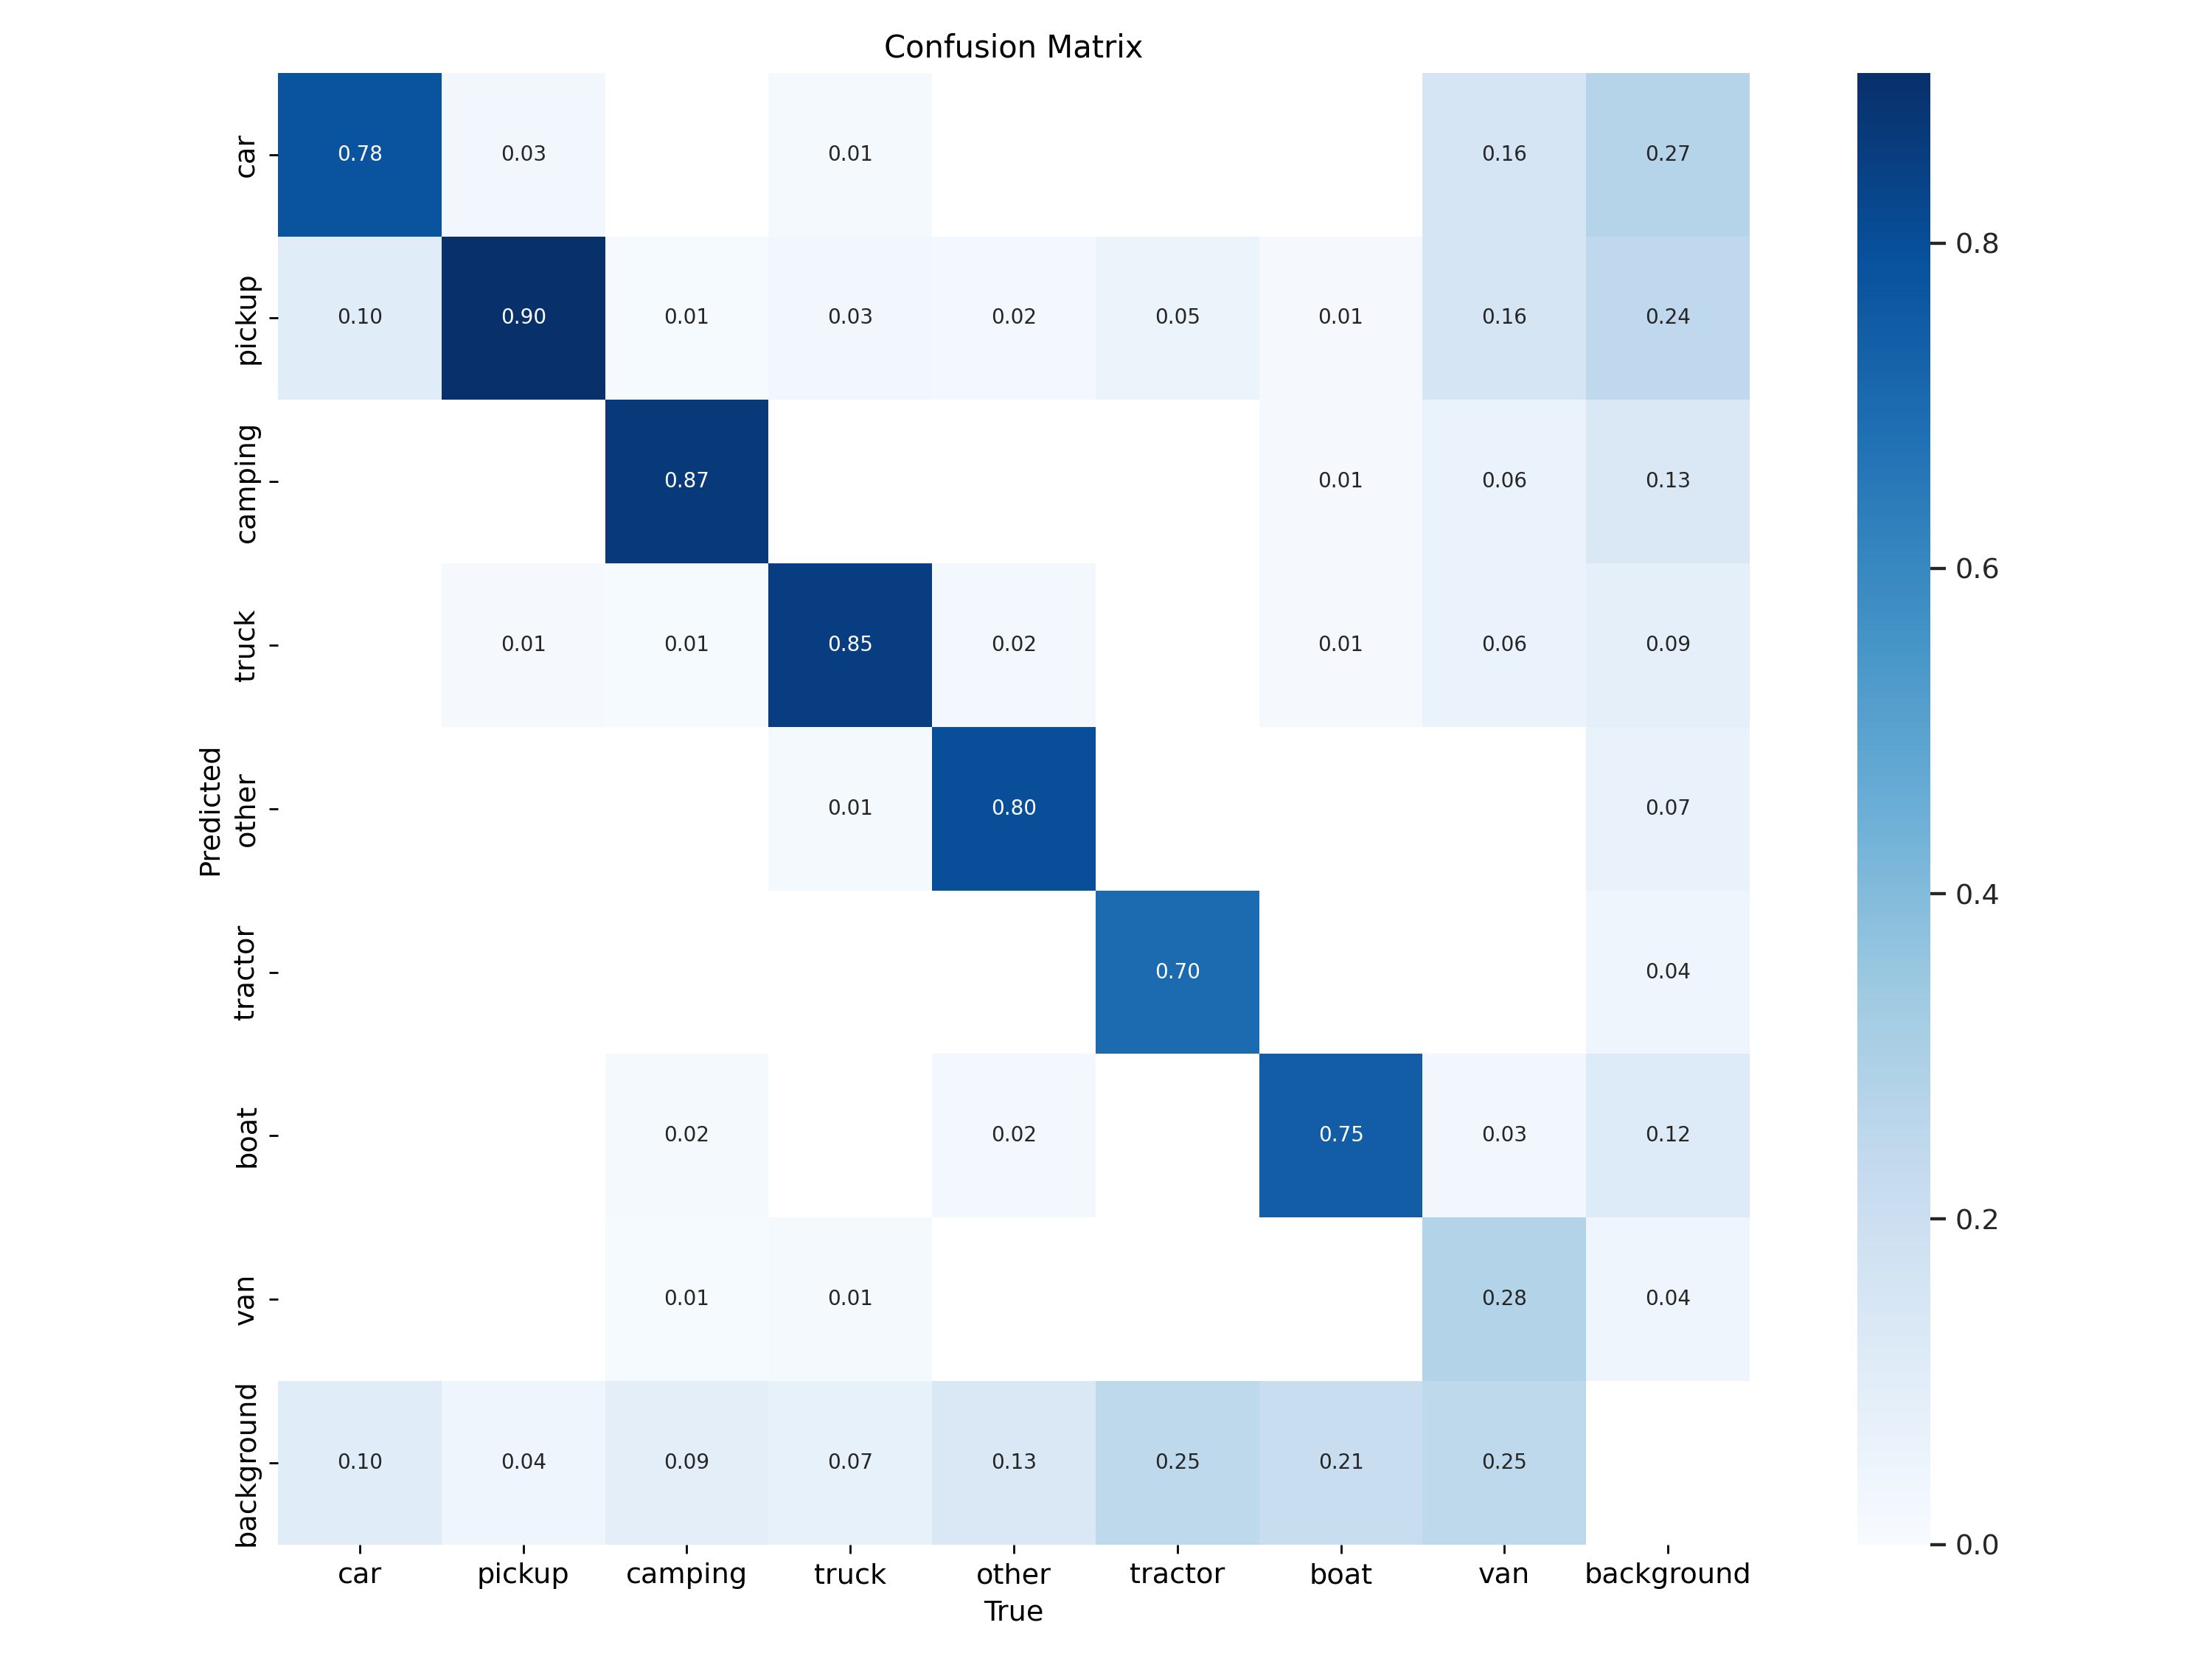

In [44]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='/content/yolov3/runs/train/exp2/F1_curve.png')
y = Image(filename='/content/yolov3/runs/train/exp2/PR_curve.png')
z = Image(filename='/content/yolov3/runs/train/exp2/confusion_matrix.png')
display(x, y,z)

# SuperYolo

In [4]:
!git clone https://github.com/icey-zhang/SuperYOLO

Cloning into 'SuperYOLO'...
remote: Enumerating objects: 456, done.
remote: Counting objects: 100% (139/139), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 456 (delta 87), reused 32 (delta 32), pack-reused 317
Receiving objects: 100% (456/456), 16.93 MiB | 54.36 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [5]:
%cd /content/SuperYOLO/

/content/SuperYOLO


In [6]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 3.2 MB/s eta 0:00:00


In [7]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.4 MB/s eta 0:00:00


In [42]:
!python train.py --cfg models/SRyolo_noFocus_small.yaml --train_img_size 512 --data data/SRvedai.yaml --ch 3 --input_mode RGB

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/16/yolo/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=2, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0

In [9]:
p_yolsup = 0.805
r_yolsup = 0.797
mAP_yolosup = 0.87

In [22]:
storeResults('Super Yolo',p_yolsup,r_yolsup,mAP_yolosup)

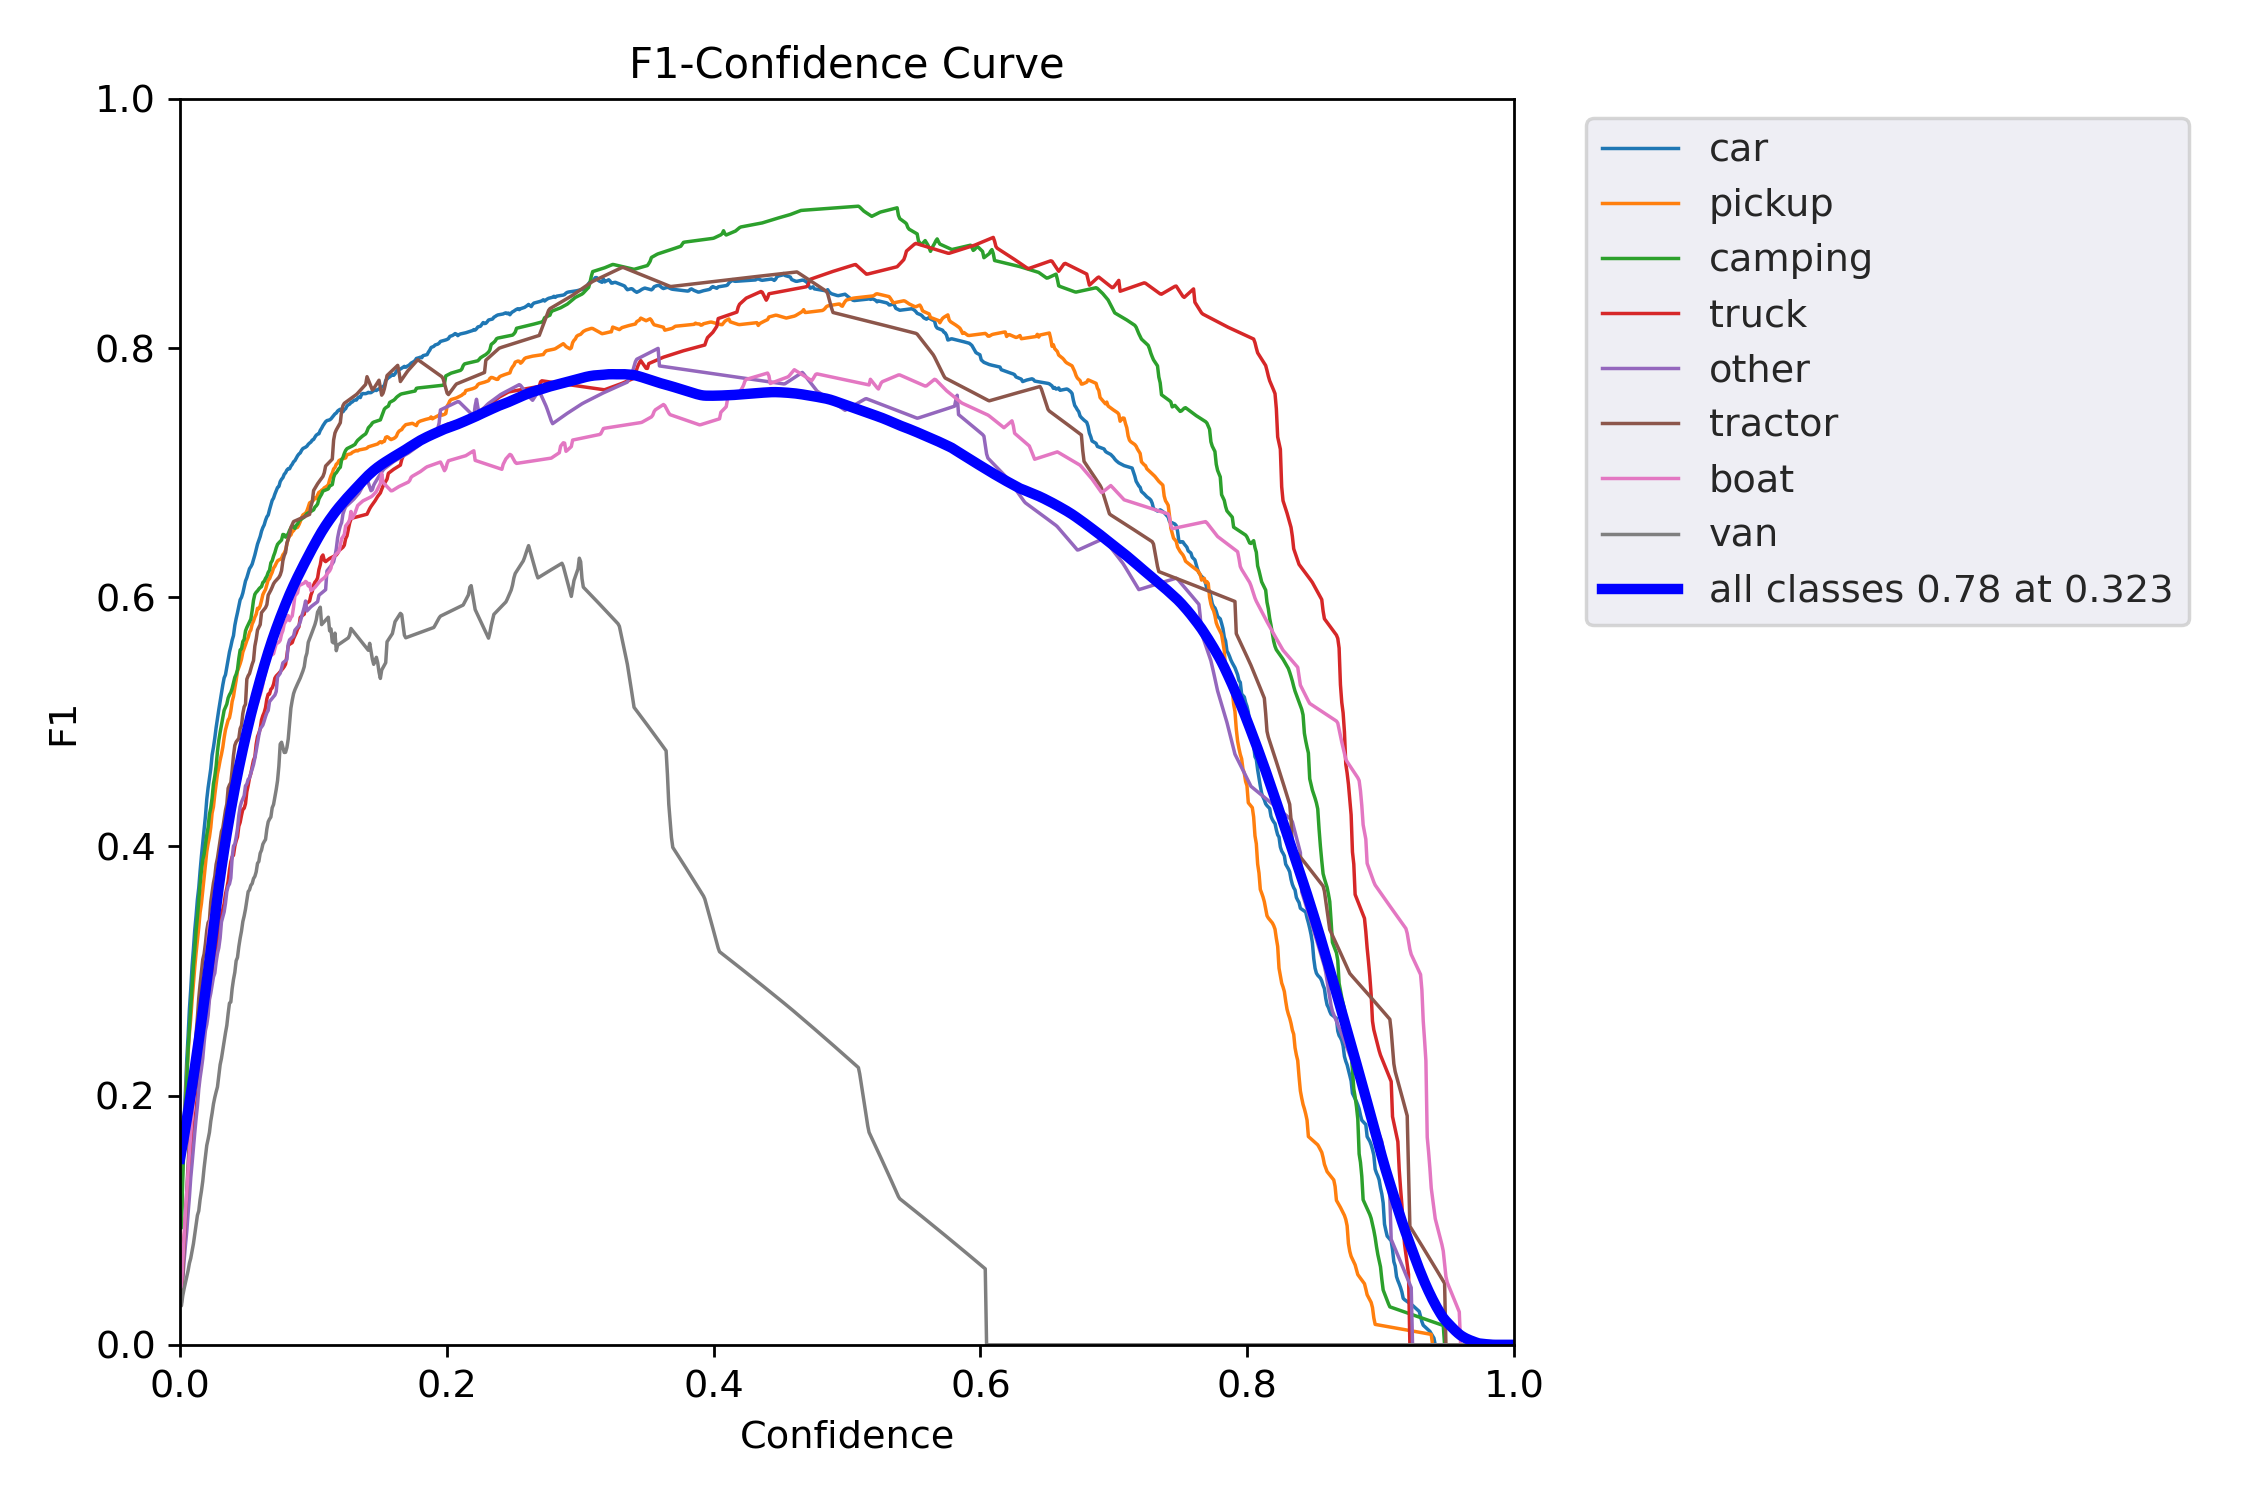

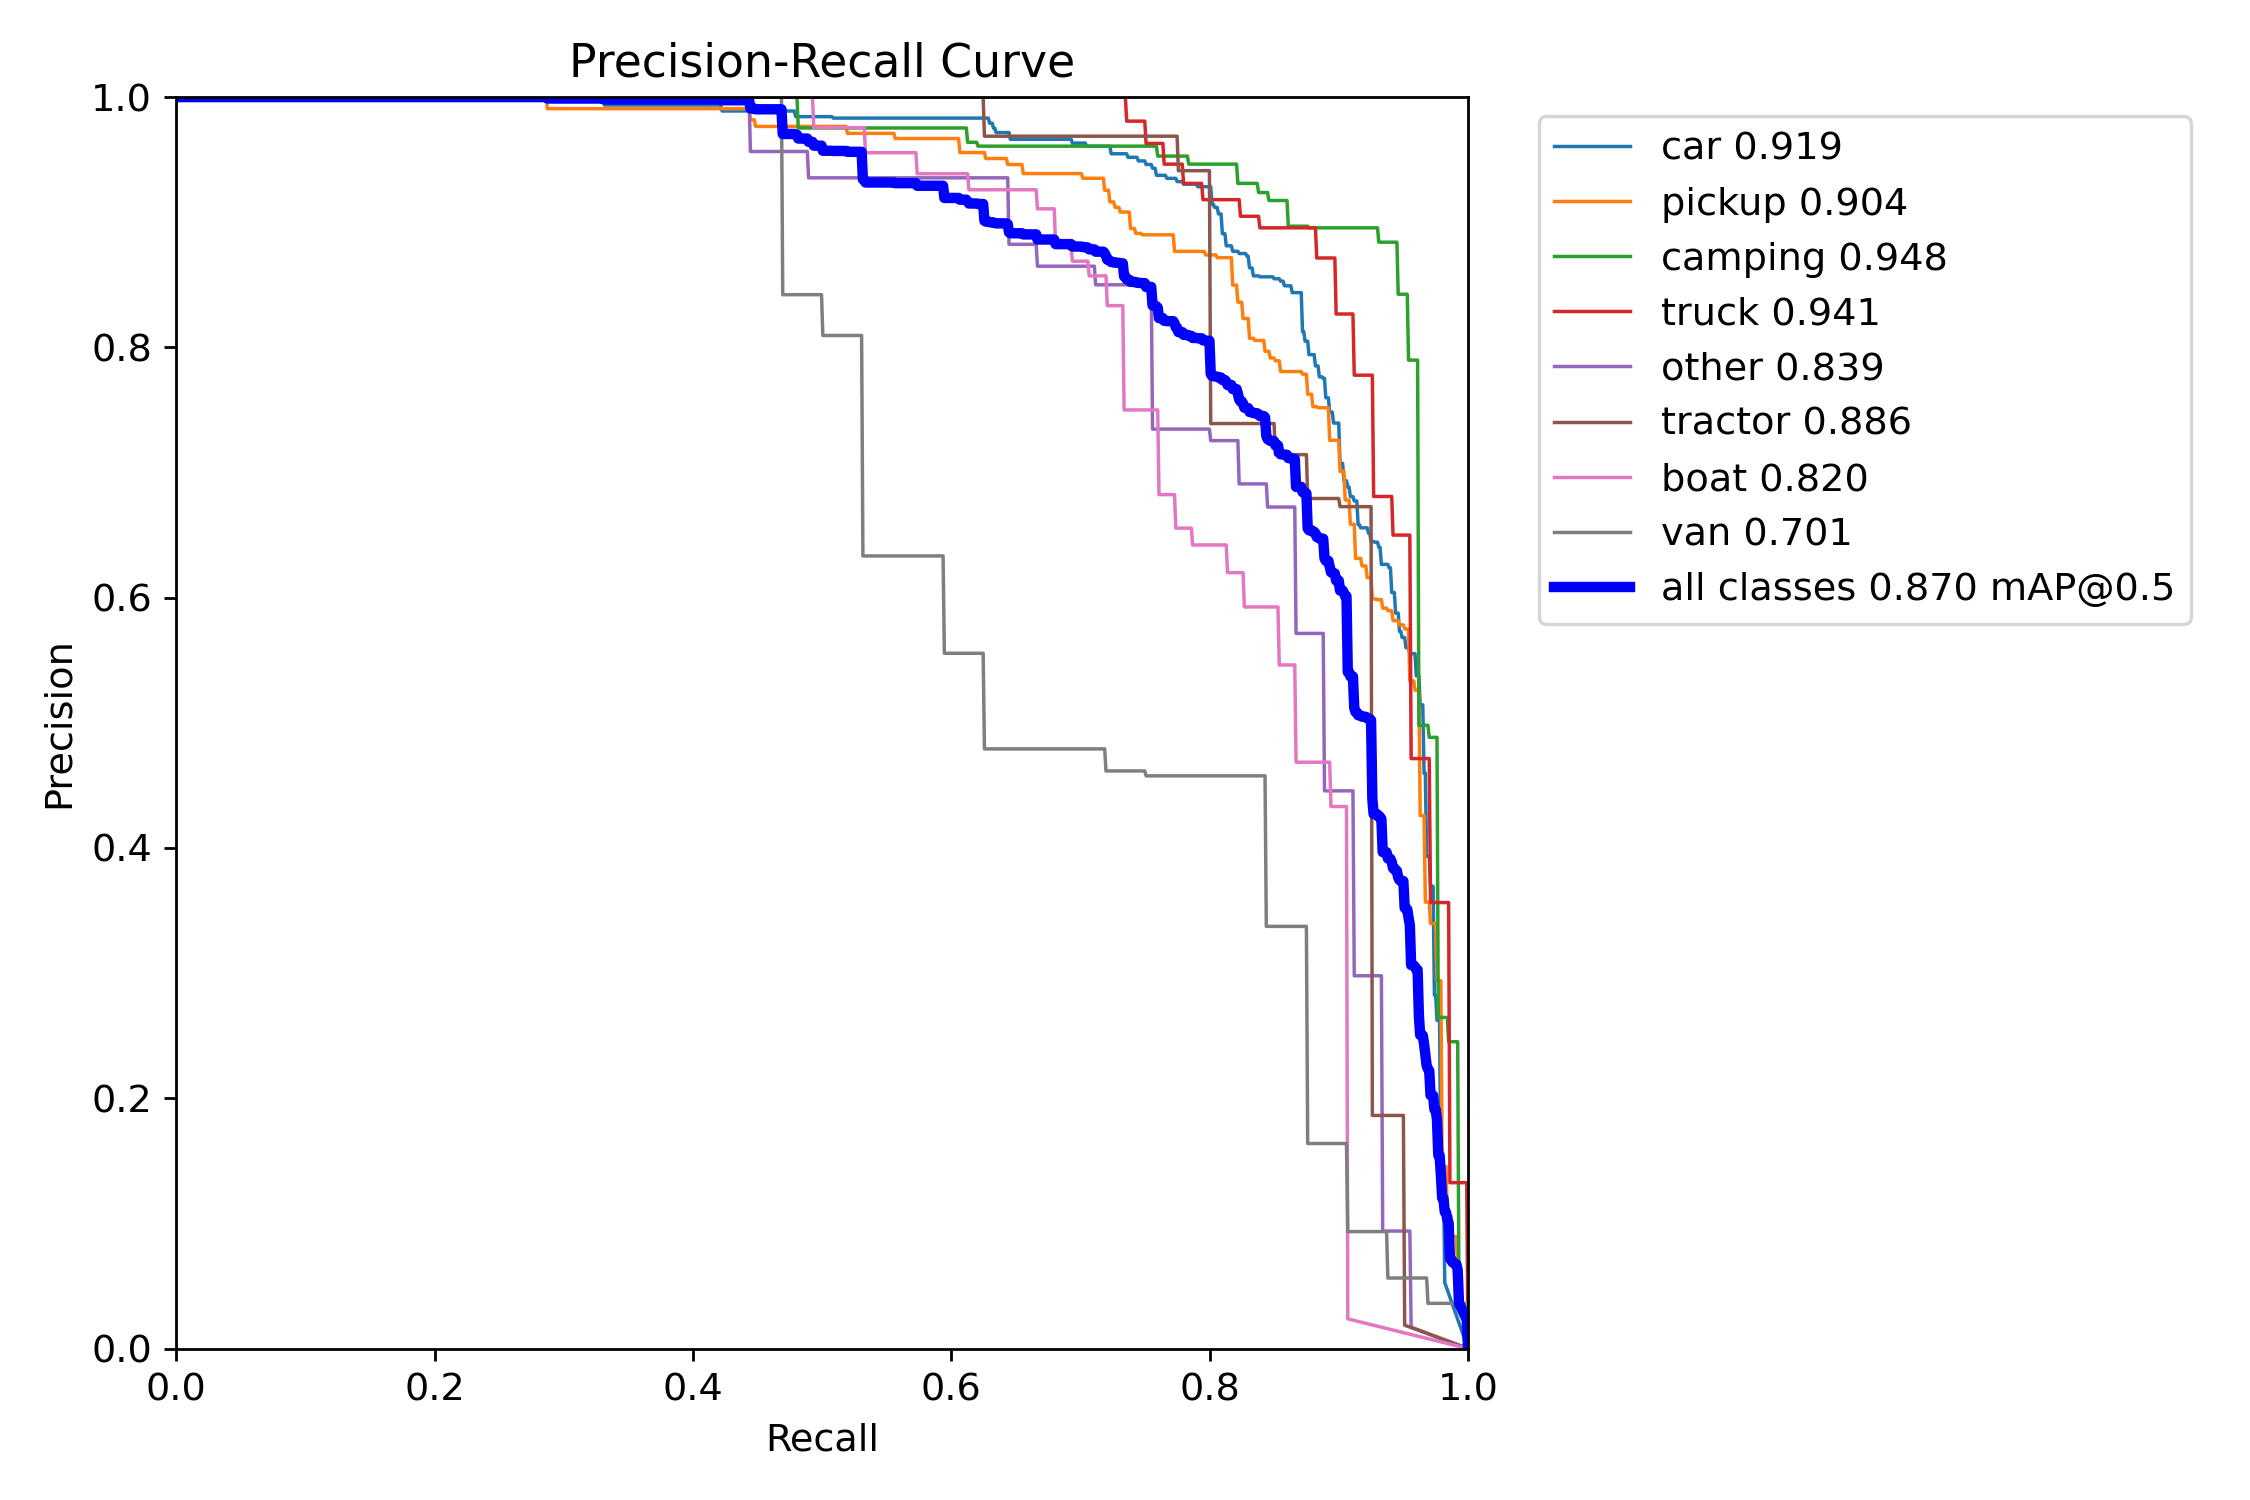

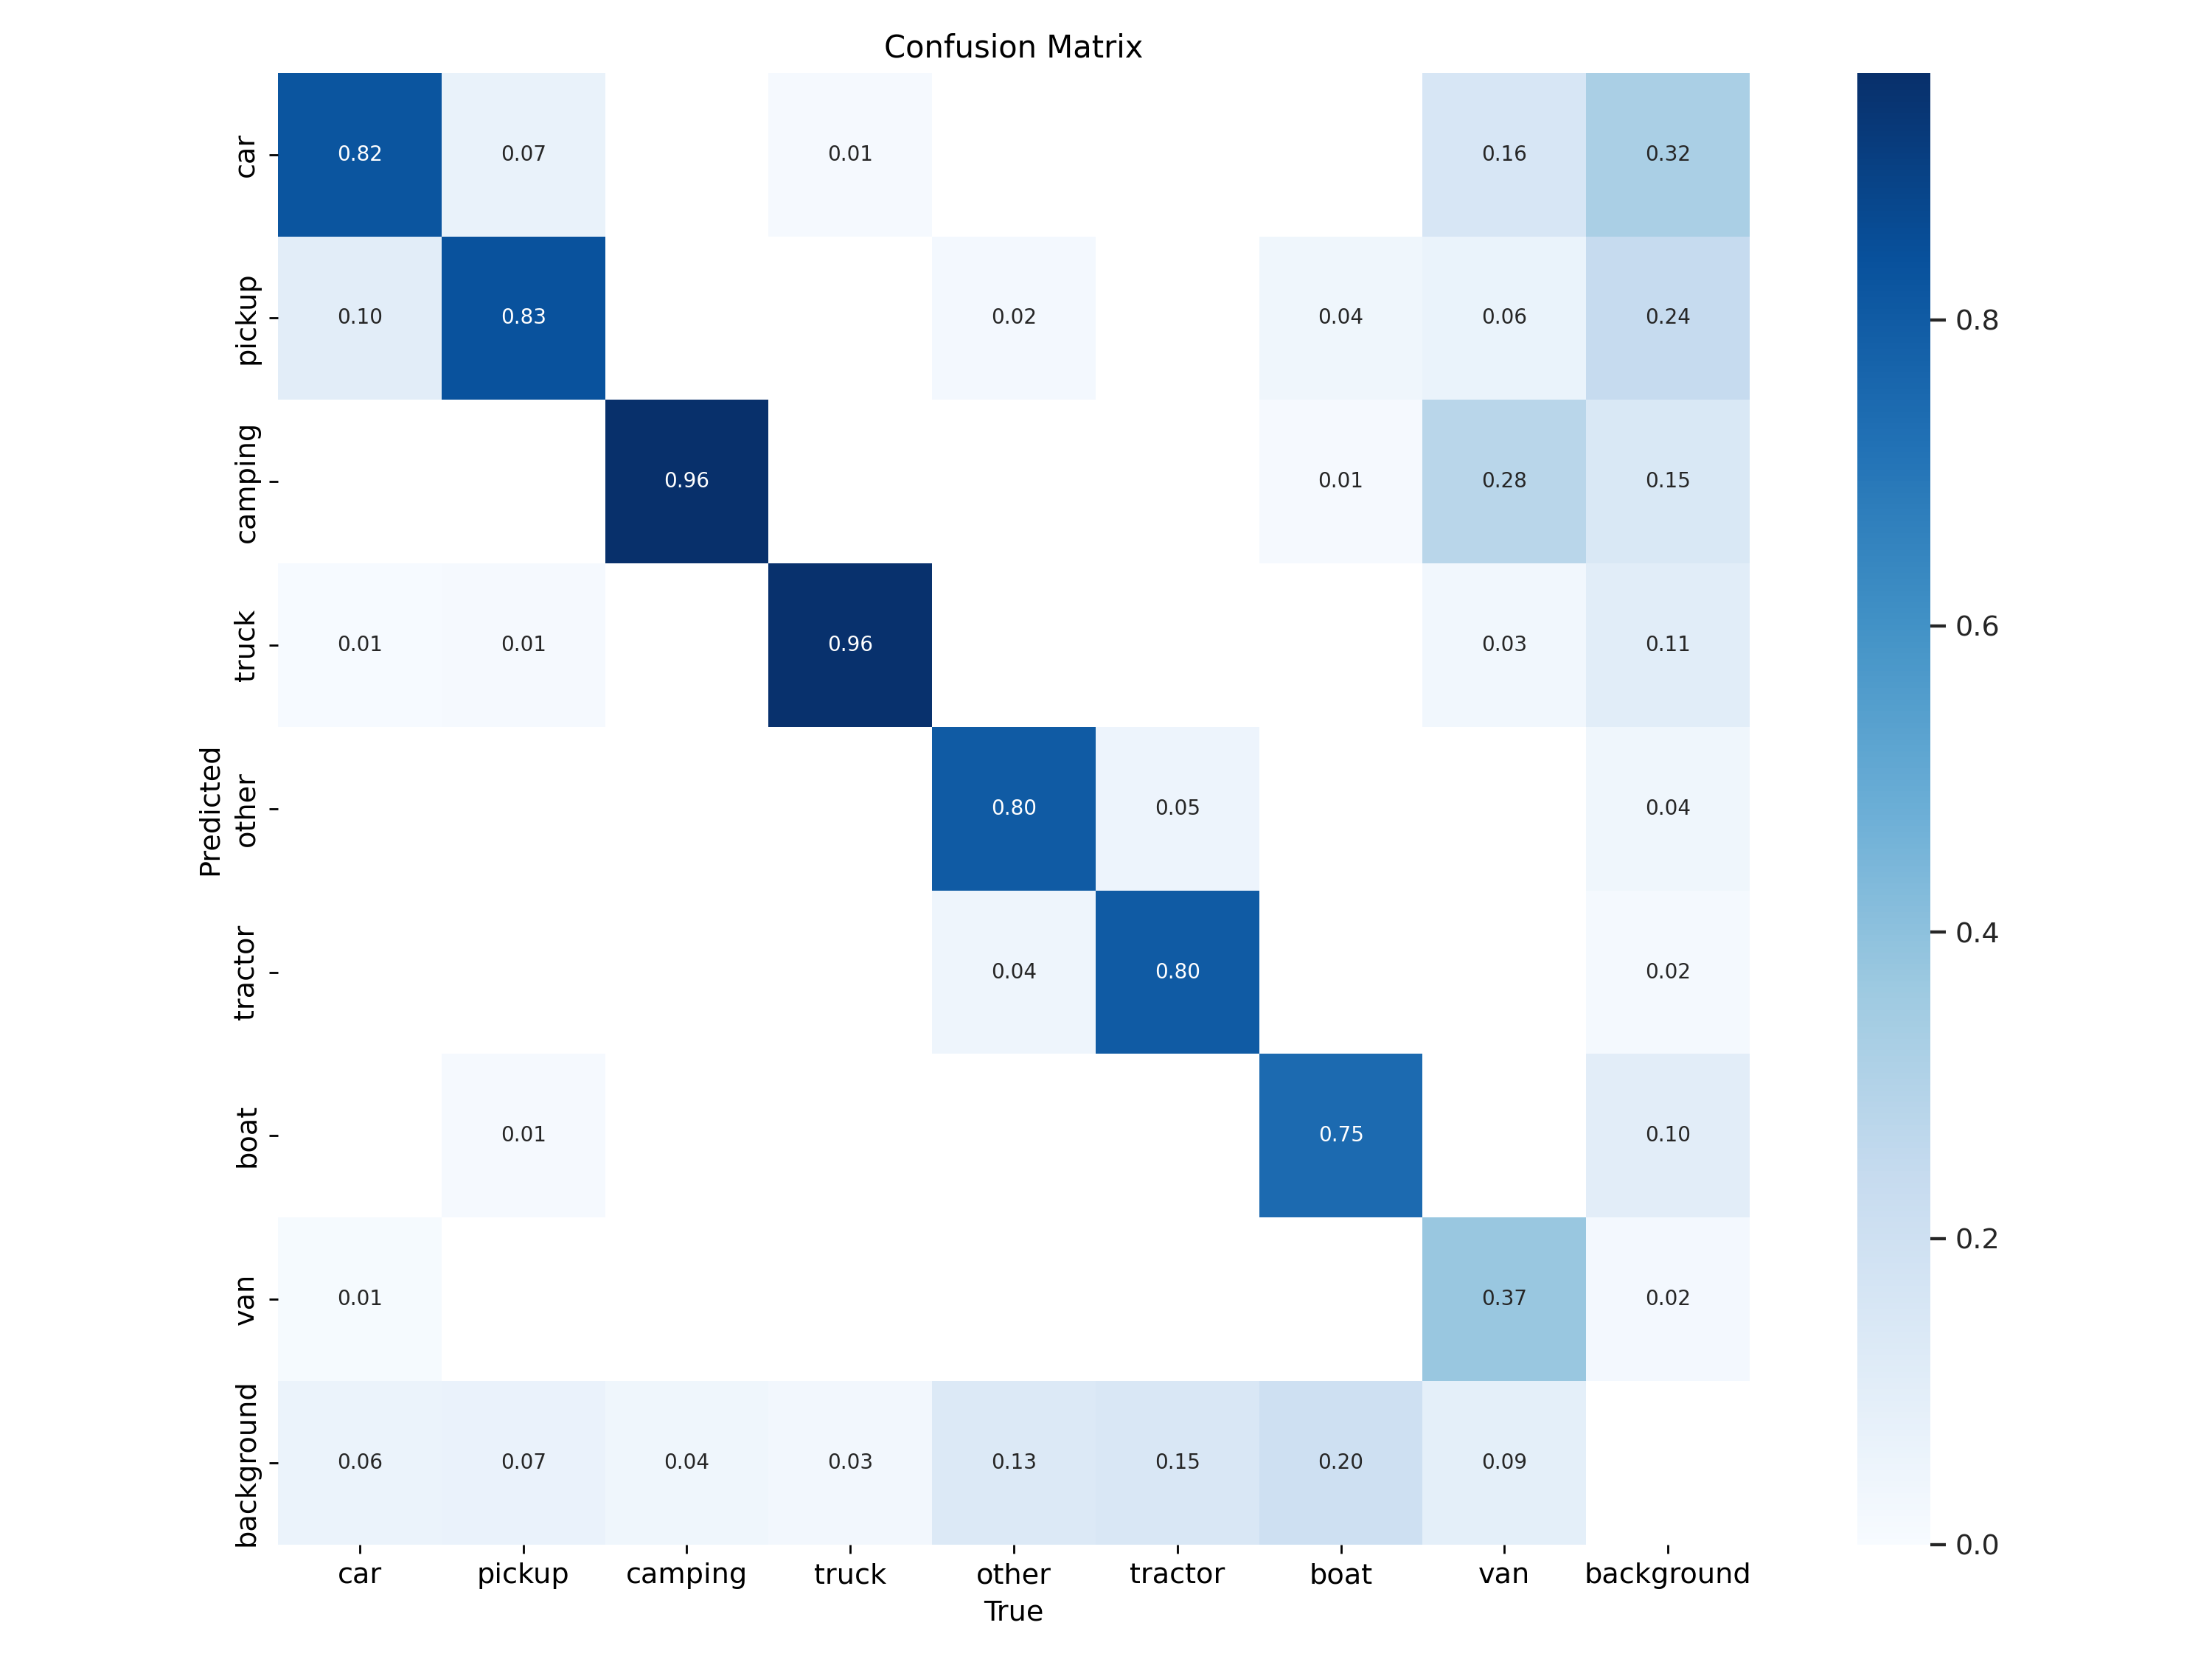

In [45]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/train/exp/F1_curve.png')
y = Image(filename='runs/train/exp/PR_curve.png')
z = Image(filename='runs/train/exp/confusion_matrix.png')
display(x, y,z)

# Comparison

In [23]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        
                       'Precision': precision,
                       'Recall'   : recall, 
                       'mAP' : mAP,
                        
                        
                      })

In [24]:
result

ML Model  Precision  Recall    mAP
0     YoloV5S      0.793   0.786  0.854
1     YoloV5M      0.964   0.870  0.947
2     YoloV5l      0.956   0.943  0.965
3     YoloV5X      0.968   0.953  0.975
4     YoloVx6      0.985   0.950  0.990
5      YoloV3      0.978   0.947  0.973
6      YoloV4      0.778   0.768  0.821
7  Super Yolo      0.805   0.797  0.870

# Graph

In [26]:
import numpy as np

In [27]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Precision

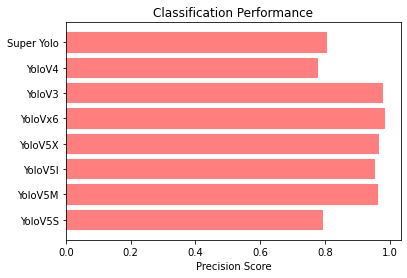

In [29]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

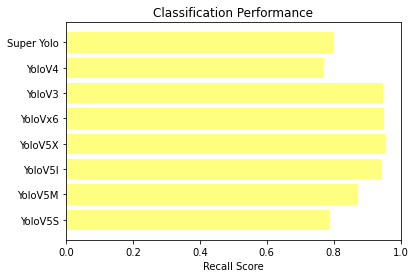

In [30]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# mAP

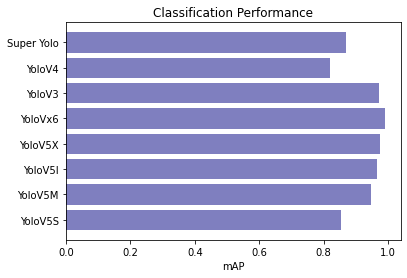

In [31]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, mAP, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('mAP')
plt2.title('Classification Performance')
plt2.show()